In [9]:
import pandas as pd
import datetime
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('../data/nba.csv', index_col=0)

In [11]:
df.head()

DATE   START               VISITOR    PTS  \
0  Tue, Oct 27, 2009   7:30p        Boston Celtics   95.0   
1  Tue, Oct 27, 2009   8:30p    Washington Wizards  102.0   
2  Tue, Oct 27, 2009  10:30p  Los Angeles Clippers   92.0   
3  Tue, Oct 27, 2009  10:00p       Houston Rockets   87.0   
4  Wed, Oct 28, 2009   7:00p        Indiana Pacers  109.0   

                     HOME  PTS.1   ATTEND NOTES  VISITOR_MP  VISITOR_FG  \
0     Cleveland Cavaliers   89.0  20562.0   NaN       240.0        32.0   
1        Dallas Mavericks   91.0  19871.0   NaN       240.0        39.0   
2      Los Angeles Lakers   99.0  18997.0   NaN       240.0        39.0   
3  Portland Trail Blazers   96.0  20403.0   NaN       240.0        30.0   
4           Atlanta Hawks  120.0  17998.0   NaN       240.0        39.0   

     ...      HOME_ORB%  HOME_DRB%  HOME_TRB%  HOME_AST%  HOME_STL%  \
0    ...           15.8       81.3       45.7       58.6        7.9   
1    ...           22.9       77.5       47.7       53.3        6.7   
2    ...           32.1       66.7       48.0       48.6       13.3   
3    ...           34.3       79.6       60.7       69.7        9.3   
4    ...           19.0       81.8       46.7       65.2       15.9   

   HOME_BLK%  HOME_TOV%  HOME_USG%  HOME_ORtg  HOME_DRtg  
0       17.0       13.4      100.0      100.4      107.2  
1       12.7        9.0      100.0      101.6      113.9  
2        5.6       13.6      100.0      101.6       94.4  
3       19.0       23.1      100.0       99.4       90.1  
4       10.9        9.1      100.0      119.0      108.1  

[5 rows x 76 columns]

In [12]:
df.columns

Index(['DATE', 'START', 'VISITOR', 'PTS', 'HOME', 'PTS.1', 'ATTEND', 'NOTES',
       'VISITOR_MP', 'VISITOR_FG', 'VISITOR_FGA', 'VISITOR_FG%', 'VISITOR_3P',
       'VISITOR_3PA', 'VISITOR_3P%', 'VISITOR_FT', 'VISITOR_FTA',
       'VISITOR_FT%', 'VISITOR_ORB', 'VISITOR_DRB', 'VISITOR_TRB',
       'VISITOR_AST', 'VISITOR_STL', 'VISITOR_BLK', 'VISITOR_TOV',
       'VISITOR_PF', 'VISITOR_PTS', 'VISITOR_+/-', 'VISITOR_TS%',
       'VISITOR_eFG%', 'VISITOR_3PAr', 'VISITOR_FTr', 'VISITOR_ORB%',
       'VISITOR_DRB%', 'VISITOR_TRB%', 'VISITOR_AST%', 'VISITOR_STL%',
       'VISITOR_BLK%', 'VISITOR_TOV%', 'VISITOR_USG%', 'VISITOR_ORtg',
       'VISITOR_DRtg', 'HOME_MP', 'HOME_FG', 'HOME_FGA', 'HOME_FG%', 'HOME_3P',
       'HOME_3PA', 'HOME_3P%', 'HOME_FT', 'HOME_FTA', 'HOME_FT%', 'HOME_ORB',
       'HOME_DRB', 'HOME_TRB', 'HOME_AST', 'HOME_STL', 'HOME_BLK', 'HOME_TOV',
       'HOME_PF', 'HOME_PTS', 'HOME_+/-', 'HOME_TS%', 'HOME_eFG%', 'HOME_3PAr',
       'HOME_FTr', 'HOME_ORB%', 'HOME_DRB%', 'HO

In [13]:
df.set_index('DATE', )

START                 VISITOR    PTS  \
DATE                                                       
Tue, Oct 27, 2009   7:30p          Boston Celtics   95.0   
Tue, Oct 27, 2009   8:30p      Washington Wizards  102.0   
Tue, Oct 27, 2009  10:30p    Los Angeles Clippers   92.0   
Tue, Oct 27, 2009  10:00p         Houston Rockets   87.0   
Wed, Oct 28, 2009   7:00p          Indiana Pacers  109.0   
Wed, Oct 28, 2009   7:30p       Charlotte Bobcats   59.0   
Wed, Oct 28, 2009  10:30p               Utah Jazz  105.0   
Wed, Oct 28, 2009  10:30p         Houston Rockets  108.0   
Wed, Oct 28, 2009  10:30p            Phoenix Suns  109.0   
Wed, Oct 28, 2009   8:00p         Detroit Pistons   96.0   
Wed, Oct 28, 2009   7:30p         New York Knicks   93.0   
Wed, Oct 28, 2009   8:00p         New Jersey Nets   93.0   
Wed, Oct 28, 2009   8:00p        Sacramento Kings   89.0   
Wed, Oct 28, 2009   7:00p      Philadelphia 76ers  106.0   
Wed, Oct 28, 2009   8:00p     New Orleans Hornets   96.0   
Wed, Oct 28, 2009   7:00p     Cleveland Cavaliers   91.0   
Thu, Oct 29, 2009   8:00p       San Antonio Spurs   85.0   
Thu, Oct 29, 2009  10:30p          Denver Nuggets   97.0   
Fri, Oct 30, 2009   7:30p      Washington Wizards   89.0   
Fri, Oct 30, 2009   8:00p           Chicago Bulls   90.0   
Fri, Oct 30, 2009   7:00p         New York Knicks  100.0   
Fri, Oct 30, 2009   8:00p   Oklahoma City Thunder   91.0   
Fri, Oct 30, 2009   8:00p              Miami Heat   96.0   
Fri, Oct 30, 2009  10:30p        Dallas Mavericks   94.0   
Fri, Oct 30, 2009   8:00p         Toronto Raptors  107.0   
Fri, Oct 30, 2009   8:00p     Cleveland Cavaliers  104.0   
Fri, Oct 30, 2009   8:00p           Orlando Magic   95.0   
Fri, Oct 30, 2009   8:00p        Sacramento Kings   92.0   
Fri, Oct 30, 2009   7:00p         Milwaukee Bucks   86.0   
Fri, Oct 30, 2009  10:00p   Golden State Warriors  101.0   
...                   ...                     ...    ...   
Fri, Dec 28, 2018   7:00p         Detroit Pistons   88.0   
Fri, Dec 28, 2018  10:30p    Los Angeles Clippers  118.0   
Fri, Dec 28, 2018   8:00p     Cleveland Cavaliers   94.0   
Fri, Dec 28, 2018   8:00p           Atlanta Hawks  123.0   
Fri, Dec 28, 2018   8:00p        Dallas Mavericks  112.0   
Fri, Dec 28, 2018   7:00p         Toronto Raptors   87.0   
Fri, Dec 28, 2018   9:00p   Oklahoma City Thunder  118.0   
Fri, Dec 28, 2018   7:00p           Chicago Bulls  101.0   
Sat, Dec 29, 2018   7:30p     Cleveland Cavaliers  108.0   
Sat, Dec 29, 2018  10:30p       San Antonio Spurs  122.0   
Sat, Dec 29, 2018   8:00p          Boston Celtics  112.0   
Sat, Dec 29, 2018   5:00p           Brooklyn Nets  115.0   
Sat, Dec 29, 2018   7:00p         Houston Rockets  108.0   
Sat, Dec 29, 2018   9:00p          Denver Nuggets  122.0   
Sat, Dec 29, 2018  10:00p   Golden State Warriors  115.0   
Sat, Dec 29, 2018   8:00p         New York Knicks   97.0   
Sat, Dec 29, 2018   7:00p       Charlotte Hornets  126.0   
Sun, Dec 30, 2018   7:00p   Oklahoma City Thunder  103.0   
Sun, Dec 30, 2018   9:30p        Sacramento Kings  114.0   
Sun, Dec 30, 2018   6:00p  Minnesota Timberwolves  113.0   
Sun, Dec 30, 2018   3:30p         Detroit Pistons  107.0   
Sun, Dec 30, 2018   9:00p      Philadelphia 76ers   95.0   
Sun, Dec 30, 2018   6:00p           Chicago Bulls   89.0   
Mon, Dec 31, 2018   6:00p           Orlando Magic  100.0   
Mon, Dec 31, 2018   7:00p       Memphis Grizzlies  101.0   
Mon, Dec 31, 2018   3:00p           Atlanta Hawks  108.0   
Mon, Dec 31, 2018   8:00p  Minnesota Timberwolves  114.0   
Mon, Dec 31, 2018   8:00p        Dallas Mavericks  102.0   
Mon, Dec 31, 2018   9:00p   Golden State Warriors  132.0   
Mon, Dec 31, 2018   7:00p          Boston Celtics  111.0   

                                     HOME  PTS.1   ATTEND NOTES  VISITOR_MP  \
DATE                                                                          
Tue, Oct 27, 2009     Cleveland Cavaliers   89.0  20562.0   NaN       240.0   
Tu

In [2]:
df_t.tail()

NameError: name 'df_t' is not defined

In [3]:
df.reset_index(drop=True, inplace=True)
df = df.drop('NOTES', axis=1)

In [4]:
df = df[~df['DATE'].str.contains('Pla')]

In [5]:
## Teams to replace:
#'Charlotte Bobcats' -> 'Charlotte Hornets'
#'New Orleans Hornets' -> 'New Orleans Pelicans'
#'New Jersey Nets' -> 'Brooklyn Nets'

df['VISITOR'] = df['VISITOR'].replace(['Charlotte Bobcats', 'New Orleans Hornets', 'New Jersey Nets'], \
                                      ['Charlotte Hornets', 'New Orleans Pelicans', 'Brooklyn Nets'])

df['HOME'] = df['HOME'].replace(['Charlotte Bobcats', 'New Orleans Hornets', 'New Jersey Nets'], \
                                      ['Charlotte Hornets', 'New Orleans Pelicans', 'Brooklyn Nets'])

In [6]:
df.head()

DATE   START               VISITOR    PTS  \
0  Tue, Oct 27, 2009   7:30p        Boston Celtics   95.0   
1  Tue, Oct 27, 2009   8:30p    Washington Wizards  102.0   
2  Tue, Oct 27, 2009  10:30p  Los Angeles Clippers   92.0   
3  Tue, Oct 27, 2009  10:00p       Houston Rockets   87.0   
4  Wed, Oct 28, 2009   7:00p        Indiana Pacers  109.0   

                     HOME  PTS.1   ATTEND  VISITOR_MP  VISITOR_FG  \
0     Cleveland Cavaliers   89.0  20562.0       240.0        32.0   
1        Dallas Mavericks   91.0  19871.0       240.0        39.0   
2      Los Angeles Lakers   99.0  18997.0       240.0        39.0   
3  Portland Trail Blazers   96.0  20403.0       240.0        30.0   
4           Atlanta Hawks  120.0  17998.0       240.0        39.0   

   VISITOR_FGA    ...      HOME_ORB%  HOME_DRB%  HOME_TRB%  HOME_AST%  \
0         72.0    ...           15.8       81.3       45.7       58.6   
1         84.0    ...           22.9       77.5       47.7       53.3   
2         87.0    ...           32.1       66.7       48.0       48.6   
3         81.0    ...           34.3       79.6       60.7       69.7   
4         73.0    ...           19.0       81.8       46.7       65.2   

   HOME_STL%  HOME_BLK%  HOME_TOV%  HOME_USG%  HOME_ORtg  HOME_DRtg  
0        7.9       17.0       13.4      100.0      100.4      107.2  
1        6.7       12.7        9.0      100.0      101.6      113.9  
2       13.3        5.6       13.6      100.0      101.6       94.4  
3        9.3       19.0       23.1      100.0       99.4       90.1  
4       15.9       10.9        9.1      100.0      119.0      108.1  

[5 rows x 75 columns]

In [7]:
len(df)

13002

In [8]:
df.columns

Index(['DATE', 'START', 'VISITOR', 'PTS', 'HOME', 'PTS.1', 'ATTEND',
       'VISITOR_MP', 'VISITOR_FG', 'VISITOR_FGA', 'VISITOR_FG%', 'VISITOR_3P',
       'VISITOR_3PA', 'VISITOR_3P%', 'VISITOR_FT', 'VISITOR_FTA',
       'VISITOR_FT%', 'VISITOR_ORB', 'VISITOR_DRB', 'VISITOR_TRB',
       'VISITOR_AST', 'VISITOR_STL', 'VISITOR_BLK', 'VISITOR_TOV',
       'VISITOR_PF', 'VISITOR_PTS', 'VISITOR_+/-', 'VISITOR_TS%',
       'VISITOR_eFG%', 'VISITOR_3PAr', 'VISITOR_FTr', 'VISITOR_ORB%',
       'VISITOR_DRB%', 'VISITOR_TRB%', 'VISITOR_AST%', 'VISITOR_STL%',
       'VISITOR_BLK%', 'VISITOR_TOV%', 'VISITOR_USG%', 'VISITOR_ORtg',
       'VISITOR_DRtg', 'HOME_MP', 'HOME_FG', 'HOME_FGA', 'HOME_FG%', 'HOME_3P',
       'HOME_3PA', 'HOME_3P%', 'HOME_FT', 'HOME_FTA', 'HOME_FT%', 'HOME_ORB',
       'HOME_DRB', 'HOME_TRB', 'HOME_AST', 'HOME_STL', 'HOME_BLK', 'HOME_TOV',
       'HOME_PF', 'HOME_PTS', 'HOME_+/-', 'HOME_TS%', 'HOME_eFG%', 'HOME_3PAr',
       'HOME_FTr', 'HOME_ORB%', 'HOME_DRB%', 'HOME_TRB%',

In [9]:
## Convert de date column to date format:
df['DATE'].iloc[1312]

'Tue, Oct 26, 2010'

In [10]:
dict_months = {'Oct': 10, 'Nov': 11, 'Dec': 12, 'Jan': 1, 'Feb': 2, 'Mar': 3, \
               'Apr': 4, 'May': 5, 'Jun': 6}

In [11]:
dict_day_of_the_week = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, \
               'Sun': 7,}

In [12]:
date = 'Tue, Oct 27, 2009'

In [13]:
def map_dates(x):
    
    year = x.split(', ')[-1]
    month = dict_months[date.split(' ')[1]]
    day = date.split(' ')[2].split(',')[0]
    whole_date = str(year) + '-' + str(month) + '-' + str(day)
    try:
        dt = datetime.datetime.strptime(whole_date, '%Y-%m-%d')
    except:
        dt = ''
    return df

def map_day_of_the_week(x):

    day_of_the_week = dict_day_of_the_week[x.split(' ')[0].split(',')[0]]
    
    return day_of_the_week
    

In [14]:
df['DAY_OF_WEEK'] = 0

In [15]:
df.head()

DATE   START               VISITOR    PTS  \
0  Tue, Oct 27, 2009   7:30p        Boston Celtics   95.0   
1  Tue, Oct 27, 2009   8:30p    Washington Wizards  102.0   
2  Tue, Oct 27, 2009  10:30p  Los Angeles Clippers   92.0   
3  Tue, Oct 27, 2009  10:00p       Houston Rockets   87.0   
4  Wed, Oct 28, 2009   7:00p        Indiana Pacers  109.0   

                     HOME  PTS.1   ATTEND  VISITOR_MP  VISITOR_FG  \
0     Cleveland Cavaliers   89.0  20562.0       240.0        32.0   
1        Dallas Mavericks   91.0  19871.0       240.0        39.0   
2      Los Angeles Lakers   99.0  18997.0       240.0        39.0   
3  Portland Trail Blazers   96.0  20403.0       240.0        30.0   
4           Atlanta Hawks  120.0  17998.0       240.0        39.0   

   VISITOR_FGA     ...       HOME_DRB%  HOME_TRB%  HOME_AST%  HOME_STL%  \
0         72.0     ...            81.3       45.7       58.6        7.9   
1         84.0     ...            77.5       47.7       53.3        6.7   
2         87.0     ...            66.7       48.0       48.6       13.3   
3         81.0     ...            79.6       60.7       69.7        9.3   
4         73.0     ...            81.8       46.7       65.2       15.9   

   HOME_BLK%  HOME_TOV%  HOME_USG%  HOME_ORtg  HOME_DRtg  DAY_OF_WEEK  
0       17.0       13.4      100.0      100.4      107.2            0  
1       12.7        9.0      100.0      101.6      113.9            0  
2        5.6       13.6      100.0      101.6       94.4            0  
3       19.0       23.1      100.0       99.4       90.1            0  
4       10.9        9.1      100.0      119.0      108.1            0  

[5 rows x 76 columns]

In [16]:
df['DAY_OF_WEEK'] = df['DATE'].apply(lambda x: map_day_of_the_week(x))

In [17]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [18]:
df.head()

DATE   START               VISITOR    PTS                    HOME  \
0 2009-10-27   7:30p        Boston Celtics   95.0     Cleveland Cavaliers   
1 2009-10-27   8:30p    Washington Wizards  102.0        Dallas Mavericks   
2 2009-10-27  10:30p  Los Angeles Clippers   92.0      Los Angeles Lakers   
3 2009-10-27  10:00p       Houston Rockets   87.0  Portland Trail Blazers   
4 2009-10-28   7:00p        Indiana Pacers  109.0           Atlanta Hawks   

   PTS.1   ATTEND  VISITOR_MP  VISITOR_FG  VISITOR_FGA     ...       \
0   89.0  20562.0       240.0        32.0         72.0     ...        
1   91.0  19871.0       240.0        39.0         84.0     ...        
2   99.0  18997.0       240.0        39.0         87.0     ...        
3   96.0  20403.0       240.0        30.0         81.0     ...        
4  120.0  17998.0       240.0        39.0         73.0     ...        

   HOME_DRB%  HOME_TRB%  HOME_AST%  HOME_STL%  HOME_BLK%  HOME_TOV%  \
0       81.3       45.7       58.6        7.9       17.0       13.4   
1       77.5       47.7       53.3        6.7       12.7        9.0   
2       66.7       48.0       48.6       13.3        5.6       13.6   
3       79.6       60.7       69.7        9.3       19.0       23.1   
4       81.8       46.7       65.2       15.9       10.9        9.1   

   HOME_USG%  HOME_ORtg  HOME_DRtg  DAY_OF_WEEK  
0      100.0      100.4      107.2            2  
1      100.0      101.6      113.9            2  
2      100.0      101.6       94.4            2  
3      100.0       99.4       90.1            2  
4      100.0      119.0      108.1            3  

[5 rows x 76 columns]

In [19]:
df['LABEL'] = 0

In [20]:
type(df.iloc[0]['PTS'])

numpy.float64

In [21]:
type(df.iloc[0]['PTS.1'])

numpy.float64

In [22]:
m1 = df['PTS'] > df['PTS.1']
m2 = df['PTS'] < df['PTS.1']

df['LABEL'] = np.select([m1, m2], [0, 1], default=1)

In [23]:
df.head()

DATE   START               VISITOR    PTS                    HOME  \
0 2009-10-27   7:30p        Boston Celtics   95.0     Cleveland Cavaliers   
1 2009-10-27   8:30p    Washington Wizards  102.0        Dallas Mavericks   
2 2009-10-27  10:30p  Los Angeles Clippers   92.0      Los Angeles Lakers   
3 2009-10-27  10:00p       Houston Rockets   87.0  Portland Trail Blazers   
4 2009-10-28   7:00p        Indiana Pacers  109.0           Atlanta Hawks   

   PTS.1   ATTEND  VISITOR_MP  VISITOR_FG  VISITOR_FGA  ...    HOME_TRB%  \
0   89.0  20562.0       240.0        32.0         72.0  ...         45.7   
1   91.0  19871.0       240.0        39.0         84.0  ...         47.7   
2   99.0  18997.0       240.0        39.0         87.0  ...         48.0   
3   96.0  20403.0       240.0        30.0         81.0  ...         60.7   
4  120.0  17998.0       240.0        39.0         73.0  ...         46.7   

   HOME_AST%  HOME_STL%  HOME_BLK%  HOME_TOV%  HOME_USG%  HOME_ORtg  \
0       58.6        7.9       17.0       13.4      100.0      100.4   
1       53.3        6.7       12.7        9.0      100.0      101.6   
2       48.6       13.3        5.6       13.6      100.0      101.6   
3       69.7        9.3       19.0       23.1      100.0       99.4   
4       65.2       15.9       10.9        9.1      100.0      119.0   

   HOME_DRtg  DAY_OF_WEEK  LABEL  
0      107.2            2      0  
1      113.9            2      0  
2       94.4            2      1  
3       90.1            2      1  
4      108.1            3      1  

[5 rows x 77 columns]

In [24]:
len(df.columns)

77

###############
Counter({'Oklahoma City Thunder': 470, 'Boston Celtics': 460, 'Cleveland Cavaliers': 459, 'San Antonio Spurs': 459, 'Golden State Warriors': 459, 'Miami Heat': 458, 'Atlanta Hawks': 446, 'Memphis Grizzlies': 444, 'Chicago Bulls': 443, 'Toronto Raptors': 441, 'Los Angeles Clippers': 440, 'Indiana Pacers': 439, 'Washington Wizards': 438, 'Dallas Mavericks': 436, 'Los Angeles Lakers': 435, 'Houston Rockets': 432, 'Portland Trail Blazers': 431, 'Utah Jazz': 425, 'Milwaukee Bucks': 425, 'Philadelphia 76ers': 422, 'New York Knicks': 421, 'Phoenix Suns': 420, 'Denver Nuggets': 419, 'Minnesota Timberwolves': 419, 'New Orleans Pelicans': 418, 'Brooklyn Nets': 416, 'Sacramento Kings': 412, 'Detroit Pistons': 406, 'Orlando Magic': 405, 'Charlotte Hornets': 404})


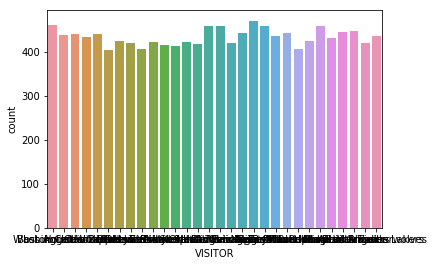

###############
Counter({'San Antonio Spurs': 477, 'Miami Heat': 466, 'Golden State Warriors': 463, 'Boston Celtics': 459, 'Cleveland Cavaliers': 456, 'Indiana Pacers': 451, 'Oklahoma City Thunder': 450, 'Houston Rockets': 448, 'Atlanta Hawks': 438, 'Memphis Grizzlies': 437, 'Portland Trail Blazers': 435, 'Los Angeles Clippers': 435, 'Dallas Mavericks': 434, 'Chicago Bulls': 434, 'Los Angeles Lakers': 433, 'Orlando Magic': 430, 'Toronto Raptors': 430, 'Brooklyn Nets': 429, 'Utah Jazz': 426, 'Charlotte Hornets': 425, 'New Orleans Pelicans': 421, 'Washington Wizards': 421, 'Phoenix Suns': 420, 'Milwaukee Bucks': 418, 'Philadelphia 76ers': 417, 'New York Knicks': 415, 'Detroit Pistons': 414, 'Denver Nuggets': 409, 'Sacramento Kings': 406, 'Minnesota Timberwolves': 405})


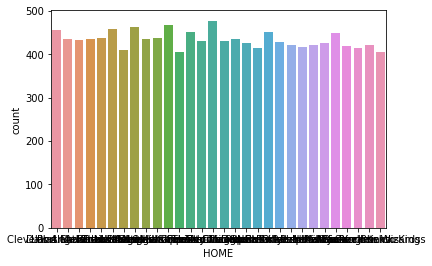

###############
Counter({3: 2714, 5: 2448, 6: 1977, 1: 1777, 7: 1657, 2: 1517, 4: 912})


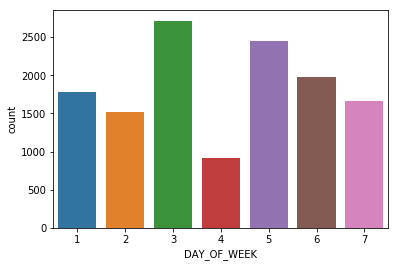

###############
Counter({1: 7739, 0: 5263})


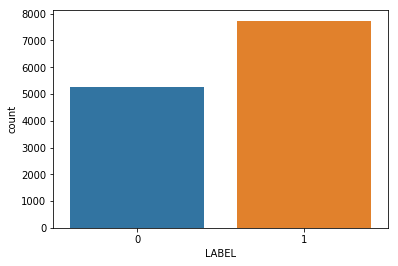

In [25]:
for col in ['VISITOR', 'HOME', 'DAY_OF_WEEK', 'LABEL']:
    
    print('###############')
    
    print(Counter(df[col]))
    sns.countplot(df[col])
    plt.show()


In [26]:
df.columns

Index(['DATE', 'START', 'VISITOR', 'PTS', 'HOME', 'PTS.1', 'ATTEND',
       'VISITOR_MP', 'VISITOR_FG', 'VISITOR_FGA', 'VISITOR_FG%', 'VISITOR_3P',
       'VISITOR_3PA', 'VISITOR_3P%', 'VISITOR_FT', 'VISITOR_FTA',
       'VISITOR_FT%', 'VISITOR_ORB', 'VISITOR_DRB', 'VISITOR_TRB',
       'VISITOR_AST', 'VISITOR_STL', 'VISITOR_BLK', 'VISITOR_TOV',
       'VISITOR_PF', 'VISITOR_PTS', 'VISITOR_+/-', 'VISITOR_TS%',
       'VISITOR_eFG%', 'VISITOR_3PAr', 'VISITOR_FTr', 'VISITOR_ORB%',
       'VISITOR_DRB%', 'VISITOR_TRB%', 'VISITOR_AST%', 'VISITOR_STL%',
       'VISITOR_BLK%', 'VISITOR_TOV%', 'VISITOR_USG%', 'VISITOR_ORtg',
       'VISITOR_DRtg', 'HOME_MP', 'HOME_FG', 'HOME_FGA', 'HOME_FG%', 'HOME_3P',
       'HOME_3PA', 'HOME_3P%', 'HOME_FT', 'HOME_FTA', 'HOME_FT%', 'HOME_ORB',
       'HOME_DRB', 'HOME_TRB', 'HOME_AST', 'HOME_STL', 'HOME_BLK', 'HOME_TOV',
       'HOME_PF', 'HOME_PTS', 'HOME_+/-', 'HOME_TS%', 'HOME_eFG%', 'HOME_3PAr',
       'HOME_FTr', 'HOME_ORB%', 'HOME_DRB%', 'HOME_TRB%',

In [27]:
## Creating YEAR column:

In [28]:
def map_year(x):
   
    month = x.month
    
    if month in [10, 11, 12]:
        
        year = x.year +1
        
        return year
    if month in [1, 2, 3, 4, 5, 6]:
    
        year = x.year
        
        return year
        
    
    

In [29]:
df.iloc[0]['DATE'].month

10

In [30]:
df['YEAR'] = df['DATE'].apply(lambda x : map_year(x))

In [31]:
df[df['DATE'] > '2009-12-30'].head()

DATE  START             VISITOR   PTS                   HOME  PTS.1  \
468 2009-12-31  3:00p       Chicago Bulls  98.0        Detroit Pistons   87.0   
469 2009-12-31  7:00p    Dallas Mavericks  94.0        Houston Rockets   97.0   
470 2009-12-31  9:30p  Philadelphia 76ers  88.0   Los Angeles Clippers  104.0   
471 2009-12-31  8:00p           Utah Jazz  86.0  Oklahoma City Thunder   87.0   
472 2009-12-31  7:00p          Miami Heat  78.0      San Antonio Spurs  108.0   

      ATTEND  VISITOR_MP  VISITOR_FG  VISITOR_FGA  ...   HOME_AST%  HOME_STL%  \
468  22076.0       240.0        33.0         69.0  ...        50.0        9.9   
469  18306.0       240.0        37.0         82.0  ...        60.0        7.4   
470  15257.0       240.0        32.0         85.0  ...        70.7        3.3   
471  18203.0       240.0        37.0         90.0  ...        68.6        5.4   
472  18581.0       240.0        33.0         75.0  ...        69.0       10.6   

     HOME_BLK%  HOME_TOV%  HOME_USG%  HOME_ORtg  HOME_DRtg  DAY_OF_WEEK  \
468       11.3       11.1      100.0       95.4      107.5            4   
469        2.9       12.9      100.0      102.9       99.7            4   
470       11.6       19.3      100.0      113.3       95.9            4   
471        6.2       18.0      100.0       94.3       93.3            4   
472        6.3       17.6      100.0      114.1       82.4            4   

     LABEL  YEAR  
468      0  2010  
469      1  2010  
470      1  2010  
471      1  2010  
472      1  2010  

[5 rows x 78 columns]

## EDA

In [32]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

PTS  PTS.1   ATTEND  VISITOR_MP  VISITOR_FG  VISITOR_FGA  VISITOR_FG%  \
0   95.0   89.0  20562.0       240.0        32.0         72.0        0.444   
1  102.0   91.0  19871.0       240.0        39.0         84.0        0.464   
2   92.0   99.0  18997.0       240.0        39.0         87.0        0.448   
3   87.0   96.0  20403.0       240.0        30.0         81.0        0.370   
4  109.0  120.0  17998.0       240.0        39.0         73.0        0.534   

   VISITOR_3P  VISITOR_3PA  VISITOR_3P%  ...   HOME_AST%  HOME_STL%  \
0         9.0         19.0        0.474  ...        58.6        7.9   
1         4.0         13.0        0.308  ...        53.3        6.7   
2         3.0         15.0        0.200  ...        48.6       13.3   
3         5.0         18.0        0.278  ...        69.7        9.3   
4        10.0         18.0        0.556  ...        65.2       15.9   

   HOME_BLK%  HOME_TOV%  HOME_USG%  HOME_ORtg  HOME_DRtg  DAY_OF_WEEK  LABEL  \
0       17.0       13.4      100.0      100.4      107.2            2      0   
1       12.7        9.0      100.0      101.6      113.9            2      0   
2        5.6       13.6      100.0      101.6       94.4            2      1   
3       19.0       23.1      100.0       99.4       90.1            2      1   
4       10.9        9.1      100.0      119.0      108.1            3      1   

   YEAR  
0  2010  
1  2010  
2  2010  
3  2010  
4  2010  

[5 rows x 74 columns]

### Numerical Data Distribution:

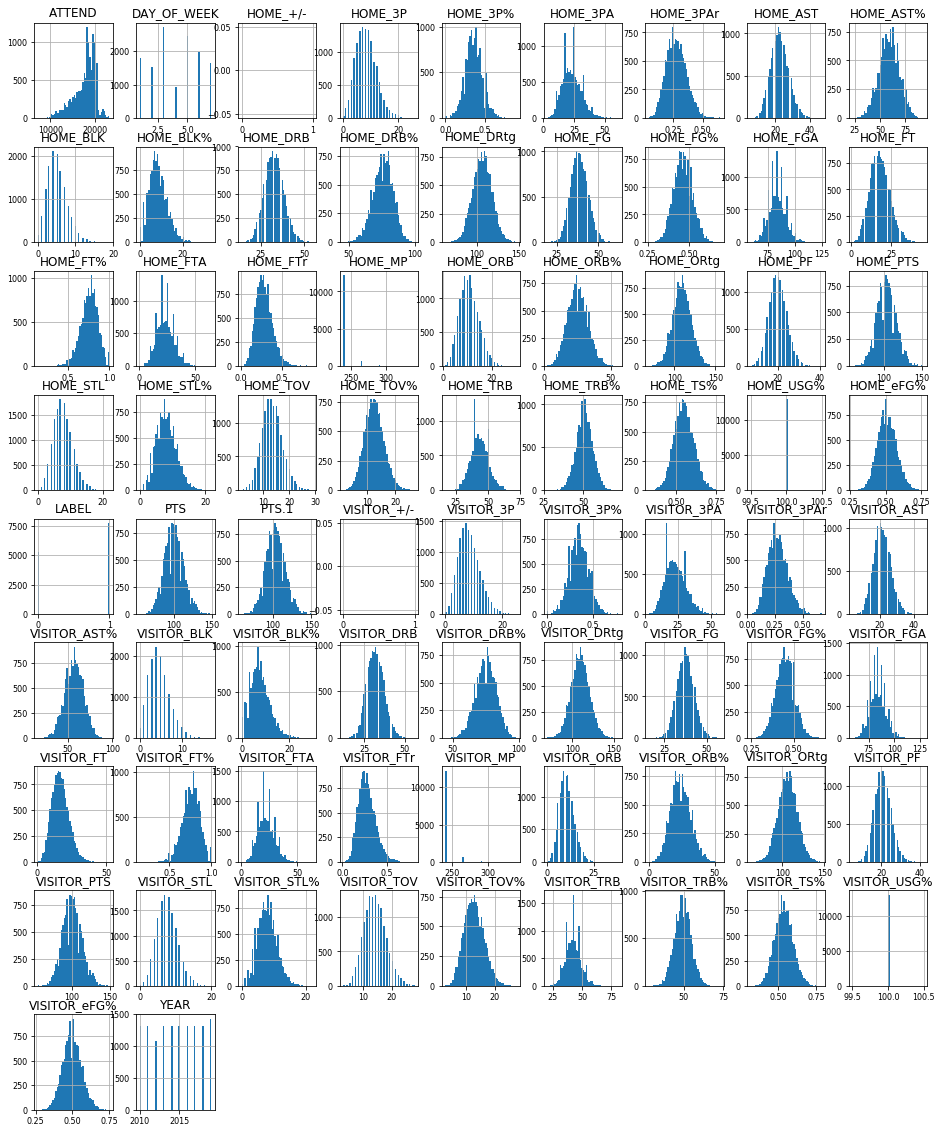

In [93]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

### Correlation about points made by the home team (PTS.1) vs rest of variables 
### and points made by the visitor team (PTS)

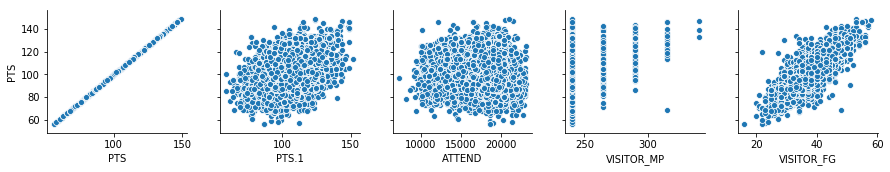

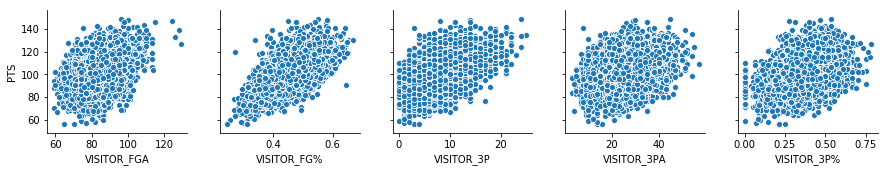

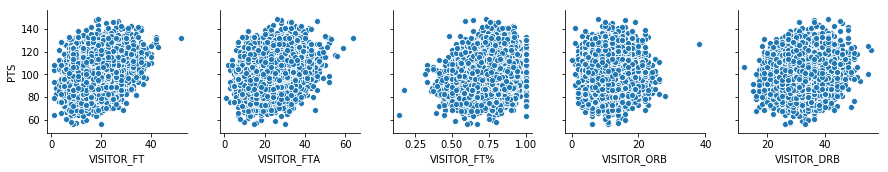

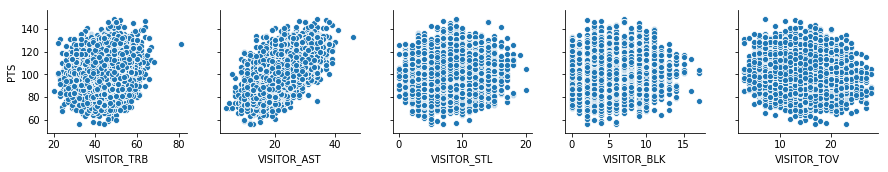

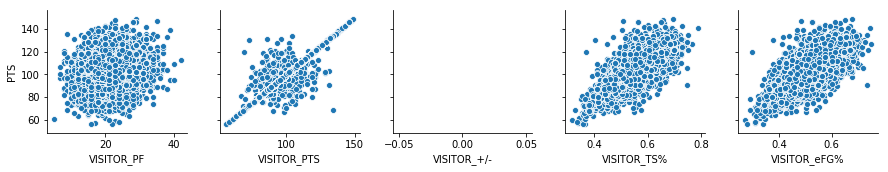

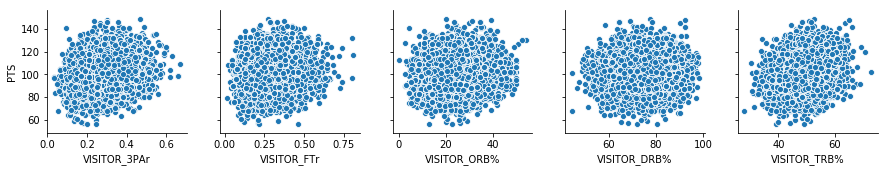

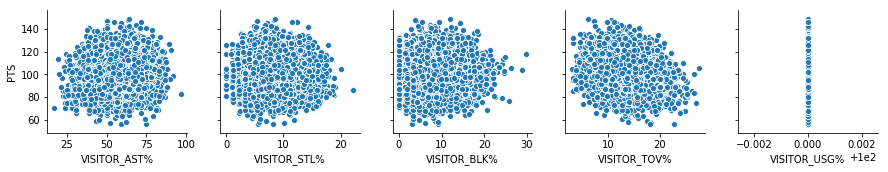

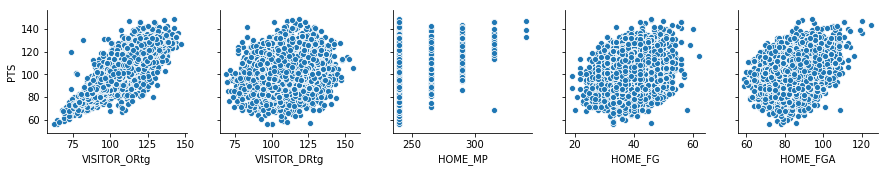

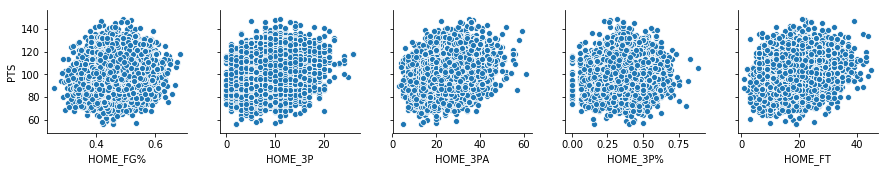

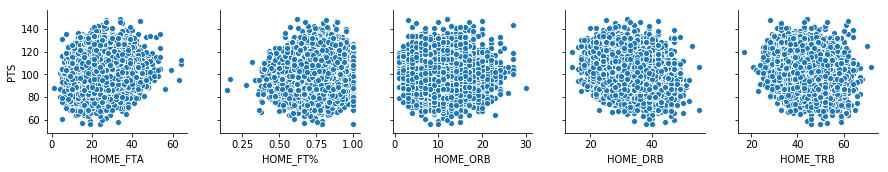

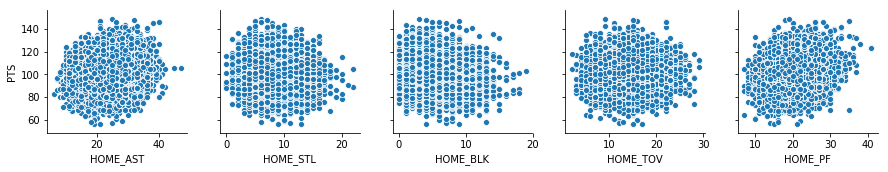

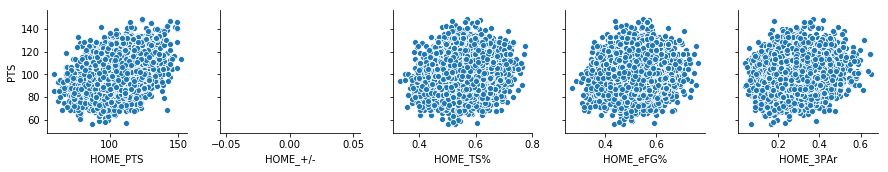

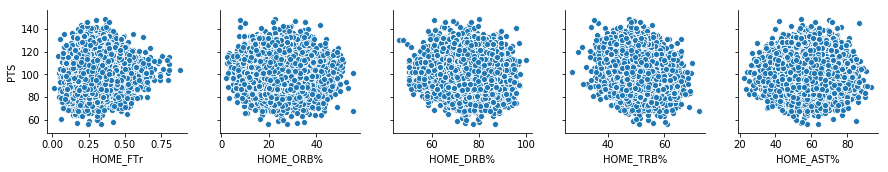

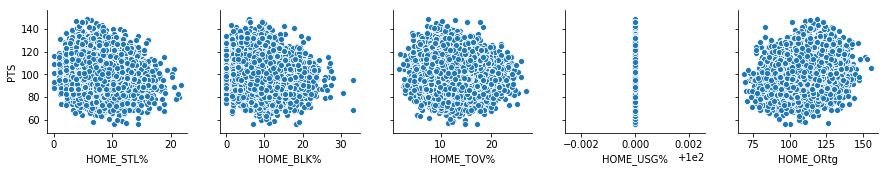

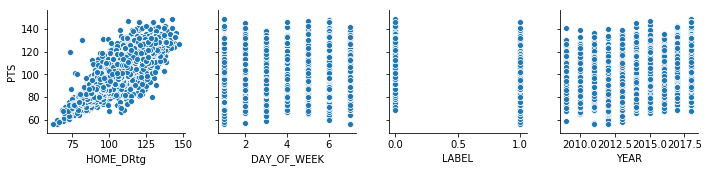

In [32]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['PTS'])

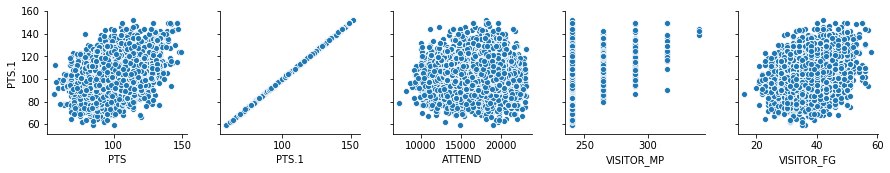

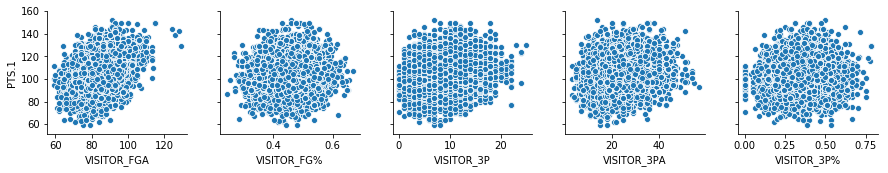

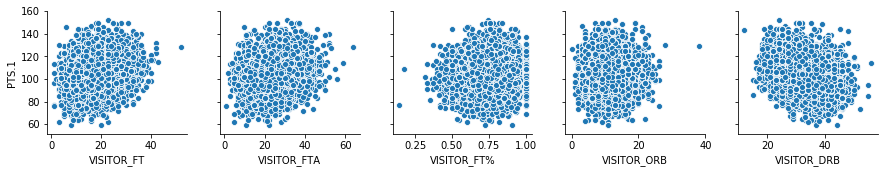

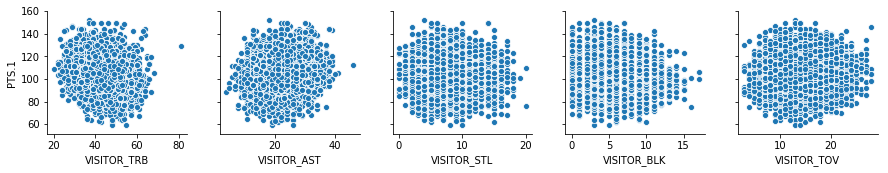

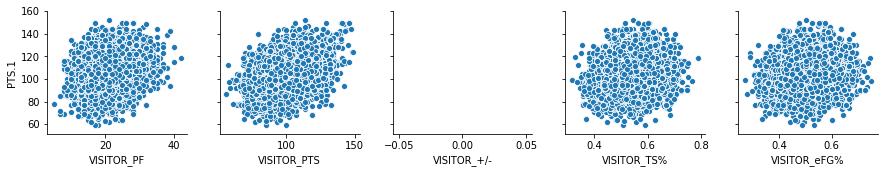

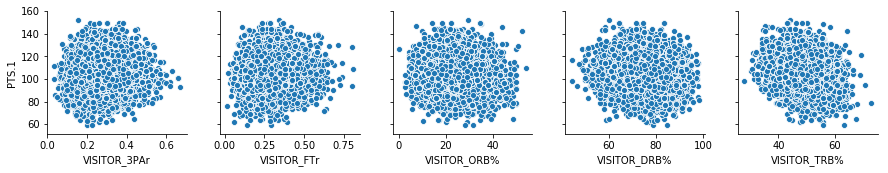

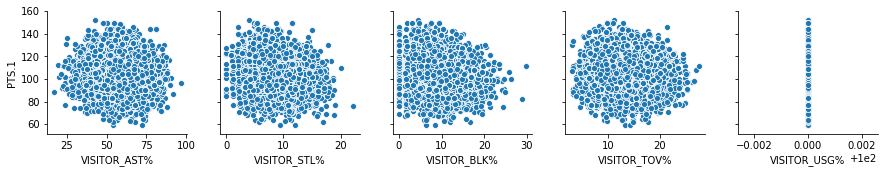

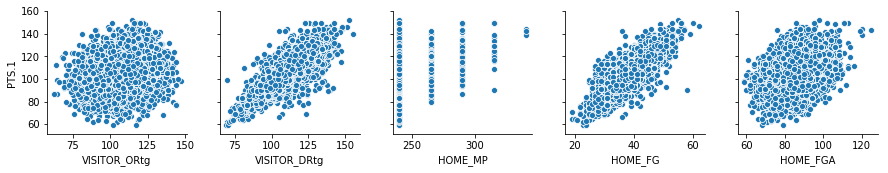

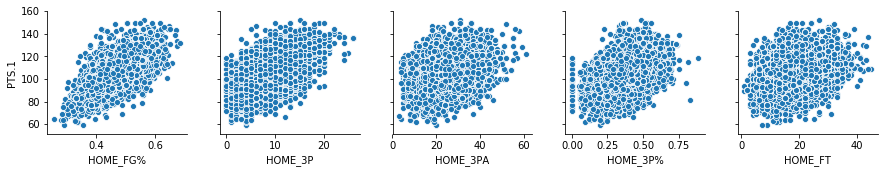

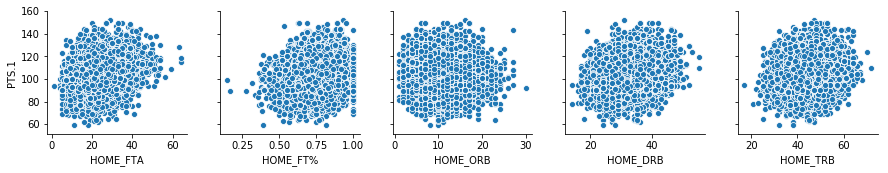

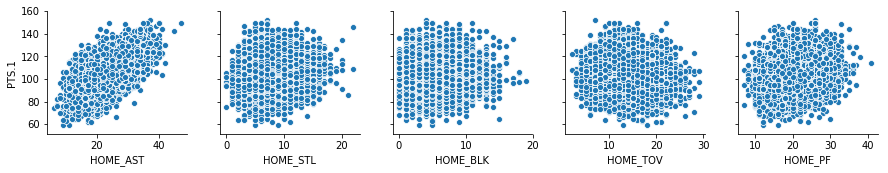

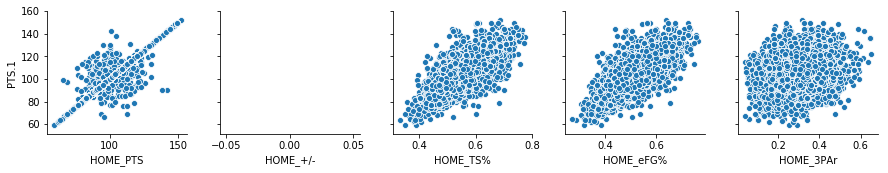

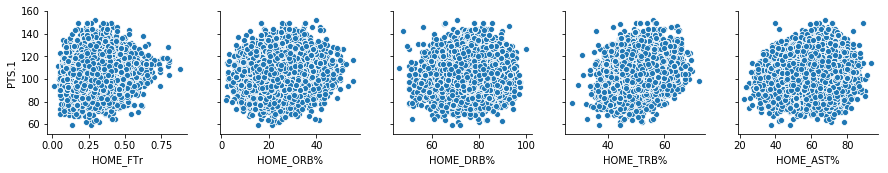

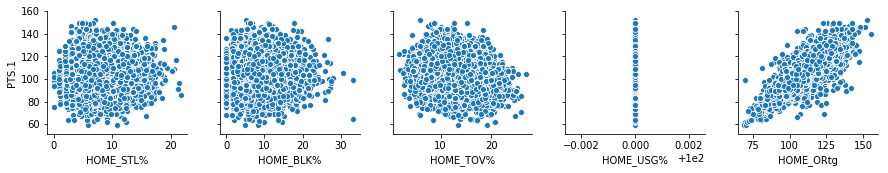

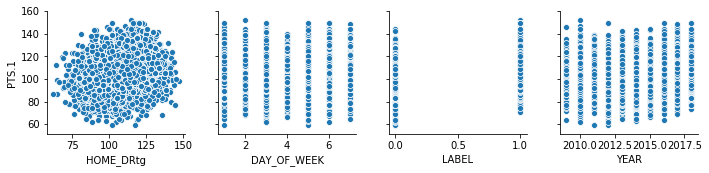

In [33]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['PTS.1'])

In [34]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'PTS']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['PTS'].iloc[0] for feature in individual_features_df}
all_correlations['PTS'] = 1
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
print('Most correlated features with VISITOR PTS ')
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

Most correlated features with VISITOR PTS 
   VISITOR_TOV%: -0.21817572966062862
    VISITOR_TOV: -0.1104685288206
         ATTEND: -0.04000172042532959
    VISITOR_ORB: -0.021249789587968956
   VISITOR_STL%: 0.004019747903637082
   VISITOR_BLK%: 0.03385204593744097
    VISITOR_BLK: 0.04052731427343501
   VISITOR_DRB%: 0.07196243773798464
   VISITOR_ORB%: 0.07414123678160986
    VISITOR_STL: 0.09038874080088953
   VISITOR_AST%: 0.10714559251928144
    VISITOR_TRB: 0.13976378803584044
    VISITOR_FTr: 0.14939561701715162
     VISITOR_PF: 0.1570292663198735
   VISITOR_DRtg: 0.16221624679372035
    VISITOR_FT%: 0.16830426957097652
    VISITOR_DRB: 0.18428102682588723
     VISITOR_MP: 0.22473716640118246
   VISITOR_TRB%: 0.24380436948131715
   VISITOR_3PAr: 0.25155387821730474
    VISITOR_FTA: 0.2644690519191899
     VISITOR_FT: 0.3132656707064491
    VISITOR_3PA: 0.3301487793650588
    VISITOR_FGA: 0.3411158878785842
          PTS.1: 0.42100516140084543
    VISITOR_3P%: 0.4341103742087689

In [35]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'PTS.1']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['PTS.1'].iloc[0] for feature in individual_features_df}
all_correlations['PTS.1'] = 1
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
print('Most correlated features with HOME PTS ')
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

Most correlated features with HOME PTS 
   VISITOR_TRB%: -0.244233429902381
    VISITOR_DRB: -0.24201703361993684
    VISITOR_TRB: -0.18978567973885932
   VISITOR_STL%: -0.14620164425095056
    VISITOR_BLK: -0.13046531053447472
   VISITOR_BLK%: -0.12889180940151548
   VISITOR_DRB%: -0.06921209363774444
   VISITOR_ORB%: -0.06395005075181605
    VISITOR_STL: -0.04961523057717052
   VISITOR_TOV%: -0.04829603524873751
   VISITOR_AST%: -0.03052045935746075
    VISITOR_ORB: 0.018131113024055207
    VISITOR_FT%: 0.039436718880687005
         ATTEND: 0.04834986457088208
    VISITOR_3P%: 0.05516574081627825
    VISITOR_TOV: 0.06761993662837427
    VISITOR_FTr: 0.07709290357303365
    VISITOR_FG%: 0.09453797161200721
   VISITOR_eFG%: 0.13388486046286813
    VISITOR_TS%: 0.15071955396212738
   VISITOR_ORtg: 0.151128937485494
    VISITOR_AST: 0.15554876617232904
   VISITOR_3PAr: 0.17705430254651255
     VISITOR_MP: 0.1847558608195366
    VISITOR_FTA: 0.18523738984376184
     VISITOR_FT: 0.18839455

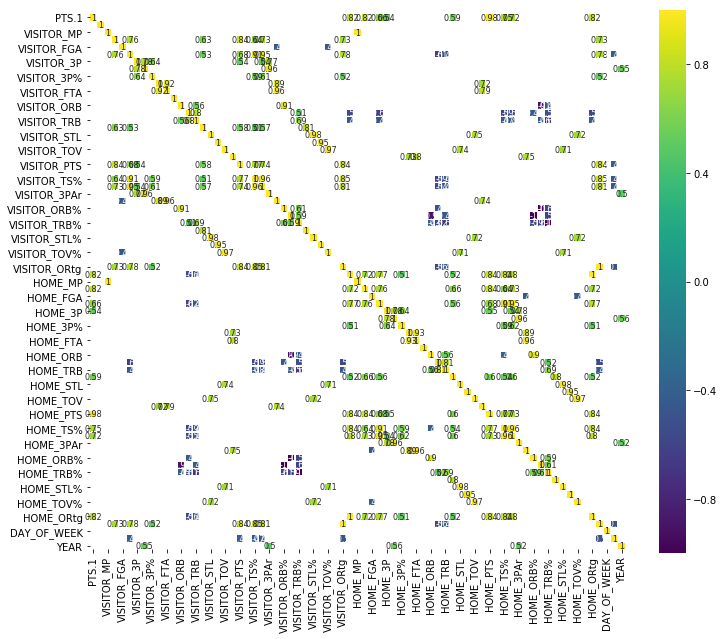

In [36]:
corr = df_num.drop('PTS', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

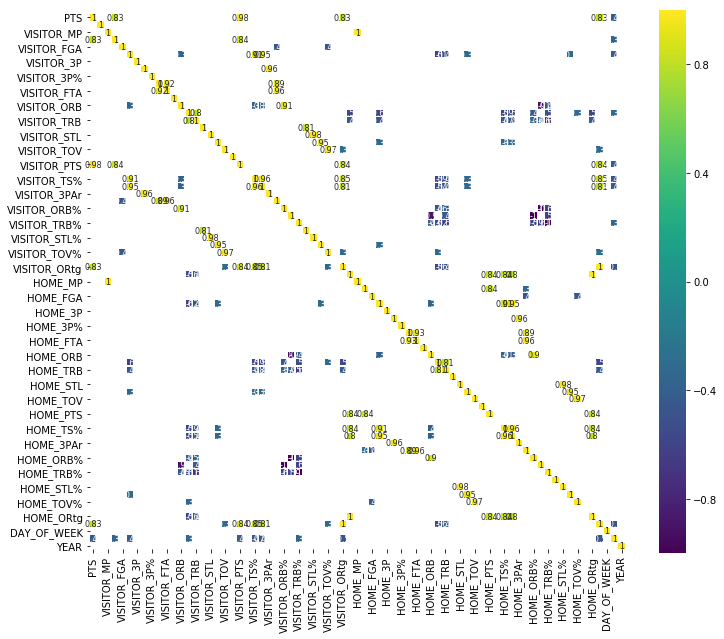

In [37]:
corr = df_num.drop('PTS.1', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.8) | (corr <= -0.3)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

## Calculating the srike of the whole stats:


## Calculating strikes of the teams and pltotting them:

In [33]:
df.columns

Index(['DATE', 'START', 'VISITOR', 'PTS', 'HOME', 'PTS.1', 'ATTEND',
       'VISITOR_MP', 'VISITOR_FG', 'VISITOR_FGA', 'VISITOR_FG%', 'VISITOR_3P',
       'VISITOR_3PA', 'VISITOR_3P%', 'VISITOR_FT', 'VISITOR_FTA',
       'VISITOR_FT%', 'VISITOR_ORB', 'VISITOR_DRB', 'VISITOR_TRB',
       'VISITOR_AST', 'VISITOR_STL', 'VISITOR_BLK', 'VISITOR_TOV',
       'VISITOR_PF', 'VISITOR_PTS', 'VISITOR_+/-', 'VISITOR_TS%',
       'VISITOR_eFG%', 'VISITOR_3PAr', 'VISITOR_FTr', 'VISITOR_ORB%',
       'VISITOR_DRB%', 'VISITOR_TRB%', 'VISITOR_AST%', 'VISITOR_STL%',
       'VISITOR_BLK%', 'VISITOR_TOV%', 'VISITOR_USG%', 'VISITOR_ORtg',
       'VISITOR_DRtg', 'HOME_MP', 'HOME_FG', 'HOME_FGA', 'HOME_FG%', 'HOME_3P',
       'HOME_3PA', 'HOME_3P%', 'HOME_FT', 'HOME_FTA', 'HOME_FT%', 'HOME_ORB',
       'HOME_DRB', 'HOME_TRB', 'HOME_AST', 'HOME_STL', 'HOME_BLK', 'HOME_TOV',
       'HOME_PF', 'HOME_PTS', 'HOME_+/-', 'HOME_TS%', 'HOME_eFG%', 'HOME_3PAr',
       'HOME_FTr', 'HOME_ORB%', 'HOME_DRB%', 'HOME_TRB%',

In [34]:
## Calculating the strike by team, year and home or away:

In [33]:
home_or_away= ['H', 'V']

In [34]:
year_list = list(df['YEAR'].unique())

In [35]:
## Unique teams:

len(list(df['HOME'].unique()))

30

In [36]:
len(list(df['VISITOR'].unique()))

30

In [37]:
team_list = []

team_list.extend(list(df['HOME'].unique()))
team_list.extend(list(df['VISITOR'].unique()))
team_list = list(set(team_list))

In [38]:
team_list

['New York Knicks',
 'Miami Heat',
 'Los Angeles Clippers',
 'San Antonio Spurs',
 'Milwaukee Bucks',
 'Portland Trail Blazers',
 'Denver Nuggets',
 'Atlanta Hawks',
 'Golden State Warriors',
 'Oklahoma City Thunder',
 'Brooklyn Nets',
 'Cleveland Cavaliers',
 'Detroit Pistons',
 'Houston Rockets',
 'Chicago Bulls',
 'Philadelphia 76ers',
 'Memphis Grizzlies',
 'Phoenix Suns',
 'Los Angeles Lakers',
 'Toronto Raptors',
 'Minnesota Timberwolves',
 'Charlotte Hornets',
 'Orlando Magic',
 'Sacramento Kings',
 'Washington Wizards',
 'New Orleans Pelicans',
 'Boston Celtics',
 'Utah Jazz',
 'Dallas Mavericks',
 'Indiana Pacers']

In [39]:
team = 'Boston Celtics'
year = 2017
h_v = 'HOME'

if h_v == 'HOME':
    cols = ['DATE', 'START', 'HOME', 'PTS.1', 'ATTEND',
       'HOME_MP', 'HOME_FG', 'HOME_FGA', 'HOME_FG%', 'HOME_3P',
       'HOME_3PA', 'HOME_3P%', 'HOME_FT', 'HOME_FTA', 'HOME_FT%', 'HOME_ORB',
       'HOME_DRB', 'HOME_TRB', 'HOME_AST', 'HOME_STL', 'HOME_BLK', 'HOME_TOV',
       'HOME_PF', 'HOME_PTS', 'HOME_+/-', 'HOME_TS%', 'HOME_eFG%', 'HOME_3PAr',
       'HOME_FTr', 'HOME_ORB%', 'HOME_DRB%', 'HOME_TRB%', 'HOME_AST%',
       'HOME_STL%', 'HOME_BLK%', 'HOME_TOV%', 'HOME_USG%', 'HOME_ORtg',
       'HOME_DRtg', 'LABEL', 'YEAR']
if h_v == 'VISITOR':
    cols = ['DATE', 'START', 'VISITOR', 'PTS', 'ATTEND',
       'VISITOR_MP', 'VISITOR_FG', 'VISITOR_FGA', 'VISITOR_FG%', 'VISITOR_3P',
       'VISITOR_3PA', 'VISITOR_3P%', 'VISITOR_FT', 'VISITOR_FTA',
       'VISITOR_FT%', 'VISITOR_ORB', 'VISITOR_DRB', 'VISITOR_TRB',
       'VISITOR_AST', 'VISITOR_STL', 'VISITOR_BLK', 'VISITOR_TOV',
       'VISITOR_PF', 'VISITOR_PTS', 'VISITOR_+/-', 'VISITOR_TS%',
       'VISITOR_eFG%', 'VISITOR_3PAr', 'VISITOR_FTr', 'VISITOR_ORB%',
       'VISITOR_DRB%', 'VISITOR_TRB%', 'VISITOR_AST%', 'VISITOR_STL%',
       'VISITOR_BLK%', 'VISITOR_TOV%', 'VISITOR_USG%', 'VISITOR_ORtg',
       'VISITOR_DRtg', 'LABEL', 'YEAR']

data = df[(df['YEAR'] == year) & (df['HOME'] == team)]

data = data[cols]

In [40]:
## Creating the dictionary of the year_team_{H/V} : pd.Dataframe:

dict_nba = {}

for year in year_list:
    
    for team in team_list:
        for h_v in home_or_away:
            if h_v == 'H':
                cols = ['DATE', 'START', 'HOME', 'PTS.1', 'ATTEND',
                   'HOME_MP', 'HOME_FG', 'HOME_FGA', 'HOME_FG%', 'HOME_3P',
                   'HOME_3PA', 'HOME_3P%', 'HOME_FT', 'HOME_FTA', 'HOME_FT%', 'HOME_ORB',
                   'HOME_DRB', 'HOME_TRB', 'HOME_AST', 'HOME_STL', 'HOME_BLK', 'HOME_TOV',
                   'HOME_PF', 'HOME_PTS', 'HOME_+/-', 'HOME_TS%', 'HOME_eFG%', 'HOME_3PAr',
                   'HOME_FTr', 'HOME_ORB%', 'HOME_DRB%', 'HOME_TRB%', 'HOME_AST%',
                   'HOME_STL%', 'HOME_BLK%', 'HOME_TOV%', 'HOME_USG%', 'HOME_ORtg',
                   'HOME_DRtg', 'LABEL', 'YEAR']
                
                
                data = df[(df['YEAR'] == year) & (df['HOME'] == team)]

                data = data[cols]
                data = data.reset_index()
                key = str(year)+'_'+team.replace(' ', '') +'_'+h_v
                dict_nba[key] = data
            if h_v == 'V':
                cols = ['DATE', 'START', 'VISITOR', 'PTS', 'ATTEND',
                   'VISITOR_MP', 'VISITOR_FG', 'VISITOR_FGA', 'VISITOR_FG%', 'VISITOR_3P',
                   'VISITOR_3PA', 'VISITOR_3P%', 'VISITOR_FT', 'VISITOR_FTA',
                   'VISITOR_FT%', 'VISITOR_ORB', 'VISITOR_DRB', 'VISITOR_TRB',
                   'VISITOR_AST', 'VISITOR_STL', 'VISITOR_BLK', 'VISITOR_TOV',
                   'VISITOR_PF', 'VISITOR_PTS', 'VISITOR_+/-', 'VISITOR_TS%',
                   'VISITOR_eFG%', 'VISITOR_3PAr', 'VISITOR_FTr', 'VISITOR_ORB%',
                   'VISITOR_DRB%', 'VISITOR_TRB%', 'VISITOR_AST%', 'VISITOR_STL%',
                   'VISITOR_BLK%', 'VISITOR_TOV%', 'VISITOR_USG%', 'VISITOR_ORtg',
                   'VISITOR_DRtg', 'LABEL', 'YEAR']
                
                data = df[(df['YEAR'] == year) & (df['VISITOR'] == team)]

                data = data[cols]
                data = data.reset_index()
                key = str(year)+'_'+team.replace(' ', '') +'_'+h_v
                dict_nba[key] = data

            
             

In [41]:
len(dict_nba.keys())

600

In [42]:
dict_nba['2015_WashingtonWizards_V'].head()

index       DATE  START             VISITOR    PTS   ATTEND  VISITOR_MP  \
0   6343 2014-10-29  7:30p  Washington Wizards   95.0  19744.0       240.0   
1   6354 2014-10-30  7:00p  Washington Wizards  105.0  18846.0       240.0   
2   6388 2014-11-04  7:30p  Washington Wizards   98.0  19812.0       240.0   
3   6414 2014-11-07  7:30p  Washington Wizards   84.0  19800.0       240.0   
4   6419 2014-11-08  7:00p  Washington Wizards   97.0  17302.0       240.0   

   VISITOR_FG  VISITOR_FGA  VISITOR_FG%  ...   VISITOR_TRB%  VISITOR_AST%  \
0        36.0         75.0        0.480  ...           45.0          55.6   
1        39.0         80.0        0.488  ...           52.9          56.4   
2        39.0         80.0        0.488  ...           48.8          66.7   
3        30.0         83.0        0.361  ...           50.5          63.3   
4        39.0         81.0        0.481  ...           56.3          59.0   

   VISITOR_STL%  VISITOR_BLK%  VISITOR_TOV%  VISITOR_USG%  VISITOR_ORtg  \
0           7.7           3.8          14.1         100.0         104.3   
1          10.5           0.0          11.6         100.0         109.7   
2           9.0           6.1          12.0         100.0         110.8   
3           7.5           8.6          11.8         100.0          90.0   
4           8.6           7.5          13.3         100.0         103.7   

   VISITOR_DRtg  LABEL  YEAR  
0         117.5      1  2015  
1         102.4      0  2015  
2          93.9      0  2015  
3         110.3      1  2015  
4          96.2      0  2015  

[5 rows x 42 columns]

In [43]:
dict_nba.keys()

dict_keys(['2010_NewYorkKnicks_H', '2010_NewYorkKnicks_V', '2010_MiamiHeat_H', '2010_MiamiHeat_V', '2010_LosAngelesClippers_H', '2010_LosAngelesClippers_V', '2010_SanAntonioSpurs_H', '2010_SanAntonioSpurs_V', '2010_MilwaukeeBucks_H', '2010_MilwaukeeBucks_V', '2010_PortlandTrailBlazers_H', '2010_PortlandTrailBlazers_V', '2010_DenverNuggets_H', '2010_DenverNuggets_V', '2010_AtlantaHawks_H', '2010_AtlantaHawks_V', '2010_GoldenStateWarriors_H', '2010_GoldenStateWarriors_V', '2010_OklahomaCityThunder_H', '2010_OklahomaCityThunder_V', '2010_BrooklynNets_H', '2010_BrooklynNets_V', '2010_ClevelandCavaliers_H', '2010_ClevelandCavaliers_V', '2010_DetroitPistons_H', '2010_DetroitPistons_V', '2010_HoustonRockets_H', '2010_HoustonRockets_V', '2010_ChicagoBulls_H', '2010_ChicagoBulls_V', '2010_Philadelphia76ers_H', '2010_Philadelphia76ers_V', '2010_MemphisGrizzlies_H', '2010_MemphisGrizzlies_V', '2010_PhoenixSuns_H', '2010_PhoenixSuns_V', '2010_LosAngelesLakers_H', '2010_LosAngelesLakers_V', '2010_T

In [44]:
def EMA(values, window):
    """ Numpy implementation of EMA
    """
    weights = np.exp(np.linspace(-1., 0., window))
    weights /= weights.sum()
    a =  np.convolve(values, weights, mode='full')[:len(values)]
    a[:window] = a[window]
    return pd.Series(a)

In [45]:
cols_to_rolling_mean_home = ['HOME_MP', 'HOME_FG', 'HOME_FGA', 'HOME_FG%', 'HOME_3P',
                   'HOME_3PA', 'HOME_3P%', 'HOME_FT', 'HOME_FTA', 'HOME_FT%', 'HOME_ORB',
                   'HOME_DRB', 'HOME_TRB', 'HOME_AST', 'HOME_STL', 'HOME_BLK', 'HOME_TOV',
                   'HOME_PF', 'HOME_PTS', 'HOME_+/-', 'HOME_TS%', 'HOME_eFG%', 'HOME_3PAr',
                   'HOME_FTr', 'HOME_ORB%', 'HOME_DRB%', 'HOME_TRB%', 'HOME_AST%',
                   'HOME_STL%', 'HOME_BLK%', 'HOME_TOV%', 'HOME_USG%', 'HOME_ORtg',
                   'HOME_DRtg']

cols_to_rolling_mean_visitor = ['VISITOR_MP', 'VISITOR_FG', 'VISITOR_FGA', 'VISITOR_FG%', 'VISITOR_3P',
                   'VISITOR_3PA', 'VISITOR_3P%', 'VISITOR_FT', 'VISITOR_FTA',
                   'VISITOR_FT%', 'VISITOR_ORB', 'VISITOR_DRB', 'VISITOR_TRB',
                   'VISITOR_AST', 'VISITOR_STL', 'VISITOR_BLK', 'VISITOR_TOV',
                   'VISITOR_PF', 'VISITOR_PTS', 'VISITOR_+/-', 'VISITOR_TS%',
                   'VISITOR_eFG%', 'VISITOR_3PAr', 'VISITOR_FTr', 'VISITOR_ORB%',
                   'VISITOR_DRB%', 'VISITOR_TRB%', 'VISITOR_AST%', 'VISITOR_STL%',
                   'VISITOR_BLK%', 'VISITOR_TOV%', 'VISITOR_USG%', 'VISITOR_ORtg',
                   'VISITOR_DRtg']

In [46]:
data.columns

Index(['index', 'DATE', 'START', 'VISITOR', 'PTS', 'ATTEND', 'VISITOR_MP',
       'VISITOR_FG', 'VISITOR_FGA', 'VISITOR_FG%', 'VISITOR_3P', 'VISITOR_3PA',
       'VISITOR_3P%', 'VISITOR_FT', 'VISITOR_FTA', 'VISITOR_FT%',
       'VISITOR_ORB', 'VISITOR_DRB', 'VISITOR_TRB', 'VISITOR_AST',
       'VISITOR_STL', 'VISITOR_BLK', 'VISITOR_TOV', 'VISITOR_PF',
       'VISITOR_PTS', 'VISITOR_+/-', 'VISITOR_TS%', 'VISITOR_eFG%',
       'VISITOR_3PAr', 'VISITOR_FTr', 'VISITOR_ORB%', 'VISITOR_DRB%',
       'VISITOR_TRB%', 'VISITOR_AST%', 'VISITOR_STL%', 'VISITOR_BLK%',
       'VISITOR_TOV%', 'VISITOR_USG%', 'VISITOR_ORtg', 'VISITOR_DRtg', 'LABEL',
       'YEAR'],
      dtype='object')

In [47]:
#dict_nba['2017_BostonCeltics_H']['r_HOME_3P%'] = EMA(dict_nba['2017_BostonCeltics_H']['HOME_3P%'], 7)

In [48]:
#dict_nba['2017_BostonCeltics_H'].head()

In [49]:
#dict_nba['2017_BostonCeltics_H']['r_HOME_3P%']

In [50]:
## Calculating rolling stats from all the dfs:

for key, value in dict_nba.items():
    print(key)
    home_or_visitor = key.split('_')[-1]
    
    if home_or_visitor == 'H':
        for col in cols_to_rolling_mean_home:
            #print(col)
            col_roll = 'RLL_'+col
            value[col_roll] = EMA(value[col], 7)
        #dict_nba[key] = value
    if home_or_visitor == 'V':
        for col in cols_to_rolling_mean_visitor:
            #print(col)
            col_roll = 'RLL_'+col
            value[col_roll] = EMA(value[col], 7)
    
    dict_nba[key] = value



2010_NewYorkKnicks_H
2010_NewYorkKnicks_V
2010_MiamiHeat_H
2010_MiamiHeat_V
2010_LosAngelesClippers_H
2010_LosAngelesClippers_V
2010_SanAntonioSpurs_H
2010_SanAntonioSpurs_V
2010_MilwaukeeBucks_H
2010_MilwaukeeBucks_V
2010_PortlandTrailBlazers_H
2010_PortlandTrailBlazers_V
2010_DenverNuggets_H
2010_DenverNuggets_V
2010_AtlantaHawks_H
2010_AtlantaHawks_V
2010_GoldenStateWarriors_H
2010_GoldenStateWarriors_V
2010_OklahomaCityThunder_H
2010_OklahomaCityThunder_V
2010_BrooklynNets_H
2010_BrooklynNets_V
2010_ClevelandCavaliers_H
2010_ClevelandCavaliers_V
2010_DetroitPistons_H
2010_DetroitPistons_V
2010_HoustonRockets_H
2010_HoustonRockets_V
2010_ChicagoBulls_H
2010_ChicagoBulls_V
2010_Philadelphia76ers_H
2010_Philadelphia76ers_V
2010_MemphisGrizzlies_H
2010_MemphisGrizzlies_V
2010_PhoenixSuns_H
2010_PhoenixSuns_V
2010_LosAngelesLakers_H
2010_LosAngelesLakers_V
2010_TorontoRaptors_H
2010_TorontoRaptors_V
2010_MinnesotaTimberwolves_H
2010_MinnesotaTimberwolves_V
2010_CharlotteHornets_H
2010_C

2016_LosAngelesClippers_V
2016_SanAntonioSpurs_H
2016_SanAntonioSpurs_V
2016_MilwaukeeBucks_H
2016_MilwaukeeBucks_V
2016_PortlandTrailBlazers_H
2016_PortlandTrailBlazers_V
2016_DenverNuggets_H
2016_DenverNuggets_V
2016_AtlantaHawks_H
2016_AtlantaHawks_V
2016_GoldenStateWarriors_H
2016_GoldenStateWarriors_V
2016_OklahomaCityThunder_H
2016_OklahomaCityThunder_V
2016_BrooklynNets_H
2016_BrooklynNets_V
2016_ClevelandCavaliers_H
2016_ClevelandCavaliers_V
2016_DetroitPistons_H
2016_DetroitPistons_V
2016_HoustonRockets_H
2016_HoustonRockets_V
2016_ChicagoBulls_H
2016_ChicagoBulls_V
2016_Philadelphia76ers_H
2016_Philadelphia76ers_V
2016_MemphisGrizzlies_H
2016_MemphisGrizzlies_V
2016_PhoenixSuns_H
2016_PhoenixSuns_V
2016_LosAngelesLakers_H
2016_LosAngelesLakers_V
2016_TorontoRaptors_H
2016_TorontoRaptors_V
2016_MinnesotaTimberwolves_H
2016_MinnesotaTimberwolves_V
2016_CharlotteHornets_H
2016_CharlotteHornets_V
2016_OrlandoMagic_H
2016_OrlandoMagic_V
2016_SacramentoKings_H
2016_SacramentoKings_

In [51]:
dict_nba['2010_Philadelphia76ers_H'].head()

index       DATE  START                HOME  PTS.1   ATTEND  HOME_MP  \
0     28 2009-10-30  7:00p  Philadelphia 76ers   99.0  14638.0    240.0   
1     57 2009-11-03  7:00p  Philadelphia 76ers   74.0  11251.0    240.0   
2     82 2009-11-06  7:00p  Philadelphia 76ers   97.0  10054.0    240.0   
3    100 2009-11-09  7:00p  Philadelphia 76ers  115.0  10205.0    240.0   
4    130 2009-11-13  7:00p  Philadelphia 76ers   90.0  10738.0    240.0   

   HOME_FG  HOME_FGA  HOME_FG%      ...        RLL_HOME_ORB%  RLL_HOME_DRB%  \
0     32.0      70.0     0.457      ...            24.661895      72.199799   
1     29.0      80.0     0.363      ...            24.661895      72.199799   
2     36.0      72.0     0.500      ...            24.661895      72.199799   
3     44.0      82.0     0.537      ...            24.661895      72.199799   
4     34.0      71.0     0.479      ...            24.661895      72.199799   

   RLL_HOME_TRB%  RLL_HOME_AST%  RLL_HOME_STL%  RLL_HOME_BLK%  RLL_HOME_TOV%  \
0      46.898697      57.146746       9.114811       9.877922      14.344081   
1      46.898697      57.146746       9.114811       9.877922      14.344081   
2      46.898697      57.146746       9.114811       9.877922      14.344081   
3      46.898697      57.146746       9.114811       9.877922      14.344081   
4      46.898697      57.146746       9.114811       9.877922      14.344081   

   RLL_HOME_USG%  RLL_HOME_ORtg  RLL_HOME_DRtg  
0          100.0     102.616613     115.398969  
1          100.0     102.616613     115.398969  
2          100.0     102.616613     115.398969  
3          100.0     102.616613     115.398969  
4          100.0     102.616613     115.398969  

[5 rows x 76 columns]

In [52]:
#dict_nba['2010_Philadelphia76ers_H'].drop(drop_cols_home, 1).head()

In [53]:
dict_nba['2010_Philadelphia76ers_H'].columns

Index(['index', 'DATE', 'START', 'HOME', 'PTS.1', 'ATTEND', 'HOME_MP',
       'HOME_FG', 'HOME_FGA', 'HOME_FG%', 'HOME_3P', 'HOME_3PA', 'HOME_3P%',
       'HOME_FT', 'HOME_FTA', 'HOME_FT%', 'HOME_ORB', 'HOME_DRB', 'HOME_TRB',
       'HOME_AST', 'HOME_STL', 'HOME_BLK', 'HOME_TOV', 'HOME_PF', 'HOME_PTS',
       'HOME_+/-', 'HOME_TS%', 'HOME_eFG%', 'HOME_3PAr', 'HOME_FTr',
       'HOME_ORB%', 'HOME_DRB%', 'HOME_TRB%', 'HOME_AST%', 'HOME_STL%',
       'HOME_BLK%', 'HOME_TOV%', 'HOME_USG%', 'HOME_ORtg', 'HOME_DRtg',
       'LABEL', 'YEAR', 'RLL_HOME_MP', 'RLL_HOME_FG', 'RLL_HOME_FGA',
       'RLL_HOME_FG%', 'RLL_HOME_3P', 'RLL_HOME_3PA', 'RLL_HOME_3P%',
       'RLL_HOME_FT', 'RLL_HOME_FTA', 'RLL_HOME_FT%', 'RLL_HOME_ORB',
       'RLL_HOME_DRB', 'RLL_HOME_TRB', 'RLL_HOME_AST', 'RLL_HOME_STL',
       'RLL_HOME_BLK', 'RLL_HOME_TOV', 'RLL_HOME_PF', 'RLL_HOME_PTS',
       'RLL_HOME_+/-', 'RLL_HOME_TS%', 'RLL_HOME_eFG%', 'RLL_HOME_3PAr',
       'RLL_HOME_FTr', 'RLL_HOME_ORB%', 'RLL_HOME_DRB%', 'R

In [54]:
dict_nba['2010_Philadelphia76ers_V'].columns

Index(['index', 'DATE', 'START', 'VISITOR', 'PTS', 'ATTEND', 'VISITOR_MP',
       'VISITOR_FG', 'VISITOR_FGA', 'VISITOR_FG%', 'VISITOR_3P', 'VISITOR_3PA',
       'VISITOR_3P%', 'VISITOR_FT', 'VISITOR_FTA', 'VISITOR_FT%',
       'VISITOR_ORB', 'VISITOR_DRB', 'VISITOR_TRB', 'VISITOR_AST',
       'VISITOR_STL', 'VISITOR_BLK', 'VISITOR_TOV', 'VISITOR_PF',
       'VISITOR_PTS', 'VISITOR_+/-', 'VISITOR_TS%', 'VISITOR_eFG%',
       'VISITOR_3PAr', 'VISITOR_FTr', 'VISITOR_ORB%', 'VISITOR_DRB%',
       'VISITOR_TRB%', 'VISITOR_AST%', 'VISITOR_STL%', 'VISITOR_BLK%',
       'VISITOR_TOV%', 'VISITOR_USG%', 'VISITOR_ORtg', 'VISITOR_DRtg', 'LABEL',
       'YEAR', 'RLL_VISITOR_MP', 'RLL_VISITOR_FG', 'RLL_VISITOR_FGA',
       'RLL_VISITOR_FG%', 'RLL_VISITOR_3P', 'RLL_VISITOR_3PA',
       'RLL_VISITOR_3P%', 'RLL_VISITOR_FT', 'RLL_VISITOR_FTA',
       'RLL_VISITOR_FT%', 'RLL_VISITOR_ORB', 'RLL_VISITOR_DRB',
       'RLL_VISITOR_TRB', 'RLL_VISITOR_AST', 'RLL_VISITOR_STL',
       'RLL_VISITOR_BLK', 'RLL_VI

In [55]:
## Dropping non used cols fron dict_nba values:
drop_cols_home = ['PTS.1', 'ATTEND', 'HOME_MP', 'HOME_FG',
       'HOME_FGA', 'HOME_FG%', 'HOME_3P', 'HOME_3PA', 'HOME_3P%', 'HOME_FT',
       'HOME_FTA', 'HOME_FT%', 'HOME_ORB', 'HOME_DRB', 'HOME_TRB', 'HOME_AST',
       'HOME_STL', 'HOME_BLK', 'HOME_TOV', 'HOME_PF', 'HOME_PTS', 'HOME_+/-',
       'HOME_TS%', 'HOME_eFG%', 'HOME_3PAr', 'HOME_FTr', 'HOME_ORB%',
       'HOME_DRB%', 'HOME_TRB%', 'HOME_AST%', 'HOME_STL%', 'HOME_BLK%',
       'HOME_TOV%', 'HOME_USG%', 'HOME_ORtg', 'HOME_DRtg', 'LABEL', 'YEAR']

drop_cols_visitor = ['PTS', 'ATTEND', 'VISITOR_MP', 'VISITOR_FG',
       'VISITOR_FGA', 'VISITOR_FG%', 'VISITOR_3P', 'VISITOR_3PA',
       'VISITOR_3P%', 'VISITOR_FT', 'VISITOR_FTA', 'VISITOR_FT%',
       'VISITOR_ORB', 'VISITOR_DRB', 'VISITOR_TRB', 'VISITOR_AST',
       'VISITOR_STL', 'VISITOR_BLK', 'VISITOR_TOV', 'VISITOR_PF',
       'VISITOR_PTS', 'VISITOR_+/-', 'VISITOR_TS%', 'VISITOR_eFG%',
       'VISITOR_3PAr', 'VISITOR_FTr', 'VISITOR_ORB%', 'VISITOR_DRB%',
       'VISITOR_TRB%', 'VISITOR_AST%', 'VISITOR_STL%', 'VISITOR_BLK%',
       'VISITOR_TOV%', 'VISITOR_USG%', 'VISITOR_ORtg', 'VISITOR_DRtg', 'LABEL',
       'YEAR']

for key, value in dict_nba.items():
    print(key)
    home_or_visitor = key.split('_')[-1]
    
    if home_or_visitor == 'H':
        # drop home cols
        dict_nba[key] = value.drop(drop_cols_home, axis = 1)
    if home_or_visitor == 'V':
        dict_nba[key] = value.drop(drop_cols_visitor, axis = 1)

2010_NewYorkKnicks_H
2010_NewYorkKnicks_V
2010_MiamiHeat_H
2010_MiamiHeat_V
2010_LosAngelesClippers_H
2010_LosAngelesClippers_V
2010_SanAntonioSpurs_H
2010_SanAntonioSpurs_V
2010_MilwaukeeBucks_H
2010_MilwaukeeBucks_V
2010_PortlandTrailBlazers_H
2010_PortlandTrailBlazers_V
2010_DenverNuggets_H
2010_DenverNuggets_V
2010_AtlantaHawks_H
2010_AtlantaHawks_V
2010_GoldenStateWarriors_H
2010_GoldenStateWarriors_V
2010_OklahomaCityThunder_H
2010_OklahomaCityThunder_V
2010_BrooklynNets_H
2010_BrooklynNets_V
2010_ClevelandCavaliers_H
2010_ClevelandCavaliers_V
2010_DetroitPistons_H
2010_DetroitPistons_V
2010_HoustonRockets_H
2010_HoustonRockets_V
2010_ChicagoBulls_H
2010_ChicagoBulls_V
2010_Philadelphia76ers_H
2010_Philadelphia76ers_V
2010_MemphisGrizzlies_H
2010_MemphisGrizzlies_V
2010_PhoenixSuns_H
2010_PhoenixSuns_V
2010_LosAngelesLakers_H
2010_LosAngelesLakers_V
2010_TorontoRaptors_H
2010_TorontoRaptors_V
2010_MinnesotaTimberwolves_H
2010_MinnesotaTimberwolves_V
2010_CharlotteHornets_H
2010_C

2017_SanAntonioSpurs_V
2017_MilwaukeeBucks_H
2017_MilwaukeeBucks_V
2017_PortlandTrailBlazers_H
2017_PortlandTrailBlazers_V
2017_DenverNuggets_H
2017_DenverNuggets_V
2017_AtlantaHawks_H
2017_AtlantaHawks_V
2017_GoldenStateWarriors_H
2017_GoldenStateWarriors_V
2017_OklahomaCityThunder_H
2017_OklahomaCityThunder_V
2017_BrooklynNets_H
2017_BrooklynNets_V
2017_ClevelandCavaliers_H
2017_ClevelandCavaliers_V
2017_DetroitPistons_H
2017_DetroitPistons_V
2017_HoustonRockets_H
2017_HoustonRockets_V
2017_ChicagoBulls_H
2017_ChicagoBulls_V
2017_Philadelphia76ers_H
2017_Philadelphia76ers_V
2017_MemphisGrizzlies_H
2017_MemphisGrizzlies_V
2017_PhoenixSuns_H
2017_PhoenixSuns_V
2017_LosAngelesLakers_H
2017_LosAngelesLakers_V
2017_TorontoRaptors_H
2017_TorontoRaptors_V
2017_MinnesotaTimberwolves_H
2017_MinnesotaTimberwolves_V
2017_CharlotteHornets_H
2017_CharlotteHornets_V
2017_OrlandoMagic_H
2017_OrlandoMagic_V
2017_SacramentoKings_H
2017_SacramentoKings_V
2017_WashingtonWizards_H
2017_WashingtonWizards

In [56]:
dict_nba['2010_Philadelphia76ers_H'].head()

index       DATE  START                HOME  RLL_HOME_MP  RLL_HOME_FG  \
0     28 2009-10-30  7:00p  Philadelphia 76ers        240.0    35.232867   
1     57 2009-11-03  7:00p  Philadelphia 76ers        240.0    35.232867   
2     82 2009-11-06  7:00p  Philadelphia 76ers        240.0    35.232867   
3    100 2009-11-09  7:00p  Philadelphia 76ers        240.0    35.232867   
4    130 2009-11-13  7:00p  Philadelphia 76ers        240.0    35.232867   

   RLL_HOME_FGA  RLL_HOME_FG%  RLL_HOME_3P  RLL_HOME_3PA      ...        \
0     77.411146      0.456166     5.422454     16.439693      ...         
1     77.411146      0.456166     5.422454     16.439693      ...         
2     77.411146      0.456166     5.422454     16.439693      ...         
3     77.411146      0.456166     5.422454     16.439693      ...         
4     77.411146      0.456166     5.422454     16.439693      ...         

   RLL_HOME_ORB%  RLL_HOME_DRB%  RLL_HOME_TRB%  RLL_HOME_AST%  RLL_HOME_STL%  \
0      24.661895      72.199799      46.898697      57.146746       9.114811   
1      24.661895      72.199799      46.898697      57.146746       9.114811   
2      24.661895      72.199799      46.898697      57.146746       9.114811   
3      24.661895      72.199799      46.898697      57.146746       9.114811   
4      24.661895      72.199799      46.898697      57.146746       9.114811   

   RLL_HOME_BLK%  RLL_HOME_TOV%  RLL_HOME_USG%  RLL_HOME_ORtg  RLL_HOME_DRtg  
0       9.877922      14.344081          100.0     102.616613     115.398969  
1       9.877922      14.344081          100.0     102.616613     115.398969  
2       9.877922      14.344081          100.0     102.616613     115.398969  
3       9.877922      14.344081          100.0     102.616613     115.398969  
4       9.877922      14.344081          100.0     102.616613     115.398969  

[5 rows x 38 columns]

In [57]:
dict_nba['2010_Philadelphia76ers_H'].columns

Index(['index', 'DATE', 'START', 'HOME', 'RLL_HOME_MP', 'RLL_HOME_FG',
       'RLL_HOME_FGA', 'RLL_HOME_FG%', 'RLL_HOME_3P', 'RLL_HOME_3PA',
       'RLL_HOME_3P%', 'RLL_HOME_FT', 'RLL_HOME_FTA', 'RLL_HOME_FT%',
       'RLL_HOME_ORB', 'RLL_HOME_DRB', 'RLL_HOME_TRB', 'RLL_HOME_AST',
       'RLL_HOME_STL', 'RLL_HOME_BLK', 'RLL_HOME_TOV', 'RLL_HOME_PF',
       'RLL_HOME_PTS', 'RLL_HOME_+/-', 'RLL_HOME_TS%', 'RLL_HOME_eFG%',
       'RLL_HOME_3PAr', 'RLL_HOME_FTr', 'RLL_HOME_ORB%', 'RLL_HOME_DRB%',
       'RLL_HOME_TRB%', 'RLL_HOME_AST%', 'RLL_HOME_STL%', 'RLL_HOME_BLK%',
       'RLL_HOME_TOV%', 'RLL_HOME_USG%', 'RLL_HOME_ORtg', 'RLL_HOME_DRtg'],
      dtype='object')

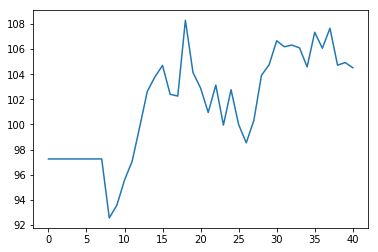

In [58]:
dict_nba['2017_Philadelphia76ers_V']['RLL_VISITOR_PTS'].plot()

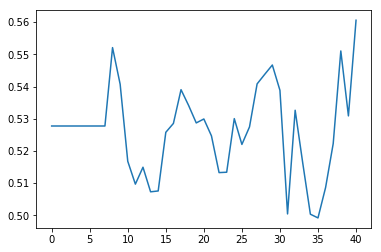

In [59]:
dict_nba['2010_Philadelphia76ers_H']['RLL_HOME_TS%'].plot()

## Joinning everithing all again:

In [96]:
df[df['VISITOR'] == 'Boston Celtics'].head()

DATE  START         VISITOR    PTS                    HOME  PTS.1  \
0   2009-10-27  7:30p  Boston Celtics   95.0     Cleveland Cavaliers   89.0   
57  2009-11-03  7:00p  Boston Celtics  105.0      Philadelphia 76ers   74.0   
61  2009-11-04  8:00p  Boston Celtics   92.0  Minnesota Timberwolves   90.0   
89  2009-11-07  7:30p  Boston Celtics   86.0           Brooklyn Nets   76.0   
136 2009-11-14  7:00p  Boston Celtics  104.0          Indiana Pacers  113.0   

      ATTEND  VISITOR_MP  VISITOR_FG  VISITOR_FGA  ...   HOME_AST%  HOME_STL%  \
0    20562.0       240.0        32.0         72.0  ...        58.6        7.9   
57   11251.0       240.0        41.0         72.0  ...        51.7        7.9   
61   19133.0       240.0        37.0         83.0  ...        56.4        5.5   
89   16119.0       240.0        31.0         69.0  ...        51.6        6.7   
136  18165.0       240.0        39.0         82.0  ...        77.5        8.7   

     HOME_BLK%  HOME_TOV%  HOME_USG%  HOME_ORtg  HOME_DRtg  DAY_OF_WEEK  \
0         17.0       13.4      100.0      100.4      107.2            2   
57         5.8       15.1      100.0       83.3      118.2            2   
61         3.1       17.5      100.0       99.9      102.1            3   
89         6.8       22.7      100.0       84.2       95.3            6   
136       10.0        8.2      100.0      123.6      113.7            6   

     LABEL  YEAR  
0        0  2010  
57       0  2010  
61       0  2010  
89       0  2010  
136      1  2010  

[5 rows x 78 columns]

In [90]:
df_ml = dict_nba['2010_ClevelandCavaliers_H'].drop(['DATE', 'START', 'HOME'], 1).set_index('index')

In [91]:
df_o = dict_nba['2010_BostonCeltics_V'].drop(['DATE', 'START', 'VISITOR'], 1).set_index('index')

In [97]:
df_ot = dict_nba['2010_Philadelphia76ers_H'].drop(['DATE', 'START', 'HOME'], 1).set_index('index')

In [92]:
df_example = df_ml.join(df_o)

In [98]:
df_example = df_ml.join(df_ot)

ValueError: columns overlap but no suffix specified: Index(['RLL_HOME_MP', 'RLL_HOME_FG', 'RLL_HOME_FGA', 'RLL_HOME_FG%',
       'RLL_HOME_3P', 'RLL_HOME_3PA', 'RLL_HOME_3P%', 'RLL_HOME_FT',
       'RLL_HOME_FTA', 'RLL_HOME_FT%', 'RLL_HOME_ORB', 'RLL_HOME_DRB',
       'RLL_HOME_TRB', 'RLL_HOME_AST', 'RLL_HOME_STL', 'RLL_HOME_BLK',
       'RLL_HOME_TOV', 'RLL_HOME_PF', 'RLL_HOME_PTS', 'RLL_HOME_+/-',
       'RLL_HOME_TS%', 'RLL_HOME_eFG%', 'RLL_HOME_3PAr', 'RLL_HOME_FTr',
       'RLL_HOME_ORB%', 'RLL_HOME_DRB%', 'RLL_HOME_TRB%', 'RLL_HOME_AST%',
       'RLL_HOME_STL%', 'RLL_HOME_BLK%', 'RLL_HOME_TOV%', 'RLL_HOME_USG%',
       'RLL_HOME_ORtg', 'RLL_HOME_DRtg'],
      dtype='object')

In [99]:
df_example

RLL_HOME_MP  RLL_HOME_FG  RLL_HOME_FGA  RLL_HOME_FG%  RLL_HOME_3P  \
index                                                                      
0       240.000000    37.809206     75.975228      0.503437     8.961052   
31      240.000000    37.809206     75.975228      0.503437     8.961052   
51      240.000000    37.809206     75.975228      0.503437     8.961052   
69      240.000000    37.809206     75.975228      0.503437     8.961052   
135     240.000000    37.809206     75.975228      0.503437     8.961052   
149     240.000000    37.809206     75.975228      0.503437     8.961052   
182     240.000000    37.809206     75.975228      0.503437     8.961052   
233     240.000000    37.809206     75.975228      0.503437     8.961052   
260     240.000000    38.875472     81.052289      0.481415     8.707940   
272     240.000000    39.643018     79.334806      0.500444     7.882169   
320     240.000000    41.667963     78.868773      0.528627     7.714094   
352     240.000000    42.151826     78.650907      0.537120     7.070799   
374     240.000000    39.977624     77.521383      0.516023     6.392853   
438     240.000000    41.355139     79.454957      0.521981     6.019364   
458     240.000000    39.955958     79.554795      0.503556     5.232745   
488     240.000000    38.221004     75.476040      0.506692     5.339645   
507     240.000000    38.407791     75.298998      0.510469     5.629964   
605     240.000000    37.164864     74.053668      0.503076     6.435001   
620     240.000000    36.421961     75.660990      0.480314     7.040647   
636     240.000000    38.441470     77.659160      0.496187     7.984854   
662     240.000000    37.105307     73.236611      0.506543     7.999435   
695     240.000000    37.633831     72.981491      0.515069     9.182217   
711     240.000000    38.521586     73.634265      0.522841     8.887199   
728     240.000000    36.971231     72.976493      0.506609     8.011922   
742     240.000000    37.276752     73.809721      0.504534     8.523510   
757     240.000000    38.281107     74.565343      0.513101     9.063191   
777     240.000000    39.877694     76.804921      0.519290     8.284521   
800     242.050410    40.101562     78.561196      0.510146     9.044236   
836     242.422273    40.119981     78.727664      0.509422     7.126604   
886     242.861577    41.043921     79.053700      0.518206     7.594302   
914     243.380554    42.813508     81.433830      0.525687     8.146823   
938     243.993653    41.942194     81.365804      0.515044     7.219287   
982     244.717943    41.983693     83.193768      0.503526     7.259057   
1006    245.573591    41.289949     82.965533      0.496368     6.615254   
1036    240.000000    40.487716     81.595037      0.494643     6.545476   
1088    240.000000    40.412135     80.947478      0.497406     6.117650   
1109    240.000000    37.097637     77.911430      0.476501     5.974954   
1123    240.000000    35.997149     77.796023      0.463523     5.970412   
1150    240.000000    36.898812     78.777882      0.468677     6.129079   
1175    240.000000    38.262033     79.294386      0.482711     5.971128   
1194    240.000000    37.454736     78.622334      0.476935     6.229269   
1233    240.000000    38.439387     79.754052      0.481999     6.417554   
1239    240.000000    38.273026     80.616249      0.474184     6.329249   
1265    240.000000    39.294033     82.899716      0.473535     6.915715   
1275    240.000000    40.845603     83.261576      0.490583     6.917757   
1278    240.000000    38.171128     81.979426      0.464871     6.393415   
1292    240.000000    36.591869     78.983828      0.461555     6.119372   

       RLL_HOME_3PA  RLL_HOME_3P%  RLL_HOME_FT  RLL_HOME_FTA  RLL_HOME_FT%  \
index                                                                        
0         19.617369      0.469812    14.332888     20.437370      0.696207   
31        19.617369      0.469812    14.332888  

In [62]:
dict_nba['2010_BostonCeltics_V'].head()

index       DATE  START         VISITOR  RLL_VISITOR_MP  RLL_VISITOR_FG  \
0      0 2009-10-27  7:30p  Boston Celtics      242.861577       36.795909   
1     57 2009-11-03  7:00p  Boston Celtics      242.861577       36.795909   
2     61 2009-11-04  8:00p  Boston Celtics      242.861577       36.795909   
3     89 2009-11-07  7:30p  Boston Celtics      242.861577       36.795909   
4    136 2009-11-14  7:00p  Boston Celtics      242.861577       36.795909   

   RLL_VISITOR_FGA  RLL_VISITOR_FG%  RLL_VISITOR_3P  RLL_VISITOR_3PA  \
0        75.654127          0.48955        7.079461        17.555201   
1        75.654127          0.48955        7.079461        17.555201   
2        75.654127          0.48955        7.079461        17.555201   
3        75.654127          0.48955        7.079461        17.555201   
4        75.654127          0.48955        7.079461        17.555201   

         ...         RLL_VISITOR_ORB%  RLL_VISITOR_DRB%  RLL_VISITOR_TRB%  \
0        ...                21.533638           77.7752         51.287761   
1        ...                21.533638           77.7752         51.287761   
2        ...                21.533638           77.7752         51.287761   
3        ...                21.533638           77.7752         51.287761   
4        ...                21.533638           77.7752         51.287761   

   RLL_VISITOR_AST%  RLL_VISITOR_STL%  RLL_VISITOR_BLK%  RLL_VISITOR_TOV%  \
0         61.479321         10.713536           8.38272          13.86602   
1         61.479321         10.713536           8.38272          13.86602   
2         61.479321         10.713536           8.38272          13.86602   
3         61.479321         10.713536           8.38272          13.86602   
4         61.479321         10.713536           8.38272          13.86602   

   RLL_VISITOR_USG%  RLL_VISITOR_ORtg  RLL_VISITOR_DRtg  
0             100.0        108.576005         97.255264  
1             100.0        108.576005         97.255264  
2             100.0        108.576005         97.255264  
3             100.0        108.576005         97.255264  
4             100.0        108.576005         97.255264  

[5 rows x 38 columns]

In [63]:
example = df.join(dict_nba['2010_BostonCeltics_V'].drop(['DATE', 'START', 'VISITOR'], 1).set_index('index'))

In [67]:
example

DATE   START                 VISITOR    PTS  \
0     2009-10-27   7:30p          Boston Celtics   95.0   
1     2009-10-27   8:30p      Washington Wizards  102.0   
2     2009-10-27  10:30p    Los Angeles Clippers   92.0   
3     2009-10-27  10:00p         Houston Rockets   87.0   
4     2009-10-28   7:00p          Indiana Pacers  109.0   
5     2009-10-28   7:30p       Charlotte Hornets   59.0   
6     2009-10-28  10:30p               Utah Jazz  105.0   
7     2009-10-28  10:30p         Houston Rockets  108.0   
8     2009-10-28  10:30p            Phoenix Suns  109.0   
9     2009-10-28   8:00p         Detroit Pistons   96.0   
10    2009-10-28   7:30p         New York Knicks   93.0   
11    2009-10-28   8:00p           Brooklyn Nets   93.0   
12    2009-10-28   8:00p        Sacramento Kings   89.0   
13    2009-10-28   7:00p      Philadelphia 76ers  106.0   
14    2009-10-28   8:00p    New Orleans Pelicans   96.0   
15    2009-10-28   7:00p     Cleveland Cavaliers   91.0   
16    2009-10-29   8:00p       San Antonio Spurs   85.0   
17    2009-10-29  10:30p          Denver Nuggets   97.0   
18    2009-10-30   7:30p      Washington Wizards   89.0   
19    2009-10-30   8:00p           Chicago Bulls   90.0   
20    2009-10-30   7:00p         New York Knicks  100.0   
21    2009-10-30   8:00p   Oklahoma City Thunder   91.0   
22    2009-10-30   8:00p              Miami Heat   96.0   
23    2009-10-30  10:30p        Dallas Mavericks   94.0   
24    2009-10-30   8:00p         Toronto Raptors  107.0   
25    2009-10-30   8:00p     Cleveland Cavaliers  104.0   
26    2009-10-30   8:00p           Orlando Magic   95.0   
27    2009-10-30   8:00p        Sacramento Kings   92.0   
28    2009-10-30   7:00p         Milwaukee Bucks   86.0   
29    2009-10-30  10:00p   Golden State Warriors  101.0   
...          ...     ...                     ...    ...   
12981 2018-12-28   7:00p         Detroit Pistons   88.0   
12982 2018-12-28  10:30p    Los Angeles Clippers  118.0   
12983 2018-12-28   8:00p     Cleveland Cavaliers   94.0   
12984 2018-12-28   8:00p           Atlanta Hawks  123.0   
12985 2018-12-28   8:00p        Dallas Mavericks  112.0   
12986 2018-12-28   7:00p         Toronto Raptors   87.0   
12987 2018-12-28   9:00p   Oklahoma City Thunder  118.0   
12988 2018-12-28   7:00p           Chicago Bulls  101.0   
12989 2018-12-29   7:30p     Cleveland Cavaliers  108.0   
12990 2018-12-29  10:30p       San Antonio Spurs  122.0   
12991 2018-12-29   8:00p          Boston Celtics  112.0   
12992 2018-12-29   5:00p           Brooklyn Nets  115.0   
12993 2018-12-29   7:00p         Houston Rockets  108.0   
12994 2018-12-29   9:00p          Denver Nuggets  122.0   
12995 2018-12-29  10:00p   Golden State Warriors  115.0   
12996 2018-12-29   8:00p         New York Knicks   97.0   
12997 2018-12-29   7:00p       Charlotte Hornets  126.0   
12998 2018-12-30   7:00p   Oklahoma City Thunder  103.0   
12999 2018-12-30   9:30p        Sacramento Kings  114.0   
13000 2018-12-30   6:00p  Minnesota Timberwolves  113.0   
13001 2018-12-30   3:30p         Detroit Pistons  107.0   
13002 2018-12-30   9:00p      Philadelphia 76ers   95.0   
13003 2018-12-30   6:00p           Chicago Bulls   89.0   
13004 2018-12-31   6:00p           Orlando Magic  100.0   
13005 2018-12-31   7:00p       Memphis Grizzlies  101.0   
13006 2018-12-31   3:00p           Atlanta Hawks  108.0   
13007 2018-12-31   8:00p  Minnesota Timberwolves  114.0   
13008 2018-12-31   8:00p        Dallas Mavericks  102.0   
13009 2018-12-31   9:00p   Golden State Warriors  132.0   
13010 2018-12-31   7:00p          Boston Celtics  111.0   

                         HOME  PTS.1   ATTEND  VISITOR_MP  VISITOR_FG  \
0         Cleveland Cavaliers   89.0  20562.0       240.0        32.0   
1            Dallas Mavericks   91.0  19871.0       240.0        39.0   
2          Los Angeles Lakers   99.0  18997.0       240.0        39.0   
3      Portland Trail Blazers   96.0  20403.0       240.0    

In [72]:
df_roll = df_roll.append(dict_nba[key].drop(['DATE', 'START', 'VISITOR'], 1))

In [73]:
df_roll.head()

index  RLL_VISITOR_MP  RLL_VISITOR_FG  RLL_VISITOR_FGA  RLL_VISITOR_FG%  \
0  11606           240.0       42.157219        83.754929         0.508481   
1  11631           240.0       42.157219        83.754929         0.508481   
2  11647           240.0       42.157219        83.754929         0.508481   
3  11661           240.0       42.157219        83.754929         0.508481   
4  11695           240.0       42.157219        83.754929         0.508481   

   RLL_VISITOR_3P  RLL_VISITOR_3PA  RLL_VISITOR_3P%  RLL_VISITOR_FT  \
0        8.983472        23.908978         0.366731       13.713012   
1        8.983472        23.908978         0.366731       13.713012   
2        8.983472        23.908978         0.366731       13.713012   
3        8.983472        23.908978         0.366731       13.713012   
4        8.983472        23.908978         0.366731       13.713012   

   RLL_VISITOR_FTA        ...         RLL_VISITOR_ORB%  RLL_VISITOR_DRB%  \
0        18.989466        ...                19.333627         73.190254   
1        18.989466        ...                19.333627         73.190254   
2        18.989466        ...                19.333627         73.190254   
3        18.989466        ...                19.333627         73.190254   
4        18.989466        ...                19.333627         73.190254   

   RLL_VISITOR_TRB%  RLL_VISITOR_AST%  RLL_VISITOR_STL%  RLL_VISITOR_BLK%  \
0          47.53786         57.599192          9.652125         11.750445   
1          47.53786         57.599192          9.652125         11.750445   
2          47.53786         57.599192          9.652125         11.750445   
3          47.53786         57.599192          9.652125         11.750445   
4          47.53786         57.599192          9.652125         11.750445   

   RLL_VISITOR_TOV%  RLL_VISITOR_USG%  RLL_VISITOR_ORtg  RLL_VISITOR_DRtg  
0         12.932568             100.0        112.462942        107.732205  
1         12.932568             100.0        112.462942        107.732205  
2         12.932568             100.0        112.462942        107.732205  
3         12.932568             100.0        112.462942        107.732205  
4         12.932568             100.0        112.462942        107.732205  

[5 rows x 35 columns]

In [77]:
df_roll = pd.DataFrame()

for key, value in dict_nba.items():
    last_letter = key.split('_')[-1]
    print(key)
    if last_letter == 'H':
        #df1.append(df4)
        df_roll = df_roll.append(dict_nba[key].drop(['DATE', 'START', 'HOME'], 1))

    if last_letter == 'V':
        
        df_roll = df_roll.append(dict_nba[key].drop(['DATE', 'START', 'VISITOR'], 1))

2010_NewYorkKnicks_H
2010_NewYorkKnicks_V
2010_MiamiHeat_H
2010_MiamiHeat_V
2010_LosAngelesClippers_H
2010_LosAngelesClippers_V
2010_SanAntonioSpurs_H
2010_SanAntonioSpurs_V
2010_MilwaukeeBucks_H
2010_MilwaukeeBucks_V
2010_PortlandTrailBlazers_H
2010_PortlandTrailBlazers_V
2010_DenverNuggets_H
2010_DenverNuggets_V
2010_AtlantaHawks_H
2010_AtlantaHawks_V
2010_GoldenStateWarriors_H
2010_GoldenStateWarriors_V
2010_OklahomaCityThunder_H
2010_OklahomaCityThunder_V
2010_BrooklynNets_H
2010_BrooklynNets_V
2010_ClevelandCavaliers_H
2010_ClevelandCavaliers_V
2010_DetroitPistons_H
2010_DetroitPistons_V
2010_HoustonRockets_H
2010_HoustonRockets_V
2010_ChicagoBulls_H
2010_ChicagoBulls_V
2010_Philadelphia76ers_H
2010_Philadelphia76ers_V
2010_MemphisGrizzlies_H
2010_MemphisGrizzlies_V
2010_PhoenixSuns_H
2010_PhoenixSuns_V
2010_LosAngelesLakers_H
2010_LosAngelesLakers_V
2010_TorontoRaptors_H
2010_TorontoRaptors_V
2010_MinnesotaTimberwolves_H
2010_MinnesotaTimberwolves_V
2010_CharlotteHornets_H
2010_C

2016_LosAngelesClippers_V
2016_SanAntonioSpurs_H
2016_SanAntonioSpurs_V
2016_MilwaukeeBucks_H
2016_MilwaukeeBucks_V
2016_PortlandTrailBlazers_H
2016_PortlandTrailBlazers_V
2016_DenverNuggets_H
2016_DenverNuggets_V
2016_AtlantaHawks_H
2016_AtlantaHawks_V
2016_GoldenStateWarriors_H
2016_GoldenStateWarriors_V
2016_OklahomaCityThunder_H
2016_OklahomaCityThunder_V
2016_BrooklynNets_H
2016_BrooklynNets_V
2016_ClevelandCavaliers_H
2016_ClevelandCavaliers_V
2016_DetroitPistons_H
2016_DetroitPistons_V
2016_HoustonRockets_H
2016_HoustonRockets_V
2016_ChicagoBulls_H
2016_ChicagoBulls_V
2016_Philadelphia76ers_H
2016_Philadelphia76ers_V
2016_MemphisGrizzlies_H
2016_MemphisGrizzlies_V
2016_PhoenixSuns_H
2016_PhoenixSuns_V
2016_LosAngelesLakers_H
2016_LosAngelesLakers_V
2016_TorontoRaptors_H
2016_TorontoRaptors_V
2016_MinnesotaTimberwolves_H
2016_MinnesotaTimberwolves_V
2016_CharlotteHornets_H
2016_CharlotteHornets_V
2016_OrlandoMagic_H
2016_OrlandoMagic_V
2016_SacramentoKings_H
2016_SacramentoKings_

In [79]:
df_roll = df_roll.set_index('index')

In [101]:
df_roll.head()

RLL_HOME_+/-  RLL_HOME_3P  RLL_HOME_3P%  RLL_HOME_3PA  RLL_HOME_3PAr  \
index                                                                         
35              NaN     7.408982      0.287937     25.767903       0.300792   
47              NaN     7.408982      0.287937     25.767903       0.300792   
64              NaN     7.408982      0.287937     25.767903       0.300792   
80              NaN     7.408982      0.287937     25.767903       0.300792   
99              NaN     7.408982      0.287937     25.767903       0.300792   

       RLL_HOME_AST  RLL_HOME_AST%  RLL_HOME_BLK  RLL_HOME_BLK%  RLL_HOME_DRB  \
index                                                                           
35        20.136834      52.694597      4.577442       7.581718     31.052814   
47        20.136834      52.694597      4.577442       7.581718     31.052814   
64        20.136834      52.694597      4.577442       7.581718     31.052814   
80        20.136834      52.694597      4.577442       7.581718     31.052814   
99        20.136834      52.694597      4.577442       7.581718     31.052814   

             ...         RLL_VISITOR_PTS  RLL_VISITOR_STL  RLL_VISITOR_STL%  \
index        ...                                                              
35           ...                     NaN              NaN               NaN   
47           ...                     NaN              NaN               NaN   
64           ...                     NaN              NaN               NaN   
80           ...                     NaN              NaN               NaN   
99           ...                     NaN              NaN               NaN   

       RLL_VISITOR_TOV  RLL_VISITOR_TOV%  RLL_VISITOR_TRB  RLL_VISITOR_TRB%  \
index                                                                         
35                 NaN               NaN              NaN               NaN   
47                 NaN               NaN              NaN               NaN   
64                 NaN               NaN              NaN               NaN   
80                 NaN               NaN              NaN               NaN   
99                 NaN               NaN              NaN               NaN   

       RLL_VISITOR_TS%  RLL_VISITOR_USG%  RLL_VISITOR_eFG%  
index                                                       
35                 NaN               NaN               NaN  
47                 NaN               NaN               NaN  
64                 NaN               NaN               NaN  
80                 NaN               NaN               NaN  
99                 NaN               NaN               NaN  

[5 rows x 68 columns]

In [102]:
df_roll.columns

Index(['RLL_HOME_+/-', 'RLL_HOME_3P', 'RLL_HOME_3P%', 'RLL_HOME_3PA',
       'RLL_HOME_3PAr', 'RLL_HOME_AST', 'RLL_HOME_AST%', 'RLL_HOME_BLK',
       'RLL_HOME_BLK%', 'RLL_HOME_DRB', 'RLL_HOME_DRB%', 'RLL_HOME_DRtg',
       'RLL_HOME_FG', 'RLL_HOME_FG%', 'RLL_HOME_FGA', 'RLL_HOME_FT',
       'RLL_HOME_FT%', 'RLL_HOME_FTA', 'RLL_HOME_FTr', 'RLL_HOME_MP',
       'RLL_HOME_ORB', 'RLL_HOME_ORB%', 'RLL_HOME_ORtg', 'RLL_HOME_PF',
       'RLL_HOME_PTS', 'RLL_HOME_STL', 'RLL_HOME_STL%', 'RLL_HOME_TOV',
       'RLL_HOME_TOV%', 'RLL_HOME_TRB', 'RLL_HOME_TRB%', 'RLL_HOME_TS%',
       'RLL_HOME_USG%', 'RLL_HOME_eFG%', 'RLL_VISITOR_+/-', 'RLL_VISITOR_3P',
       'RLL_VISITOR_3P%', 'RLL_VISITOR_3PA', 'RLL_VISITOR_3PAr',
       'RLL_VISITOR_AST', 'RLL_VISITOR_AST%', 'RLL_VISITOR_BLK',
       'RLL_VISITOR_BLK%', 'RLL_VISITOR_DRB', 'RLL_VISITOR_DRB%',
       'RLL_VISITOR_DRtg', 'RLL_VISITOR_FG', 'RLL_VISITOR_FG%',
       'RLL_VISITOR_FGA', 'RLL_VISITOR_FT', 'RLL_VISITOR_FT%',
       'RLL_VISITOR_FTA', 

In [105]:
df.columns

Index(['DATE', 'START', 'VISITOR', 'PTS', 'HOME', 'PTS.1', 'ATTEND',
       'VISITOR_MP', 'VISITOR_FG', 'VISITOR_FGA', 'VISITOR_FG%', 'VISITOR_3P',
       'VISITOR_3PA', 'VISITOR_3P%', 'VISITOR_FT', 'VISITOR_FTA',
       'VISITOR_FT%', 'VISITOR_ORB', 'VISITOR_DRB', 'VISITOR_TRB',
       'VISITOR_AST', 'VISITOR_STL', 'VISITOR_BLK', 'VISITOR_TOV',
       'VISITOR_PF', 'VISITOR_PTS', 'VISITOR_+/-', 'VISITOR_TS%',
       'VISITOR_eFG%', 'VISITOR_3PAr', 'VISITOR_FTr', 'VISITOR_ORB%',
       'VISITOR_DRB%', 'VISITOR_TRB%', 'VISITOR_AST%', 'VISITOR_STL%',
       'VISITOR_BLK%', 'VISITOR_TOV%', 'VISITOR_USG%', 'VISITOR_ORtg',
       'VISITOR_DRtg', 'HOME_MP', 'HOME_FG', 'HOME_FGA', 'HOME_FG%', 'HOME_3P',
       'HOME_3PA', 'HOME_3P%', 'HOME_FT', 'HOME_FTA', 'HOME_FT%', 'HOME_ORB',
       'HOME_DRB', 'HOME_TRB', 'HOME_AST', 'HOME_STL', 'HOME_BLK', 'HOME_TOV',
       'HOME_PF', 'HOME_PTS', 'HOME_+/-', 'HOME_TS%', 'HOME_eFG%', 'HOME_3PAr',
       'HOME_FTr', 'HOME_ORB%', 'HOME_DRB%', 'HOME_TRB%',

In [130]:
df_ml = pd.DataFrame(columns=df_roll.columns)


df_ml['DATE'] = df['DATE']
df_ml['START'] = df['START']
df_ml['VISITOR'] = df['VISITOR']
df_ml['PTS'] = df['PTS']
df_ml['HOME'] = df['HOME']
df_ml['PTS.1'] = df['PTS.1']
df_ml['ATTEND'] = df['ATTEND']
df_ml['DAY_OF_WEEK'] = df['DAY_OF_WEEK']
df_ml['LABEL'] = df['LABEL']
df_ml['YEAR'] = df['YEAR']



In [131]:
df_ml.head()

RLL_HOME_+/- RLL_HOME_3P RLL_HOME_3P% RLL_HOME_3PA RLL_HOME_3PAr  \
0          NaN         NaN          NaN          NaN           NaN   
1          NaN         NaN          NaN          NaN           NaN   
2          NaN         NaN          NaN          NaN           NaN   
3          NaN         NaN          NaN          NaN           NaN   
4          NaN         NaN          NaN          NaN           NaN   

  RLL_HOME_AST RLL_HOME_AST% RLL_HOME_BLK RLL_HOME_BLK% RLL_HOME_DRB  ...   \
0          NaN           NaN          NaN           NaN          NaN  ...    
1          NaN           NaN          NaN           NaN          NaN  ...    
2          NaN           NaN          NaN           NaN          NaN  ...    
3          NaN           NaN          NaN           NaN          NaN  ...    
4          NaN           NaN          NaN           NaN          NaN  ...    

        DATE   START               VISITOR    PTS                    HOME  \
0 2009-10-27   7:30p        Boston Celtics   95.0     Cleveland Cavaliers   
1 2009-10-27   8:30p    Washington Wizards  102.0        Dallas Mavericks   
2 2009-10-27  10:30p  Los Angeles Clippers   92.0      Los Angeles Lakers   
3 2009-10-27  10:00p       Houston Rockets   87.0  Portland Trail Blazers   
4 2009-10-28   7:00p        Indiana Pacers  109.0           Atlanta Hawks   

   PTS.1   ATTEND DAY_OF_WEEK LABEL  YEAR  
0   89.0  20562.0           2     0  2010  
1   91.0  19871.0           2     0  2010  
2   99.0  18997.0           2     1  2010  
3   96.0  20403.0           2     1  2010  
4  120.0  17998.0           3     1  2010  

[5 rows x 78 columns]

In [132]:
## Filling the df:

In [152]:
df_ml.iloc[1230]

RLL_HOME_+/-                        NaN
RLL_HOME_3P                         NaN
RLL_HOME_3P%                        NaN
RLL_HOME_3PA                        NaN
RLL_HOME_3PAr                       NaN
RLL_HOME_AST                        NaN
RLL_HOME_AST%                       NaN
RLL_HOME_BLK                        NaN
RLL_HOME_BLK%                       NaN
RLL_HOME_DRB                        NaN
RLL_HOME_DRB%                       NaN
RLL_HOME_DRtg                       NaN
RLL_HOME_FG                         NaN
RLL_HOME_FG%                        NaN
RLL_HOME_FGA                    82.4236
RLL_HOME_FT                         NaN
RLL_HOME_FT%                        NaN
RLL_HOME_FTA                        NaN
RLL_HOME_FTr                        NaN
RLL_HOME_MP                         NaN
RLL_HOME_ORB                        NaN
RLL_HOME_ORB%                       NaN
RLL_HOME_ORtg                       NaN
RLL_HOME_PF                         NaN
RLL_HOME_PTS                        NaN


In [160]:
for i in range(len(df_ml)):
    
    
    print(i)
    if i >1229:
        try:
            home_key = str(df_ml.loc[i]['YEAR']) + '_' + df_ml.loc[i]['HOME'].replace(' ', '') + '_H' 

            visitor_key = str(df_ml.loc[i]['YEAR']) + '_' + df_ml.loc[i]['VISITOR'].replace(' ', '') + '_V' 
            print('HOME',home_key)
            print('VISITOR',visitor_key)


            #print(dict_nba[home_key][dict_nba[home_key]['index']==i])

            # HOME COLS:
            df_ml['RLL_HOME_MP'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_MP'].iloc[0]
            df_ml['RLL_HOME_FG'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_FG'].iloc[0]
            df_ml['RLL_HOME_FGA'] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_FGA'].iloc[0]
            df_ml['RLL_HOME_FG%'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_FG%'].iloc[0]
            df_ml['RLL_HOME_3P'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_3P'].iloc[0]
            df_ml['RLL_HOME_3PA'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_3PA'].iloc[0]
            df_ml['RLL_HOME_3P%'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_3P%'].iloc[0]
            df_ml['RLL_HOME_FT'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_FT'].iloc[0]
            df_ml['RLL_HOME_FTA'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_FTA'].iloc[0]
            df_ml['RLL_HOME_FT%'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_FT%'].iloc[0]
            df_ml['RLL_HOME_ORB'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_ORB'].iloc[0]
            df_ml['RLL_HOME_DRB'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_DRB'].iloc[0]
            df_ml['RLL_HOME_TRB'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_TRB'].iloc[0]
            df_ml['RLL_HOME_AST'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_AST'].iloc[0]
            df_ml['RLL_HOME_STL'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_STL'].iloc[0]
            df_ml['RLL_HOME_BLK'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_BLK'].iloc[0]
            df_ml['RLL_HOME_TOV'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_TOV'].iloc[0]
            df_ml['RLL_HOME_PF'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_PF'].iloc[0]
            df_ml['RLL_HOME_PTS'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_PTS'].iloc[0]

            df_ml['RLL_HOME_+/-'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_+/-'].iloc[0]
            df_ml['RLL_HOME_TS%'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_TS%'].iloc[0]
            df_ml['RLL_HOME_eFG%'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_eFG%'].iloc[0]
            df_ml['RLL_HOME_3PAr'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_3PAr'].iloc[0]

            df_ml['RLL_HOME_FTr'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_FTr'].iloc[0]
            df_ml['RLL_HOME_ORB%'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_ORB%'].iloc[0]
            df_ml['RLL_HOME_DRB%'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_DRB%'].iloc[0]

            df_ml['RLL_HOME_TRB%'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_TRB%'].iloc[0]
            df_ml['RLL_HOME_AST%'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_AST%'].iloc[0]
            df_ml['RLL_HOME_STL%'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_STL%'].iloc[0]

            df_ml['RLL_HOME_BLK%'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_BLK%'].iloc[0]
            df_ml['RLL_HOME_TOV%'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_TOV%'].iloc[0]
            df_ml['RLL_HOME_USG%'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_USG%'].iloc[0]
            df_ml['RLL_HOME_ORtg'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_ORtg'].iloc[0]
            df_ml['RLL_HOME_DRtg'][i] = dict_nba[home_key][dict_nba[home_key]['index']==i]['RLL_HOME_DRtg'].iloc[0]


            # VISITOR COLS:
            df_ml['RLL_VISITOR_MP'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_MP'].iloc[0]
            df_ml['RLL_VISITOR_FG'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_FG'].iloc[0]
            df_ml['RLL_VISITOR_FGA'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_FGA'].iloc[0]
            df_ml['RLL_VISITOR_FG%'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_FG%'].iloc[0]
            df_ml['RLL_VISITOR_3P'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_3P'].iloc[0]
            df_ml['RLL_VISITOR_3PA'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_3PA'].iloc[0]
            df_ml['RLL_VISITOR_3P%'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_3P%'].iloc[0]
            df_ml['RLL_VISITOR_FT'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_FT'].iloc[0]
            df_ml['RLL_VISITOR_FTA'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_FTA'].iloc[0]
            df_ml['RLL_VISITOR_FT%'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_FT%'].iloc[0]
            df_ml['RLL_VISITOR_ORB'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_ORB'].iloc[0]
            df_ml['RLL_VISITOR_DRB'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_DRB'].iloc[0]
            df_ml['RLL_VISITOR_TRB'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_TRB'].iloc[0]
            df_ml['RLL_VISITOR_AST'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_AST'].iloc[0]
            df_ml['RLL_VISITOR_STL'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_STL'].iloc[0]
            df_ml['RLL_VISITOR_BLK'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_BLK'].iloc[0]
            df_ml['RLL_VISITOR_TOV'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_TOV'].iloc[0]
            df_ml['RLL_VISITOR_PF'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_PF'].iloc[0]
            df_ml['RLL_VISITOR_PTS'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_PTS'].iloc[0]

            df_ml['RLL_VISITOR_+/-'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_+/-'].iloc[0]
            df_ml['RLL_VISITOR_TS%'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_TS%'].iloc[0]
            df_ml['RLL_VISITOR_eFG%'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_eFG%'].iloc[0]
            df_ml['RLL_VISITOR_3PAr'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_3PAr'].iloc[0]

            df_ml['RLL_VISITOR_FTr'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_FTr'].iloc[0]
            df_ml['RLL_VISITOR_ORB%'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_ORB%'].iloc[0]
            df_ml['RLL_VISITOR_DRB%'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_DRB%'].iloc[0]

            df_ml['RLL_VISITOR_TRB%'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_TRB%'].iloc[0]
            df_ml['RLL_VISITOR_AST%'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_AST%'].iloc[0]
            df_ml['RLL_VISITOR_STL%'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_STL%'].iloc[0]

            df_ml['RLL_VISITOR_BLK%'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_BLK%'].iloc[0]
            df_ml['RLL_VISITOR_TOV%'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_TOV%'].iloc[0]
            df_ml['RLL_VISITOR_USG%'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_USG%'].iloc[0]
            df_ml['RLL_VISITOR_ORtg'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_ORtg'].iloc[0]
            df_ml['RLL_VISITOR_DRtg'][i] = dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_DRtg'].iloc[0]
            #############

            print('################')
        except:
            print('error')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

/home/mikel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mikel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mikel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mikel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

################
1234
HOME 2010_DenverNuggets_H
VISITOR 2010_UtahJazz_V
################
1235
HOME 2010_DallasMavericks_H
VISITOR 2010_SanAntonioSpurs_V
################
1236
HOME 2010_LosAngelesLakers_H
VISITOR 2010_OklahomaCityThunder_V
################
1237
HOME 2010_OrlandoMagic_H
VISITOR 2010_CharlotteHornets_V
################
1238
HOME 2010_PhoenixSuns_H
VISITOR 2010_PortlandTrailBlazers_V
################
1239
HOME 2010_ClevelandCavaliers_H
VISITOR 2010_ChicagoBulls_V
################
1240
HOME 2010_DenverNuggets_H
VISITOR 2010_UtahJazz_V
################
1241
HOME 2010_AtlantaHawks_H
VISITOR 2010_MilwaukeeBucks_V
################
1242
HOME 2010_BostonCeltics_H
VISITOR 2010_MiamiHeat_V
################
1243
HOME 2010_LosAngelesLakers_H
VISITOR 2010_OklahomaCityThunder_V
################
1244
HOME 2010_PhoenixSuns_H
VISITOR 2010_PortlandTrailBlazers_V
################
1245
HOME 2010_DallasMavericks_H
VISITOR 2010_SanAntonioSpurs_V
################
1246
HOME 2010_OrlandoMagic_H
V

################
1338
HOME 2011_BrooklynNets_H
VISITOR 2011_SacramentoKings_V
################
1339
HOME 2011_NewOrleansPelicans_H
VISITOR 2011_DenverNuggets_V
################
1340
HOME 2011_Philadelphia76ers_H
VISITOR 2011_AtlantaHawks_V
################
1341
HOME 2011_PhoenixSuns_H
VISITOR 2011_LosAngelesLakers_V
################
1342
HOME 2011_TorontoRaptors_H
VISITOR 2011_ClevelandCavaliers_V
################
1343
HOME 2011_AtlantaHawks_H
VISITOR 2011_WashingtonWizards_V
################
1344
HOME 2011_ChicagoBulls_H
VISITOR 2011_DetroitPistons_V
################
1345
HOME 2011_ClevelandCavaliers_H
VISITOR 2011_SacramentoKings_V
################
1346
HOME 2011_HoustonRockets_H
VISITOR 2011_DenverNuggets_V
################
1347
HOME 2011_IndianaPacers_H
VISITOR 2011_Philadelphia76ers_V
################
1348
HOME 2011_MemphisGrizzlies_H
VISITOR 2011_MinnesotaTimberwolves_V
################
1349
HOME 2011_MilwaukeeBucks_H
VISITOR 2011_CharlotteHornets_V
################
1350
HOME 201

################
1440
HOME 2011_WashingtonWizards_H
VISITOR 2011_CharlotteHornets_V
################
1441
HOME 2011_CharlotteHornets_H
VISITOR 2011_UtahJazz_V
################
1442
HOME 2011_ChicagoBulls_H
VISITOR 2011_WashingtonWizards_V
################
1443
HOME 2011_ClevelandCavaliers_H
VISITOR 2011_IndianaPacers_V
################
1444
HOME 2011_MemphisGrizzlies_H
VISITOR 2011_BostonCeltics_V
################
1445
HOME 2011_MiamiHeat_H
VISITOR 2011_TorontoRaptors_V
################
1446
HOME 2011_MilwaukeeBucks_H
VISITOR 2011_GoldenStateWarriors_V
################
1447
HOME 2011_BrooklynNets_H
VISITOR 2011_OrlandoMagic_V
################
1448
HOME 2011_NewOrleansPelicans_H
VISITOR 2011_PortlandTrailBlazers_V
################
1449
HOME 2011_SanAntonioSpurs_H
VISITOR 2011_Philadelphia76ers_V
################
1450
HOME 2011_AtlantaHawks_H
VISITOR 2011_MinnesotaTimberwolves_V
################
1451
HOME 2011_LosAngelesLakers_H
VISITOR 2011_PhoenixSuns_V
################
1452
HOME 2011_

################
1542
HOME 2011_PortlandTrailBlazers_H
VISITOR 2011_NewOrleansPelicans_V
################
1543
HOME 2011_SanAntonioSpurs_H
VISITOR 2011_DallasMavericks_V
################
1544
HOME 2011_UtahJazz_H
VISITOR 2011_LosAngelesLakers_V
################
1545
HOME 2011_ClevelandCavaliers_H
VISITOR 2011_MemphisGrizzlies_V
################
1546
HOME 2011_DallasMavericks_H
VISITOR 2011_MiamiHeat_V
################
1547
HOME 2011_MilwaukeeBucks_H
VISITOR 2011_CharlotteHornets_V
################
1548
HOME 2011_MinnesotaTimberwolves_H
VISITOR 2011_GoldenStateWarriors_V
################
1549
HOME 2011_NewYorkKnicks_H
VISITOR 2011_AtlantaHawks_V
################
1550
HOME 2011_Philadelphia76ers_H
VISITOR 2011_BrooklynNets_V
################
1551
HOME 2011_SacramentoKings_H
VISITOR 2011_ChicagoBulls_V
################
1552
HOME 2011_WashingtonWizards_H
VISITOR 2011_OrlandoMagic_V
################
1553
HOME 2011_DenverNuggets_H
VISITOR 2011_PhoenixSuns_V
################
1554
HOME 2011_De

################
1644
HOME 2011_MilwaukeeBucks_H
VISITOR 2011_HoustonRockets_V
################
1645
HOME 2011_MinnesotaTimberwolves_H
VISITOR 2011_DetroitPistons_V
################
1646
HOME 2011_NewOrleansPelicans_H
VISITOR 2011_OklahomaCityThunder_V
################
1647
HOME 2011_PhoenixSuns_H
VISITOR 2011_PortlandTrailBlazers_V
################
1648
HOME 2011_SanAntonioSpurs_H
VISITOR 2011_AtlantaHawks_V
################
1649
HOME 2011_TorontoRaptors_H
VISITOR 2011_DenverNuggets_V
################
1650
HOME 2011_UtahJazz_H
VISITOR 2011_OrlandoMagic_V
################
1651
HOME 2011_WashingtonWizards_H
VISITOR 2011_NewYorkKnicks_V
################
1652
HOME 2011_AtlantaHawks_H
VISITOR 2011_IndianaPacers_V
################
1653
HOME 2011_CharlotteHornets_H
VISITOR 2011_BostonCeltics_V
################
1654
HOME 2011_ChicagoBulls_H
VISITOR 2011_MinnesotaTimberwolves_V
################
1655
HOME 2011_DallasMavericks_H
VISITOR 2011_UtahJazz_V
################
1656
HOME 2011_DetroitPist

################
1746
HOME 2011_NewYorkKnicks_H
VISITOR 2011_ChicagoBulls_V
################
1747
HOME 2011_OklahomaCityThunder_H
VISITOR 2011_DenverNuggets_V
################
1748
HOME 2011_OrlandoMagic_H
VISITOR 2011_BostonCeltics_V
################
1749
HOME 2011_ClevelandCavaliers_H
VISITOR 2011_MinnesotaTimberwolves_V
################
1750
HOME 2011_DenverNuggets_H
VISITOR 2011_Philadelphia76ers_V
################
1751
HOME 2011_DetroitPistons_H
VISITOR 2011_ChicagoBulls_V
################
1752
HOME 2011_IndianaPacers_H
VISITOR 2011_MemphisGrizzlies_V
################
1753
HOME 2011_LosAngelesClippers_H
VISITOR 2011_PhoenixSuns_V
################
1754
HOME 2011_NewOrleansPelicans_H
VISITOR 2011_AtlantaHawks_V
################
1755
HOME 2011_SanAntonioSpurs_H
VISITOR 2011_WashingtonWizards_V
################
1756
HOME 2011_CharlotteHornets_H
VISITOR 2011_DetroitPistons_V
################
1757
HOME 2011_GoldenStateWarriors_H
VISITOR 2011_Philadelphia76ers_V
################
1758
HOM

################
1848
HOME 2011_CharlotteHornets_H
VISITOR 2011_WashingtonWizards_V
################
1849
HOME 2011_ChicagoBulls_H
VISITOR 2011_BostonCeltics_V
################
1850
HOME 2011_DallasMavericks_H
VISITOR 2011_OrlandoMagic_V
################
1851
HOME 2011_DetroitPistons_H
VISITOR 2011_Philadelphia76ers_V
################
1852
HOME 2011_HoustonRockets_H
VISITOR 2011_UtahJazz_V
################
1853
HOME 2011_BrooklynNets_H
VISITOR 2011_MilwaukeeBucks_V
################
1854
HOME 2011_OklahomaCityThunder_H
VISITOR 2011_MemphisGrizzlies_V
################
1855
HOME 2011_DenverNuggets_H
VISITOR 2011_NewOrleansPelicans_V
################
1856
HOME 2011_LosAngelesClippers_H
VISITOR 2011_GoldenStateWarriors_V
################
1857
HOME 2011_LosAngelesLakers_H
VISITOR 2011_NewYorkKnicks_V
################
1858
HOME 2011_PhoenixSuns_H
VISITOR 2011_ClevelandCavaliers_V
################
1859
HOME 2011_PortlandTrailBlazers_H
VISITOR 2011_MiamiHeat_V
################
1860
HOME 2011_Sa

################
1950
HOME 2011_ChicagoBulls_H
VISITOR 2011_ClevelandCavaliers_V
################
1951
HOME 2011_DetroitPistons_H
VISITOR 2011_PhoenixSuns_V
################
1952
HOME 2011_HoustonRockets_H
VISITOR 2011_OrlandoMagic_V
################
1953
HOME 2011_LosAngelesClippers_H
VISITOR 2011_GoldenStateWarriors_V
################
1954
HOME 2011_MiamiHeat_H
VISITOR 2011_TorontoRaptors_V
################
1955
HOME 2011_MilwaukeeBucks_H
VISITOR 2011_MemphisGrizzlies_V
################
1956
HOME 2011_BrooklynNets_H
VISITOR 2011_DallasMavericks_V
################
1957
HOME 2011_NewOrleansPelicans_H
VISITOR 2011_SanAntonioSpurs_V
################
1958
HOME 2011_OklahomaCityThunder_H
VISITOR 2011_NewYorkKnicks_V
################
1959
HOME 2011_Philadelphia76ers_H
VISITOR 2011_UtahJazz_V
################
1960
HOME 2011_PortlandTrailBlazers_H
VISITOR 2011_IndianaPacers_V
################
1961
HOME 2011_WashingtonWizards_H
VISITOR 2011_BostonCeltics_V
################
1962
HOME 2011_Denve

################
2052
HOME 2011_SacramentoKings_H
VISITOR 2011_SanAntonioSpurs_V
################
2053
HOME 2011_TorontoRaptors_H
VISITOR 2011_MinnesotaTimberwolves_V
################
2054
HOME 2011_WashingtonWizards_H
VISITOR 2011_OrlandoMagic_V
################
2055
HOME 2011_CharlotteHornets_H
VISITOR 2011_DallasMavericks_V
################
2056
HOME 2011_ClevelandCavaliers_H
VISITOR 2011_PortlandTrailBlazers_V
################
2057
HOME 2011_GoldenStateWarriors_H
VISITOR 2011_ChicagoBulls_V
################
2058
HOME 2011_HoustonRockets_H
VISITOR 2011_MemphisGrizzlies_V
################
2059
HOME 2011_MilwaukeeBucks_H
VISITOR 2011_DetroitPistons_V
################
2060
HOME 2011_MinnesotaTimberwolves_H
VISITOR 2011_DenverNuggets_V
################
2061
HOME 2011_NewOrleansPelicans_H
VISITOR 2011_LosAngelesLakers_V
################
2062
HOME 2011_UtahJazz_H
VISITOR 2011_OklahomaCityThunder_V
################
2063
HOME 2011_WashingtonWizards_H
VISITOR 2011_AtlantaHawks_V
############

################
2154
HOME 2011_MilwaukeeBucks_H
VISITOR 2011_MinnesotaTimberwolves_V
################
2155
HOME 2011_OklahomaCityThunder_H
VISITOR 2011_LosAngelesClippers_V
################
2156
HOME 2011_WashingtonWizards_H
VISITOR 2011_IndianaPacers_V
################
2157
HOME 2011_ClevelandCavaliers_H
VISITOR 2011_HoustonRockets_V
################
2158
HOME 2011_DallasMavericks_H
VISITOR 2011_UtahJazz_V
################
2159
HOME 2011_IndianaPacers_H
VISITOR 2011_DetroitPistons_V
################
2160
HOME 2011_MinnesotaTimberwolves_H
VISITOR 2011_MemphisGrizzlies_V
################
2161
HOME 2011_NewOrleansPelicans_H
VISITOR 2011_LosAngelesClippers_V
################
2162
HOME 2011_NewYorkKnicks_H
VISITOR 2011_MilwaukeeBucks_V
################
2163
HOME 2011_OrlandoMagic_H
VISITOR 2011_SacramentoKings_V
################
2164
HOME 2011_Philadelphia76ers_H
VISITOR 2011_WashingtonWizards_V
################
2165
HOME 2011_PhoenixSuns_H
VISITOR 2011_AtlantaHawks_V
################
216

################
2256
HOME 2011_SacramentoKings_H
VISITOR 2011_HoustonRockets_V
################
2257
HOME 2011_AtlantaHawks_H
VISITOR 2011_LosAngelesLakers_V
################
2258
HOME 2011_ClevelandCavaliers_H
VISITOR 2011_GoldenStateWarriors_V
################
2259
HOME 2011_IndianaPacers_H
VISITOR 2011_Philadelphia76ers_V
################
2260
HOME 2011_MiamiHeat_H
VISITOR 2011_PortlandTrailBlazers_V
################
2261
HOME 2011_PhoenixSuns_H
VISITOR 2011_HoustonRockets_V
################
2262
HOME 2011_WashingtonWizards_H
VISITOR 2011_MilwaukeeBucks_V
################
2263
HOME 2011_BostonCeltics_H
VISITOR 2011_LosAngelesClippers_V
################
2264
HOME 2011_CharlotteHornets_H
VISITOR 2011_ChicagoBulls_V
################
2265
HOME 2011_MemphisGrizzlies_H
VISITOR 2011_NewYorkKnicks_V
################
2266
HOME 2011_MilwaukeeBucks_H
VISITOR 2011_ClevelandCavaliers_V
################
2267
HOME 2011_MinnesotaTimberwolves_H
VISITOR 2011_IndianaPacers_V
################
2268
HOM

################
2358
HOME 2011_MemphisGrizzlies_H
VISITOR 2011_UtahJazz_V
################
2359
HOME 2011_BrooklynNets_H
VISITOR 2011_IndianaPacers_V
################
2360
HOME 2011_NewYorkKnicks_H
VISITOR 2011_BostonCeltics_V
################
2361
HOME 2011_SanAntonioSpurs_H
VISITOR 2011_GoldenStateWarriors_V
################
2362
HOME 2011_AtlantaHawks_H
VISITOR 2011_ChicagoBulls_V
################
2363
HOME 2011_LosAngelesLakers_H
VISITOR 2011_PhoenixSuns_V
################
2364
HOME 2011_PortlandTrailBlazers_H
VISITOR 2011_WashingtonWizards_V
################
2365
HOME 2011_BostonCeltics_H
VISITOR 2011_MemphisGrizzlies_V
################
2366
HOME 2011_CharlotteHornets_H
VISITOR 2011_IndianaPacers_V
################
2367
HOME 2011_ClevelandCavaliers_H
VISITOR 2011_BrooklynNets_V
################
2368
HOME 2011_DenverNuggets_H
VISITOR 2011_SanAntonioSpurs_V
################
2369
HOME 2011_DetroitPistons_H
VISITOR 2011_MiamiHeat_V
################
2370
HOME 2011_HoustonRockets_H
VIS

################
2460
HOME 2011_TorontoRaptors_H
VISITOR 2011_OrlandoMagic_V
################
2461
HOME 2011_AtlantaHawks_H
VISITOR 2011_SanAntonioSpurs_V
################
2462
HOME 2011_BostonCeltics_H
VISITOR 2011_Philadelphia76ers_V
################
2463
HOME 2011_ChicagoBulls_H
VISITOR 2011_PhoenixSuns_V
################
2464
HOME 2011_ClevelandCavaliers_H
VISITOR 2011_CharlotteHornets_V
################
2465
HOME 2011_DenverNuggets_H
VISITOR 2011_OklahomaCityThunder_V
################
2466
HOME 2011_HoustonRockets_H
VISITOR 2011_SacramentoKings_V
################
2467
HOME 2011_LosAngelesLakers_H
VISITOR 2011_UtahJazz_V
################
2468
HOME 2011_MemphisGrizzlies_H
VISITOR 2011_LosAngelesClippers_V
################
2469
HOME 2011_BrooklynNets_H
VISITOR 2011_MinnesotaTimberwolves_V
################
2470
HOME 2011_NewYorkKnicks_H
VISITOR 2011_TorontoRaptors_V
################
2471
HOME 2011_OrlandoMagic_H
VISITOR 2011_MilwaukeeBucks_V
################
2472
HOME 2011_PortlandTra

################
2563
HOME 2011_AtlantaHawks_H
VISITOR 2011_OrlandoMagic_V
################
2564
HOME 2011_NewOrleansPelicans_H
VISITOR 2011_LosAngelesLakers_V
################
2565
HOME 2011_NewYorkKnicks_H
VISITOR 2011_BostonCeltics_V
################
2566
HOME 2011_DenverNuggets_H
VISITOR 2011_OklahomaCityThunder_V
################
2567
HOME 2011_IndianaPacers_H
VISITOR 2011_ChicagoBulls_V
################
2568
HOME 2011_MemphisGrizzlies_H
VISITOR 2011_SanAntonioSpurs_V
################
2569
HOME 2011_PortlandTrailBlazers_H
VISITOR 2011_DallasMavericks_V
################
2570
HOME 2011_AtlantaHawks_H
VISITOR 2011_OrlandoMagic_V
################
2571
HOME 2011_NewOrleansPelicans_H
VISITOR 2011_LosAngelesLakers_V
################
2572
HOME 2011_NewYorkKnicks_H
VISITOR 2011_BostonCeltics_V
################
2573
HOME 2011_Philadelphia76ers_H
VISITOR 2011_MiamiHeat_V
################
2574
HOME 2011_DallasMavericks_H
VISITOR 2011_PortlandTrailBlazers_V
################
2575
HOME 2011_Denv

################
2666
HOME 2012_DallasMavericks_H
VISITOR 2012_TorontoRaptors_V
################
2667
HOME 2012_IndianaPacers_H
VISITOR 2012_ClevelandCavaliers_V
################
2668
HOME 2012_LosAngelesClippers_H
VISITOR 2012_ChicagoBulls_V
################
2669
HOME 2012_MemphisGrizzlies_H
VISITOR 2012_HoustonRockets_V
################
2670
HOME 2012_MilwaukeeBucks_H
VISITOR 2012_WashingtonWizards_V
################
2671
HOME 2012_MinnesotaTimberwolves_H
VISITOR 2012_MiamiHeat_V
################
2672
HOME 2012_NewOrleansPelicans_H
VISITOR 2012_PhoenixSuns_V
################
2673
HOME 2012_UtahJazz_H
VISITOR 2012_Philadelphia76ers_V
################
2674
HOME 2012_DetroitPistons_H
VISITOR 2012_IndianaPacers_V
################
2675
HOME 2012_GoldenStateWarriors_H
VISITOR 2012_Philadelphia76ers_V
################
2676
HOME 2012_HoustonRockets_H
VISITOR 2012_AtlantaHawks_V
################
2677
HOME 2012_LosAngelesLakers_H
VISITOR 2012_DenverNuggets_V
################
2678
HOME 2012_Okl

################
2768
HOME 2012_ChicagoBulls_H
VISITOR 2012_WashingtonWizards_V
################
2769
HOME 2012_DenverNuggets_H
VISITOR 2012_BrooklynNets_V
################
2770
HOME 2012_IndianaPacers_H
VISITOR 2012_AtlantaHawks_V
################
2771
HOME 2012_LosAngelesClippers_H
VISITOR 2012_MiamiHeat_V
################
2772
HOME 2012_NewOrleansPelicans_H
VISITOR 2012_OklahomaCityThunder_V
################
2773
HOME 2012_NewYorkKnicks_H
VISITOR 2012_Philadelphia76ers_V
################
2774
HOME 2012_PortlandTrailBlazers_H
VISITOR 2012_OrlandoMagic_V
################
2775
HOME 2012_SanAntonioSpurs_H
VISITOR 2012_HoustonRockets_V
################
2776
HOME 2012_TorontoRaptors_H
VISITOR 2012_SacramentoKings_V
################
2777
HOME 2012_UtahJazz_H
VISITOR 2012_LosAngelesLakers_V
################
2778
HOME 2012_AtlantaHawks_H
VISITOR 2012_CharlotteHornets_V
################
2779
HOME 2012_GoldenStateWarriors_H
VISITOR 2012_OrlandoMagic_V
################
2780
HOME 2012_MemphisGri

################
2870
HOME 2012_MilwaukeeBucks_H
VISITOR 2012_AtlantaHawks_V
################
2871
HOME 2012_MinnesotaTimberwolves_H
VISITOR 2012_HoustonRockets_V
################
2872
HOME 2012_NewOrleansPelicans_H
VISITOR 2012_SanAntonioSpurs_V
################
2873
HOME 2012_OklahomaCityThunder_H
VISITOR 2012_DetroitPistons_V
################
2874
HOME 2012_Philadelphia76ers_H
VISITOR 2012_WashingtonWizards_V
################
2875
HOME 2012_PortlandTrailBlazers_H
VISITOR 2012_SacramentoKings_V
################
2876
HOME 2012_CharlotteHornets_H
VISITOR 2012_NewYorkKnicks_V
################
2877
HOME 2012_IndianaPacers_H
VISITOR 2012_OrlandoMagic_V
################
2878
HOME 2012_MiamiHeat_H
VISITOR 2012_ClevelandCavaliers_V
################
2879
HOME 2012_PhoenixSuns_H
VISITOR 2012_TorontoRaptors_V
################
2880
HOME 2012_PortlandTrailBlazers_H
VISITOR 2012_MemphisGrizzlies_V
################
2881
HOME 2012_ChicagoBulls_H
VISITOR 2012_IndianaPacers_V
################
2882
HOM

################
2972
HOME 2012_NewYorkKnicks_H
VISITOR 2012_BrooklynNets_V
################
2973
HOME 2012_PhoenixSuns_H
VISITOR 2012_CharlotteHornets_V
################
2974
HOME 2012_PortlandTrailBlazers_H
VISITOR 2012_DenverNuggets_V
################
2975
HOME 2012_SacramentoKings_H
VISITOR 2012_GoldenStateWarriors_V
################
2976
HOME 2012_SanAntonioSpurs_H
VISITOR 2012_OklahomaCityThunder_V
################
2977
HOME 2012_UtahJazz_H
VISITOR 2012_LosAngelesLakers_V
################
2978
HOME 2012_WashingtonWizards_H
VISITOR 2012_LosAngelesClippers_V
################
2979
HOME 2012_BostonCeltics_H
VISITOR 2012_MemphisGrizzlies_V
################
2980
HOME 2012_MiamiHeat_H
VISITOR 2012_TorontoRaptors_V
################
2981
HOME 2012_AtlantaHawks_H
VISITOR 2012_PhoenixSuns_V
################
2982
HOME 2012_DenverNuggets_H
VISITOR 2012_HoustonRockets_V
################
2983
HOME 2012_MemphisGrizzlies_H
VISITOR 2012_SanAntonioSpurs_V
################
2984
HOME 2012_BrooklynNet

################
3074
HOME 2012_NewYorkKnicks_H
VISITOR 2012_NewOrleansPelicans_V
################
3075
HOME 2012_OklahomaCityThunder_H
VISITOR 2012_GoldenStateWarriors_V
################
3076
HOME 2012_OrlandoMagic_H
VISITOR 2012_MilwaukeeBucks_V
################
3077
HOME 2012_Philadelphia76ers_H
VISITOR 2012_DallasMavericks_V
################
3078
HOME 2012_TorontoRaptors_H
VISITOR 2012_CharlotteHornets_V
################
3079
HOME 2012_UtahJazz_H
VISITOR 2012_WashingtonWizards_V
################
3080
HOME 2012_ChicagoBulls_H
VISITOR 2012_BrooklynNets_V
################
3081
HOME 2012_LosAngelesClippers_H
VISITOR 2012_SanAntonioSpurs_V
################
3082
HOME 2012_MemphisGrizzlies_H
VISITOR 2012_GoldenStateWarriors_V
################
3083
HOME 2012_PortlandTrailBlazers_H
VISITOR 2012_AtlantaHawks_V
################
3084
HOME 2012_ClevelandCavaliers_H
VISITOR 2012_SacramentoKings_V
################
3085
HOME 2012_DetroitPistons_H
VISITOR 2012_BostonCeltics_V
################
3086


################
3176
HOME 2012_SanAntonioSpurs_H
VISITOR 2012_DenverNuggets_V
################
3177
HOME 2012_TorontoRaptors_H
VISITOR 2012_GoldenStateWarriors_V
################
3178
HOME 2012_ChicagoBulls_H
VISITOR 2012_IndianaPacers_V
################
3179
HOME 2012_ClevelandCavaliers_H
VISITOR 2012_UtahJazz_V
################
3180
HOME 2012_DenverNuggets_H
VISITOR 2012_SacramentoKings_V
################
3181
HOME 2012_MilwaukeeBucks_H
VISITOR 2012_Philadelphia76ers_V
################
3182
HOME 2012_MinnesotaTimberwolves_H
VISITOR 2012_LosAngelesClippers_V
################
3183
HOME 2012_OklahomaCityThunder_H
VISITOR 2012_DallasMavericks_V
################
3184
HOME 2012_PortlandTrailBlazers_H
VISITOR 2012_NewOrleansPelicans_V
################
3185
HOME 2012_TorontoRaptors_H
VISITOR 2012_OrlandoMagic_V
################
3186
HOME 2012_WashingtonWizards_H
VISITOR 2012_GoldenStateWarriors_V
################
3187
HOME 2012_BostonCeltics_H
VISITOR 2012_HoustonRockets_V
################


################
3278
HOME 2012_CharlotteHornets_H
VISITOR 2012_TorontoRaptors_V
################
3279
HOME 2012_ChicagoBulls_H
VISITOR 2012_Philadelphia76ers_V
################
3280
HOME 2012_DallasMavericks_H
VISITOR 2012_SanAntonioSpurs_V
################
3281
HOME 2012_DenverNuggets_H
VISITOR 2012_BostonCeltics_V
################
3282
HOME 2012_IndianaPacers_H
VISITOR 2012_NewYorkKnicks_V
################
3283
HOME 2012_LosAngelesClippers_H
VISITOR 2012_HoustonRockets_V
################
3284
HOME 2012_BrooklynNets_H
VISITOR 2012_NewOrleansPelicans_V
################
3285
HOME 2012_UtahJazz_H
VISITOR 2012_GoldenStateWarriors_V
################
3286
HOME 2012_ClevelandCavaliers_H
VISITOR 2012_AtlantaHawks_V
################
3287
HOME 2012_LosAngelesClippers_H
VISITOR 2012_DetroitPistons_V
################
3288
HOME 2012_LosAngelesLakers_H
VISITOR 2012_UtahJazz_V
################
3289
HOME 2012_MemphisGrizzlies_H
VISITOR 2012_WashingtonWizards_V
################
3290
HOME 2012_MiamiHe

################
3380
HOME 2012_PortlandTrailBlazers_H
VISITOR 2012_NewOrleansPelicans_V
################
3381
HOME 2012_AtlantaHawks_H
VISITOR 2012_NewYorkKnicks_V
################
3382
HOME 2012_CharlotteHornets_H
VISITOR 2012_DenverNuggets_V
################
3383
HOME 2012_ChicagoBulls_H
VISITOR 2012_DetroitPistons_V
################
3384
HOME 2012_ClevelandCavaliers_H
VISITOR 2012_MilwaukeeBucks_V
################
3385
HOME 2012_GoldenStateWarriors_H
VISITOR 2012_BrooklynNets_V
################
3386
HOME 2012_HoustonRockets_H
VISITOR 2012_MemphisGrizzlies_V
################
3387
HOME 2012_LosAngelesClippers_H
VISITOR 2012_PortlandTrailBlazers_V
################
3388
HOME 2012_MinnesotaTimberwolves_H
VISITOR 2012_BostonCeltics_V
################
3389
HOME 2012_OrlandoMagic_H
VISITOR 2012_DallasMavericks_V
################
3390
HOME 2012_TorontoRaptors_H
VISITOR 2012_MiamiHeat_V
################
3391
HOME 2012_UtahJazz_H
VISITOR 2012_SacramentoKings_V
################
3392
HOME 2012_

################
3482
HOME 2012_BostonCeltics_H
VISITOR 2012_AtlantaHawks_V
################
3483
HOME 2012_ClevelandCavaliers_H
VISITOR 2012_IndianaPacers_V
################
3484
HOME 2012_DenverNuggets_H
VISITOR 2012_MinnesotaTimberwolves_V
################
3485
HOME 2012_HoustonRockets_H
VISITOR 2012_UtahJazz_V
################
3486
HOME 2012_MemphisGrizzlies_H
VISITOR 2012_PhoenixSuns_V
################
3487
HOME 2012_MilwaukeeBucks_H
VISITOR 2012_NewYorkKnicks_V
################
3488
HOME 2012_NewOrleansPelicans_H
VISITOR 2012_SacramentoKings_V
################
3489
HOME 2012_OklahomaCityThunder_H
VISITOR 2012_LosAngelesClippers_V
################
3490
HOME 2012_PortlandTrailBlazers_H
VISITOR 2012_GoldenStateWarriors_V
################
3491
HOME 2012_SanAntonioSpurs_H
VISITOR 2012_LosAngelesLakers_V
################
3492
HOME 2012_TorontoRaptors_H
VISITOR 2012_Philadelphia76ers_V
################
3493
HOME 2012_CharlotteHornets_H
VISITOR 2012_DetroitPistons_V
################
3494

################
3584
HOME 2012_IndianaPacers_H
VISITOR 2012_DetroitPistons_V
################
3585
HOME 2012_MemphisGrizzlies_H
VISITOR 2012_ClevelandCavaliers_V
################
3586
HOME 2012_MilwaukeeBucks_H
VISITOR 2012_TorontoRaptors_V
################
3587
HOME 2012_BrooklynNets_H
VISITOR 2012_Philadelphia76ers_V
################
3588
HOME 2012_SanAntonioSpurs_H
VISITOR 2012_PortlandTrailBlazers_V
################
3589
HOME 2012_WashingtonWizards_H
VISITOR 2012_CharlotteHornets_V
################
3590
HOME 2012_AtlantaHawks_H
VISITOR 2012_LosAngelesClippers_V
################
3591
HOME 2012_BostonCeltics_H
VISITOR 2012_MiamiHeat_V
################
3592
HOME 2012_GoldenStateWarriors_H
VISITOR 2012_NewOrleansPelicans_V
################
3593
HOME 2012_OklahomaCityThunder_H
VISITOR 2012_SacramentoKings_V
################
3594
HOME 2012_UtahJazz_H
VISITOR 2012_PhoenixSuns_V
################
3595
HOME 2012_ClevelandCavaliers_H
VISITOR 2012_WashingtonWizards_V
################
3596
HOM

################
3688
HOME 2012_OklahomaCityThunder_H
VISITOR 2012_SanAntonioSpurs_V
################
3689
HOME 2012_BostonCeltics_H
VISITOR 2012_MiamiHeat_V
################
3690
HOME 2012_SanAntonioSpurs_H
VISITOR 2012_OklahomaCityThunder_V
################
3691
HOME 2012_MiamiHeat_H
VISITOR 2012_BostonCeltics_V
################
3692
HOME 2012_OklahomaCityThunder_H
VISITOR 2012_SanAntonioSpurs_V
################
3693
HOME 2012_BostonCeltics_H
VISITOR 2012_MiamiHeat_V
################
3694
HOME 2012_MiamiHeat_H
VISITOR 2012_BostonCeltics_V
################
3695
HOME 2012_OklahomaCityThunder_H
VISITOR 2012_MiamiHeat_V
################
3696
HOME 2012_OklahomaCityThunder_H
VISITOR 2012_MiamiHeat_V
################
3697
HOME 2012_MiamiHeat_H
VISITOR 2012_OklahomaCityThunder_V
################
3698
HOME 2012_MiamiHeat_H
VISITOR 2012_OklahomaCityThunder_V
################
3699
HOME 2012_MiamiHeat_H
VISITOR 2012_OklahomaCityThunder_V
################
3700
HOME 2013_ClevelandCavaliers_H
VISIT

################
3791
HOME 2013_MemphisGrizzlies_H
VISITOR 2013_MiamiHeat_V
################
3792
HOME 2013_OklahomaCityThunder_H
VISITOR 2013_ClevelandCavaliers_V
################
3793
HOME 2013_ChicagoBulls_H
VISITOR 2013_BostonCeltics_V
################
3794
HOME 2013_DallasMavericks_H
VISITOR 2013_MinnesotaTimberwolves_V
################
3795
HOME 2013_DetroitPistons_H
VISITOR 2013_OklahomaCityThunder_V
################
3796
HOME 2013_HoustonRockets_H
VISITOR 2013_MiamiHeat_V
################
3797
HOME 2013_Philadelphia76ers_H
VISITOR 2013_MilwaukeeBucks_V
################
3798
HOME 2013_PhoenixSuns_H
VISITOR 2013_DenverNuggets_V
################
3799
HOME 2013_PortlandTrailBlazers_H
VISITOR 2013_AtlantaHawks_V
################
3800
HOME 2013_TorontoRaptors_H
VISITOR 2013_UtahJazz_V
################
3801
HOME 2013_BrooklynNets_H
VISITOR 2013_ClevelandCavaliers_V
################
3802
HOME 2013_CharlotteHornets_H
VISITOR 2013_WashingtonWizards_V
################
3803
HOME 2013_India

################
3893
HOME 2013_Philadelphia76ers_H
VISITOR 2013_PhoenixSuns_V
################
3894
HOME 2013_TorontoRaptors_H
VISITOR 2013_SanAntonioSpurs_V
################
3895
HOME 2013_BrooklynNets_H
VISITOR 2013_NewYorkKnicks_V
################
3896
HOME 2013_ChicagoBulls_H
VISITOR 2013_MilwaukeeBucks_V
################
3897
HOME 2013_DetroitPistons_H
VISITOR 2013_PortlandTrailBlazers_V
################
3898
HOME 2013_LosAngelesClippers_H
VISITOR 2013_NewOrleansPelicans_V
################
3899
HOME 2013_MemphisGrizzlies_H
VISITOR 2013_ClevelandCavaliers_V
################
3900
HOME 2013_OklahomaCityThunder_H
VISITOR 2013_CharlotteHornets_V
################
3901
HOME 2013_UtahJazz_H
VISITOR 2013_DenverNuggets_V
################
3902
HOME 2013_WashingtonWizards_H
VISITOR 2013_SanAntonioSpurs_V
################
3903
HOME 2013_ClevelandCavaliers_H
VISITOR 2013_PhoenixSuns_V
################
3904
HOME 2013_HoustonRockets_H
VISITOR 2013_TorontoRaptors_V
################
3905
HOME 2013

################
3995
HOME 2013_OklahomaCityThunder_H
VISITOR 2013_IndianaPacers_V
################
3996
HOME 2013_PhoenixSuns_H
VISITOR 2013_OrlandoMagic_V
################
3997
HOME 2013_CharlotteHornets_H
VISITOR 2013_GoldenStateWarriors_V
################
3998
HOME 2013_DallasMavericks_H
VISITOR 2013_SacramentoKings_V
################
3999
HOME 2013_HoustonRockets_H
VISITOR 2013_SanAntonioSpurs_V
################
4000
HOME 2013_MiamiHeat_H
VISITOR 2013_AtlantaHawks_V
################
4001
HOME 2013_Philadelphia76ers_H
VISITOR 2013_DetroitPistons_V
################
4002
HOME 2013_PortlandTrailBlazers_H
VISITOR 2013_TorontoRaptors_V
################
4003
HOME 2013_BrooklynNets_H
VISITOR 2013_NewYorkKnicks_V
################
4004
HOME 2013_ChicagoBulls_H
VISITOR 2013_LosAngelesClippers_V
################
4005
HOME 2013_ClevelandCavaliers_H
VISITOR 2013_LosAngelesLakers_V
################
4006
HOME 2013_DetroitPistons_H
VISITOR 2013_DenverNuggets_V
################
4007
HOME 2013_NewOr

################
4097
HOME 2013_WashingtonWizards_H
VISITOR 2013_DetroitPistons_V
################
4098
HOME 2013_BrooklynNets_H
VISITOR 2013_Philadelphia76ers_V
################
4099
HOME 2013_NewYorkKnicks_H
VISITOR 2013_MinnesotaTimberwolves_V
################
4100
HOME 2013_OrlandoMagic_H
VISITOR 2013_UtahJazz_V
################
4101
HOME 2013_PhoenixSuns_H
VISITOR 2013_LosAngelesClippers_V
################
4102
HOME 2013_SacramentoKings_H
VISITOR 2013_PortlandTrailBlazers_V
################
4103
HOME 2013_SanAntonioSpurs_H
VISITOR 2013_DallasMavericks_V
################
4104
HOME 2013_BrooklynNets_H
VISITOR 2013_BostonCeltics_V
################
4105
HOME 2013_ChicagoBulls_H
VISITOR 2013_HoustonRockets_V
################
4106
HOME 2013_LosAngelesClippers_H
VISITOR 2013_DenverNuggets_V
################
4107
HOME 2013_LosAngelesLakers_H
VISITOR 2013_NewYorkKnicks_V
################
4108
HOME 2013_MiamiHeat_H
VISITOR 2013_OklahomaCityThunder_V
################
4109
HOME 2013_AtlantaHa

################
4199
HOME 2013_MiamiHeat_H
VISITOR 2013_WashingtonWizards_V
################
4200
HOME 2013_PhoenixSuns_H
VISITOR 2013_MemphisGrizzlies_V
################
4201
HOME 2013_TorontoRaptors_H
VISITOR 2013_OklahomaCityThunder_V
################
4202
HOME 2013_ChicagoBulls_H
VISITOR 2013_ClevelandCavaliers_V
################
4203
HOME 2013_NewOrleansPelicans_H
VISITOR 2013_SanAntonioSpurs_V
################
4204
HOME 2013_NewYorkKnicks_H
VISITOR 2013_BostonCeltics_V
################
4205
HOME 2013_PortlandTrailBlazers_H
VISITOR 2013_OrlandoMagic_V
################
4206
HOME 2013_SacramentoKings_H
VISITOR 2013_MemphisGrizzlies_V
################
4207
HOME 2013_UtahJazz_H
VISITOR 2013_DallasMavericks_V
################
4208
HOME 2013_WashingtonWizards_H
VISITOR 2013_OklahomaCityThunder_V
################
4209
HOME 2013_HoustonRockets_H
VISITOR 2013_LosAngelesLakers_V
################
4210
HOME 2013_IndianaPacers_H
VISITOR 2013_MiamiHeat_V
################
4211
HOME 2013_Milwauk

################
4301
HOME 2013_OrlandoMagic_H
VISITOR 2013_DallasMavericks_V
################
4302
HOME 2013_TorontoRaptors_H
VISITOR 2013_LosAngelesLakers_V
################
4303
HOME 2013_AtlantaHawks_H
VISITOR 2013_MinnesotaTimberwolves_V
################
4304
HOME 2013_CharlotteHornets_H
VISITOR 2013_HoustonRockets_V
################
4305
HOME 2013_ChicagoBulls_H
VISITOR 2013_LosAngelesLakers_V
################
4306
HOME 2013_GoldenStateWarriors_H
VISITOR 2013_LosAngelesClippers_V
################
4307
HOME 2013_MemphisGrizzlies_H
VISITOR 2013_IndianaPacers_V
################
4308
HOME 2013_NewOrleansPelicans_H
VISITOR 2013_SacramentoKings_V
################
4309
HOME 2013_NewYorkKnicks_H
VISITOR 2013_BrooklynNets_V
################
4310
HOME 2013_Philadelphia76ers_H
VISITOR 2013_SanAntonioSpurs_V
################
4311
HOME 2013_PortlandTrailBlazers_H
VISITOR 2013_WashingtonWizards_V
################
4312
HOME 2013_ClevelandCavaliers_H
VISITOR 2013_BostonCeltics_V
################

################
4403
HOME 2013_BostonCeltics_H
VISITOR 2013_LosAngelesClippers_V
################
4404
HOME 2013_DetroitPistons_H
VISITOR 2013_LosAngelesLakers_V
################
4405
HOME 2013_TorontoRaptors_H
VISITOR 2013_MiamiHeat_V
################
4406
HOME 2013_IndianaPacers_H
VISITOR 2013_ChicagoBulls_V
################
4407
HOME 2013_MiamiHeat_H
VISITOR 2013_CharlotteHornets_V
################
4408
HOME 2013_MinnesotaTimberwolves_H
VISITOR 2013_PortlandTrailBlazers_V
################
4409
HOME 2013_NewYorkKnicks_H
VISITOR 2013_DetroitPistons_V
################
4410
HOME 2013_OklahomaCityThunder_H
VISITOR 2013_DallasMavericks_V
################
4411
HOME 2013_Philadelphia76ers_H
VISITOR 2013_OrlandoMagic_V
################
4412
HOME 2013_UtahJazz_H
VISITOR 2013_SacramentoKings_V
################
4413
HOME 2013_WashingtonWizards_H
VISITOR 2013_LosAngelesClippers_V
################
4414
HOME 2013_BrooklynNets_H
VISITOR 2013_LosAngelesLakers_V
################
4415
HOME 2013_Denve

################
4505
HOME 2013_MilwaukeeBucks_H
VISITOR 2013_BrooklynNets_V
################
4506
HOME 2013_MinnesotaTimberwolves_H
VISITOR 2013_Philadelphia76ers_V
################
4507
HOME 2013_TorontoRaptors_H
VISITOR 2013_MemphisGrizzlies_V
################
4508
HOME 2013_ChicagoBulls_H
VISITOR 2013_MiamiHeat_V
################
4509
HOME 2013_LosAngelesClippers_H
VISITOR 2013_SanAntonioSpurs_V
################
4510
HOME 2013_AtlantaHawks_H
VISITOR 2013_SacramentoKings_V
################
4511
HOME 2013_BrooklynNets_H
VISITOR 2013_HoustonRockets_V
################
4512
HOME 2013_CharlotteHornets_H
VISITOR 2013_ChicagoBulls_V
################
4513
HOME 2013_GoldenStateWarriors_H
VISITOR 2013_SanAntonioSpurs_V
################
4514
HOME 2013_IndianaPacers_H
VISITOR 2013_DetroitPistons_V
################
4515
HOME 2013_LosAngelesLakers_H
VISITOR 2013_PortlandTrailBlazers_V
################
4516
HOME 2013_MemphisGrizzlies_H
VISITOR 2013_OrlandoMagic_V
################
4517
HOME 2013_Ne

################
4607
HOME 2013_MiamiHeat_H
VISITOR 2013_OrlandoMagic_V
################
4608
HOME 2013_MinnesotaTimberwolves_H
VISITOR 2013_WashingtonWizards_V
################
4609
HOME 2013_NewOrleansPelicans_H
VISITOR 2013_LosAngelesLakers_V
################
4610
HOME 2013_PhoenixSuns_H
VISITOR 2013_TorontoRaptors_V
################
4611
HOME 2013_SanAntonioSpurs_H
VISITOR 2013_ChicagoBulls_V
################
4612
HOME 2013_DenverNuggets_H
VISITOR 2013_LosAngelesClippers_V
################
4613
HOME 2013_NewYorkKnicks_H
VISITOR 2013_OklahomaCityThunder_V
################
4614
HOME 2013_BostonCeltics_H
VISITOR 2013_AtlantaHawks_V
################
4615
HOME 2013_BrooklynNets_H
VISITOR 2013_WashingtonWizards_V
################
4616
HOME 2013_CharlotteHornets_H
VISITOR 2013_OklahomaCityThunder_V
################
4617
HOME 2013_ChicagoBulls_H
VISITOR 2013_UtahJazz_V
################
4618
HOME 2013_ClevelandCavaliers_H
VISITOR 2013_MemphisGrizzlies_V
################
4619
HOME 2013_Detro

################
4709
HOME 2013_ClevelandCavaliers_H
VISITOR 2013_MiamiHeat_V
################
4710
HOME 2013_DallasMavericks_H
VISITOR 2013_BrooklynNets_V
################
4711
HOME 2013_HoustonRockets_H
VISITOR 2013_UtahJazz_V
################
4712
HOME 2013_LosAngelesClippers_H
VISITOR 2013_Philadelphia76ers_V
################
4713
HOME 2013_MemphisGrizzlies_H
VISITOR 2013_OklahomaCityThunder_V
################
4714
HOME 2013_NewOrleansPelicans_H
VISITOR 2013_BostonCeltics_V
################
4715
HOME 2013_NewYorkKnicks_H
VISITOR 2013_OrlandoMagic_V
################
4716
HOME 2013_PhoenixSuns_H
VISITOR 2013_WashingtonWizards_V
################
4717
HOME 2013_SanAntonioSpurs_H
VISITOR 2013_GoldenStateWarriors_V
################
4718
HOME 2013_ChicagoBulls_H
VISITOR 2013_PortlandTrailBlazers_V
################
4719
HOME 2013_DenverNuggets_H
VISITOR 2013_Philadelphia76ers_V
################
4720
HOME 2013_SacramentoKings_H
VISITOR 2013_MinnesotaTimberwolves_V
################
4721
HOME

################
4811
HOME 2013_BostonCeltics_H
VISITOR 2013_DetroitPistons_V
################
4812
HOME 2013_CharlotteHornets_H
VISITOR 2013_Philadelphia76ers_V
################
4813
HOME 2013_ClevelandCavaliers_H
VISITOR 2013_BrooklynNets_V
################
4814
HOME 2013_GoldenStateWarriors_H
VISITOR 2013_NewOrleansPelicans_V
################
4815
HOME 2013_LosAngelesClippers_H
VISITOR 2013_PhoenixSuns_V
################
4816
HOME 2013_MilwaukeeBucks_H
VISITOR 2013_MinnesotaTimberwolves_V
################
4817
HOME 2013_PortlandTrailBlazers_H
VISITOR 2013_MemphisGrizzlies_V
################
4818
HOME 2013_SacramentoKings_H
VISITOR 2013_HoustonRockets_V
################
4819
HOME 2013_SanAntonioSpurs_H
VISITOR 2013_OrlandoMagic_V
################
4820
HOME 2013_TorontoRaptors_H
VISITOR 2013_WashingtonWizards_V
################
4821
HOME 2013_UtahJazz_H
VISITOR 2013_DenverNuggets_V
################
4822
HOME 2013_BrooklynNets_H
VISITOR 2013_ChicagoBulls_V
################
4823
HOME 20

################
4913
HOME 2013_LosAngelesClippers_H
VISITOR 2013_PortlandTrailBlazers_V
################
4914
HOME 2013_BrooklynNets_H
VISITOR 2013_DetroitPistons_V
################
4915
HOME 2013_CharlotteHornets_H
VISITOR 2013_ClevelandCavaliers_V
################
4916
HOME 2013_ChicagoBulls_H
VISITOR 2013_WashingtonWizards_V
################
4917
HOME 2013_DallasMavericks_H
VISITOR 2013_NewOrleansPelicans_V
################
4918
HOME 2013_DenverNuggets_H
VISITOR 2013_PhoenixSuns_V
################
4919
HOME 2013_IndianaPacers_H
VISITOR 2013_Philadelphia76ers_V
################
4920
HOME 2013_LosAngelesLakers_H
VISITOR 2013_HoustonRockets_V
################
4921
HOME 2013_MemphisGrizzlies_H
VISITOR 2013_UtahJazz_V
################
4922
HOME 2013_MiamiHeat_H
VISITOR 2013_OrlandoMagic_V
################
4923
HOME 2013_NewYorkKnicks_H
VISITOR 2013_AtlantaHawks_V
################
4924
HOME 2013_OklahomaCityThunder_H
VISITOR 2013_MilwaukeeBucks_V
################
4925
HOME 2013_PortlandT

################
5018
HOME 2014_ClevelandCavaliers_H
VISITOR 2014_BrooklynNets_V
################
5019
HOME 2014_DallasMavericks_H
VISITOR 2014_AtlantaHawks_V
################
5020
HOME 2014_DetroitPistons_H
VISITOR 2014_WashingtonWizards_V
################
5021
HOME 2014_GoldenStateWarriors_H
VISITOR 2014_LosAngelesLakers_V
################
5022
HOME 2014_HoustonRockets_H
VISITOR 2014_CharlotteHornets_V
################
5023
HOME 2014_MinnesotaTimberwolves_H
VISITOR 2014_OrlandoMagic_V
################
5024
HOME 2014_NewOrleansPelicans_H
VISITOR 2014_IndianaPacers_V
################
5025
HOME 2014_NewYorkKnicks_H
VISITOR 2014_MilwaukeeBucks_V
################
5026
HOME 2014_Philadelphia76ers_H
VISITOR 2014_MiamiHeat_V
################
5027
HOME 2014_PhoenixSuns_H
VISITOR 2014_PortlandTrailBlazers_V
################
5028
HOME 2014_SacramentoKings_H
VISITOR 2014_DenverNuggets_V
################
5029
HOME 2014_SanAntonioSpurs_H
VISITOR 2014_MemphisGrizzlies_V
################
5030
HOME 2

################
5120
HOME 2014_UtahJazz_H
VISITOR 2014_DenverNuggets_V
################
5121
HOME 2014_DallasMavericks_H
VISITOR 2014_WashingtonWizards_V
################
5122
HOME 2014_GoldenStateWarriors_H
VISITOR 2014_DetroitPistons_V
################
5123
HOME 2014_LosAngelesLakers_H
VISITOR 2014_NewOrleansPelicans_V
################
5124
HOME 2014_MiamiHeat_H
VISITOR 2014_MilwaukeeBucks_V
################
5125
HOME 2014_AtlantaHawks_H
VISITOR 2014_NewYorkKnicks_V
################
5126
HOME 2014_BostonCeltics_H
VISITOR 2014_CharlotteHornets_V
################
5127
HOME 2014_DenverNuggets_H
VISITOR 2014_LosAngelesLakers_V
################
5128
HOME 2014_LosAngelesClippers_H
VISITOR 2014_OklahomaCityThunder_V
################
5129
HOME 2014_MemphisGrizzlies_H
VISITOR 2014_TorontoRaptors_V
################
5130
HOME 2014_MinnesotaTimberwolves_H
VISITOR 2014_ClevelandCavaliers_V
################
5131
HOME 2014_OrlandoMagic_H
VISITOR 2014_MilwaukeeBucks_V
################
5132
HOME 201

################
5222
HOME 2014_PortlandTrailBlazers_H
VISITOR 2014_NewYorkKnicks_V
################
5223
HOME 2014_SanAntonioSpurs_H
VISITOR 2014_NewOrleansPelicans_V
################
5224
HOME 2014_UtahJazz_H
VISITOR 2014_ChicagoBulls_V
################
5225
HOME 2014_AtlantaHawks_H
VISITOR 2014_OrlandoMagic_V
################
5226
HOME 2014_NewOrleansPelicans_H
VISITOR 2014_GoldenStateWarriors_V
################
5227
HOME 2014_TorontoRaptors_H
VISITOR 2014_BrooklynNets_V
################
5228
HOME 2014_WashingtonWizards_H
VISITOR 2014_LosAngelesLakers_V
################
5229
HOME 2014_BostonCeltics_H
VISITOR 2014_MemphisGrizzlies_V
################
5230
HOME 2014_BrooklynNets_H
VISITOR 2014_LosAngelesLakers_V
################
5231
HOME 2014_CharlotteHornets_H
VISITOR 2014_IndianaPacers_V
################
5232
HOME 2014_ClevelandCavaliers_H
VISITOR 2014_MiamiHeat_V
################
5233
HOME 2014_DallasMavericks_H
VISITOR 2014_GoldenStateWarriors_V
################
5234
HOME 2014_Det

################
5324
HOME 2014_BrooklynNets_H
VISITOR 2014_BostonCeltics_V
################
5325
HOME 2014_ChicagoBulls_H
VISITOR 2014_MilwaukeeBucks_V
################
5326
HOME 2014_ClevelandCavaliers_H
VISITOR 2014_NewYorkKnicks_V
################
5327
HOME 2014_DetroitPistons_H
VISITOR 2014_MinnesotaTimberwolves_V
################
5328
HOME 2014_IndianaPacers_H
VISITOR 2014_MiamiHeat_V
################
5329
HOME 2014_LosAngelesLakers_H
VISITOR 2014_PhoenixSuns_V
################
5330
HOME 2014_TorontoRaptors_H
VISITOR 2014_SanAntonioSpurs_V
################
5331
HOME 2014_BostonCeltics_H
VISITOR 2014_LosAngelesClippers_V
################
5332
HOME 2014_CharlotteHornets_H
VISITOR 2014_OrlandoMagic_V
################
5333
HOME 2014_GoldenStateWarriors_H
VISITOR 2014_DallasMavericks_V
################
5334
HOME 2014_MemphisGrizzlies_H
VISITOR 2014_OklahomaCityThunder_V
################
5335
HOME 2014_MilwaukeeBucks_H
VISITOR 2014_SanAntonioSpurs_V
################
5336
HOME 2014_Minn

################
5426
HOME 2014_MiamiHeat_H
VISITOR 2014_AtlantaHawks_V
################
5427
HOME 2014_OrlandoMagic_H
VISITOR 2014_NewYorkKnicks_V
################
5428
HOME 2014_PhoenixSuns_H
VISITOR 2014_LosAngelesLakers_V
################
5429
HOME 2014_SacramentoKings_H
VISITOR 2014_NewOrleansPelicans_V
################
5430
HOME 2014_SanAntonioSpurs_H
VISITOR 2014_TorontoRaptors_V
################
5431
HOME 2014_BrooklynNets_H
VISITOR 2014_ChicagoBulls_V
################
5432
HOME 2014_GoldenStateWarriors_H
VISITOR 2014_LosAngelesClippers_V
################
5433
HOME 2014_LosAngelesLakers_H
VISITOR 2014_MiamiHeat_V
################
5434
HOME 2014_NewYorkKnicks_H
VISITOR 2014_OklahomaCityThunder_V
################
5435
HOME 2014_SanAntonioSpurs_H
VISITOR 2014_HoustonRockets_V
################
5436
HOME 2014_ClevelandCavaliers_H
VISITOR 2014_AtlantaHawks_V
################
5437
HOME 2014_DallasMavericks_H
VISITOR 2014_SanAntonioSpurs_V
################
5438
HOME 2014_HoustonRockets

################
5528
HOME 2014_MiamiHeat_H
VISITOR 2014_NewOrleansPelicans_V
################
5529
HOME 2014_MilwaukeeBucks_H
VISITOR 2014_GoldenStateWarriors_V
################
5530
HOME 2014_NewYorkKnicks_H
VISITOR 2014_DetroitPistons_V
################
5531
HOME 2014_SacramentoKings_H
VISITOR 2014_PortlandTrailBlazers_V
################
5532
HOME 2014_UtahJazz_H
VISITOR 2014_OklahomaCityThunder_V
################
5533
HOME 2014_AtlantaHawks_H
VISITOR 2014_IndianaPacers_V
################
5534
HOME 2014_BrooklynNets_H
VISITOR 2014_GoldenStateWarriors_V
################
5535
HOME 2014_HoustonRockets_H
VISITOR 2014_LosAngelesLakers_V
################
5536
HOME 2014_LosAngelesClippers_H
VISITOR 2014_BostonCeltics_V
################
5537
HOME 2014_MinnesotaTimberwolves_H
VISITOR 2014_PhoenixSuns_V
################
5538
HOME 2014_NewOrleansPelicans_H
VISITOR 2014_WashingtonWizards_V
################
5539
HOME 2014_PortlandTrailBlazers_H
VISITOR 2014_OrlandoMagic_V
################
5540
H

################
5630
HOME 2014_MiamiHeat_H
VISITOR 2014_BostonCeltics_V
################
5631
HOME 2014_NewOrleansPelicans_H
VISITOR 2014_SacramentoKings_V
################
5632
HOME 2014_OklahomaCityThunder_H
VISITOR 2014_PortlandTrailBlazers_V
################
5633
HOME 2014_UtahJazz_H
VISITOR 2014_MinnesotaTimberwolves_V
################
5634
HOME 2014_CharlotteHornets_H
VISITOR 2014_LosAngelesClippers_V
################
5635
HOME 2014_ClevelandCavaliers_H
VISITOR 2014_ChicagoBulls_V
################
5636
HOME 2014_HoustonRockets_H
VISITOR 2014_SacramentoKings_V
################
5637
HOME 2014_MilwaukeeBucks_H
VISITOR 2014_DetroitPistons_V
################
5638
HOME 2014_NewYorkKnicks_H
VISITOR 2014_Philadelphia76ers_V
################
5639
HOME 2014_OrlandoMagic_H
VISITOR 2014_AtlantaHawks_V
################
5640
HOME 2014_PhoenixSuns_H
VISITOR 2014_IndianaPacers_V
################
5641
HOME 2014_SanAntonioSpurs_H
VISITOR 2014_OklahomaCityThunder_V
################
5642
HOME 2014_

################
5732
HOME 2014_WashingtonWizards_H
VISITOR 2014_PortlandTrailBlazers_V
################
5733
HOME 2014_AtlantaHawks_H
VISITOR 2014_IndianaPacers_V
################
5734
HOME 2014_GoldenStateWarriors_H
VISITOR 2014_CharlotteHornets_V
################
5735
HOME 2014_MinnesotaTimberwolves_H
VISITOR 2014_LosAngelesLakers_V
################
5736
HOME 2014_PhoenixSuns_H
VISITOR 2014_ChicagoBulls_V
################
5737
HOME 2014_ClevelandCavaliers_H
VISITOR 2014_LosAngelesLakers_V
################
5738
HOME 2014_DenverNuggets_H
VISITOR 2014_MilwaukeeBucks_V
################
5739
HOME 2014_HoustonRockets_H
VISITOR 2014_PhoenixSuns_V
################
5740
HOME 2014_LosAngelesClippers_H
VISITOR 2014_MiamiHeat_V
################
5741
HOME 2014_MemphisGrizzlies_H
VISITOR 2014_DallasMavericks_V
################
5742
HOME 2014_NewOrleansPelicans_H
VISITOR 2014_AtlantaHawks_V
################
5743
HOME 2014_NewYorkKnicks_H
VISITOR 2014_PortlandTrailBlazers_V
################
5744
HO

################
5834
HOME 2014_PhoenixSuns_H
VISITOR 2014_SanAntonioSpurs_V
################
5835
HOME 2014_PortlandTrailBlazers_H
VISITOR 2014_UtahJazz_V
################
5836
HOME 2014_TorontoRaptors_H
VISITOR 2014_ClevelandCavaliers_V
################
5837
HOME 2014_AtlantaHawks_H
VISITOR 2014_NewYorkKnicks_V
################
5838
HOME 2014_CharlotteHornets_H
VISITOR 2014_MemphisGrizzlies_V
################
5839
HOME 2014_DetroitPistons_H
VISITOR 2014_DallasMavericks_V
################
5840
HOME 2014_GoldenStateWarriors_H
VISITOR 2014_BrooklynNets_V
################
5841
HOME 2014_MilwaukeeBucks_H
VISITOR 2014_IndianaPacers_V
################
5842
HOME 2014_SacramentoKings_H
VISITOR 2014_BostonCeltics_V
################
5843
HOME 2014_UtahJazz_H
VISITOR 2014_MinnesotaTimberwolves_V
################
5844
HOME 2014_WashingtonWizards_H
VISITOR 2014_NewOrleansPelicans_V
################
5845
HOME 2014_ClevelandCavaliers_H
VISITOR 2014_WashingtonWizards_V
################
5846
HOME 2014

################
5936
HOME 2014_MinnesotaTimberwolves_H
VISITOR 2014_DetroitPistons_V
################
5937
HOME 2014_NewOrleansPelicans_H
VISITOR 2014_MilwaukeeBucks_V
################
5938
HOME 2014_NewYorkKnicks_H
VISITOR 2014_UtahJazz_V
################
5939
HOME 2014_TorontoRaptors_H
VISITOR 2014_SacramentoKings_V
################
5940
HOME 2014_ClevelandCavaliers_H
VISITOR 2014_NewYorkKnicks_V
################
5941
HOME 2014_LosAngelesClippers_H
VISITOR 2014_AtlantaHawks_V
################
5942
HOME 2014_MemphisGrizzlies_H
VISITOR 2014_CharlotteHornets_V
################
5943
HOME 2014_MilwaukeeBucks_H
VISITOR 2014_WashingtonWizards_V
################
5944
HOME 2014_Philadelphia76ers_H
VISITOR 2014_UtahJazz_V
################
5945
HOME 2014_SanAntonioSpurs_H
VISITOR 2014_OrlandoMagic_V
################
5946
HOME 2014_BostonCeltics_H
VISITOR 2014_DetroitPistons_V
################
5947
HOME 2014_BrooklynNets_H
VISITOR 2014_SacramentoKings_V
################
5948
HOME 2014_ChicagoBu

################
6038
HOME 2014_LosAngelesLakers_H
VISITOR 2014_WashingtonWizards_V
################
6039
HOME 2014_MiamiHeat_H
VISITOR 2014_MemphisGrizzlies_V
################
6040
HOME 2014_Philadelphia76ers_H
VISITOR 2014_NewYorkKnicks_V
################
6041
HOME 2014_PhoenixSuns_H
VISITOR 2014_DetroitPistons_V
################
6042
HOME 2014_SacramentoKings_H
VISITOR 2014_SanAntonioSpurs_V
################
6043
HOME 2014_TorontoRaptors_H
VISITOR 2014_OklahomaCityThunder_V
################
6044
HOME 2014_CharlotteHornets_H
VISITOR 2014_PortlandTrailBlazers_V
################
6045
HOME 2014_ChicagoBulls_H
VISITOR 2014_Philadelphia76ers_V
################
6046
HOME 2014_ClevelandCavaliers_H
VISITOR 2014_HoustonRockets_V
################
6047
HOME 2014_GoldenStateWarriors_H
VISITOR 2014_SanAntonioSpurs_V
################
6048
HOME 2014_LosAngelesClippers_H
VISITOR 2014_DetroitPistons_V
################
6049
HOME 2014_MemphisGrizzlies_H
VISITOR 2014_IndianaPacers_V
################
605

################
6140
HOME 2014_OklahomaCityThunder_H
VISITOR 2014_SanAntonioSpurs_V
################
6141
HOME 2014_AtlantaHawks_H
VISITOR 2014_ClevelandCavaliers_V
################
6142
HOME 2014_BostonCeltics_H
VISITOR 2014_Philadelphia76ers_V
################
6143
HOME 2014_BrooklynNets_H
VISITOR 2014_DetroitPistons_V
################
6144
HOME 2014_CharlotteHornets_H
VISITOR 2014_OrlandoMagic_V
################
6145
HOME 2014_ChicagoBulls_H
VISITOR 2014_MilwaukeeBucks_V
################
6146
HOME 2014_GoldenStateWarriors_H
VISITOR 2014_SacramentoKings_V
################
6147
HOME 2014_HoustonRockets_H
VISITOR 2014_OklahomaCityThunder_V
################
6148
HOME 2014_LosAngelesLakers_H
VISITOR 2014_DallasMavericks_V
################
6149
HOME 2014_MemphisGrizzlies_H
VISITOR 2014_DenverNuggets_V
################
6150
HOME 2014_MiamiHeat_H
VISITOR 2014_MinnesotaTimberwolves_V
################
6151
HOME 2014_NewYorkKnicks_H
VISITOR 2014_WashingtonWizards_V
################
6152
HOME 

################
6242
HOME 2014_PortlandTrailBlazers_H
VISITOR 2014_LosAngelesClippers_V
################
6243
HOME 2014_SacramentoKings_H
VISITOR 2014_PhoenixSuns_V
################
6244
HOME 2014_SanAntonioSpurs_H
VISITOR 2014_LosAngelesLakers_V
################
6245
error
6246
HOME 2014_IndianaPacers_H
VISITOR 2014_AtlantaHawks_V
################
6247
HOME 2014_LosAngelesClippers_H
VISITOR 2014_GoldenStateWarriors_V
################
6248
HOME 2014_OklahomaCityThunder_H
VISITOR 2014_MemphisGrizzlies_V
################
6249
HOME 2014_TorontoRaptors_H
VISITOR 2014_BrooklynNets_V
################
6250
HOME 2014_ChicagoBulls_H
VISITOR 2014_WashingtonWizards_V
################
6251
HOME 2014_HoustonRockets_H
VISITOR 2014_PortlandTrailBlazers_V
################
6252
HOME 2014_MiamiHeat_H
VISITOR 2014_CharlotteHornets_V
################
6253
HOME 2014_SanAntonioSpurs_H
VISITOR 2014_DallasMavericks_V
################
6254
HOME 2014_LosAngelesClippers_H
VISITOR 2014_GoldenStateWarriors_V
####

################
6345
HOME 2015_PhoenixSuns_H
VISITOR 2015_LosAngelesLakers_V
################
6346
HOME 2015_PortlandTrailBlazers_H
VISITOR 2015_OklahomaCityThunder_V
################
6347
HOME 2015_SacramentoKings_H
VISITOR 2015_GoldenStateWarriors_V
################
6348
HOME 2015_TorontoRaptors_H
VISITOR 2015_AtlantaHawks_V
################
6349
HOME 2015_UtahJazz_H
VISITOR 2015_HoustonRockets_V
################
6350
HOME 2015_ClevelandCavaliers_H
VISITOR 2015_NewYorkKnicks_V
################
6351
HOME 2015_DallasMavericks_H
VISITOR 2015_UtahJazz_V
################
6352
HOME 2015_LosAngelesClippers_H
VISITOR 2015_OklahomaCityThunder_V
################
6353
HOME 2015_MinnesotaTimberwolves_H
VISITOR 2015_DetroitPistons_V
################
6354
HOME 2015_OrlandoMagic_H
VISITOR 2015_WashingtonWizards_V
################
6355
HOME 2015_ChicagoBulls_H
VISITOR 2015_ClevelandCavaliers_V
################
6356
HOME 2015_IndianaPacers_H
VISITOR 2015_MemphisGrizzlies_V
################
6357
HOME

################
6447
HOME 2015_MinnesotaTimberwolves_H
VISITOR 2015_HoustonRockets_V
################
6448
HOME 2015_NewOrleansPelicans_H
VISITOR 2015_LosAngelesLakers_V
################
6449
HOME 2015_NewYorkKnicks_H
VISITOR 2015_OrlandoMagic_V
################
6450
HOME 2015_PhoenixSuns_H
VISITOR 2015_BrooklynNets_V
################
6451
HOME 2015_WashingtonWizards_H
VISITOR 2015_DetroitPistons_V
################
6452
HOME 2015_DallasMavericks_H
VISITOR 2015_Philadelphia76ers_V
################
6453
HOME 2015_GoldenStateWarriors_H
VISITOR 2015_BrooklynNets_V
################
6454
HOME 2015_MemphisGrizzlies_H
VISITOR 2015_SacramentoKings_V
################
6455
HOME 2015_TorontoRaptors_H
VISITOR 2015_ChicagoBulls_V
################
6456
HOME 2015_AtlantaHawks_H
VISITOR 2015_MiamiHeat_V
################
6457
HOME 2015_BostonCeltics_H
VISITOR 2015_ClevelandCavaliers_V
################
6458
HOME 2015_HoustonRockets_H
VISITOR 2015_Philadelphia76ers_V
################
6459
HOME 2015_India

################
6549
HOME 2015_HoustonRockets_H
VISITOR 2015_SacramentoKings_V
################
6550
HOME 2015_LosAngelesLakers_H
VISITOR 2015_MemphisGrizzlies_V
################
6551
HOME 2015_MinnesotaTimberwolves_H
VISITOR 2015_MilwaukeeBucks_V
################
6552
HOME 2015_OklahomaCityThunder_H
VISITOR 2015_UtahJazz_V
################
6553
HOME 2015_OrlandoMagic_H
VISITOR 2015_GoldenStateWarriors_V
################
6554
HOME 2015_Philadelphia76ers_H
VISITOR 2015_BrooklynNets_V
################
6555
HOME 2015_PhoenixSuns_H
VISITOR 2015_DenverNuggets_V
################
6556
HOME 2015_SanAntonioSpurs_H
VISITOR 2015_IndianaPacers_V
################
6557
HOME 2015_AtlantaHawks_H
VISITOR 2015_NewOrleansPelicans_V
################
6558
HOME 2015_BostonCeltics_H
VISITOR 2015_ChicagoBulls_V
################
6559
HOME 2015_CharlotteHornets_H
VISITOR 2015_GoldenStateWarriors_V
################
6560
HOME 2015_DenverNuggets_H
VISITOR 2015_PhoenixSuns_V
################
6561
HOME 2015_Detroit

################
6651
HOME 2015_ChicagoBulls_H
VISITOR 2015_BrooklynNets_V
################
6652
HOME 2015_CharlotteHornets_H
VISITOR 2015_BostonCeltics_V
################
6653
HOME 2015_DallasMavericks_H
VISITOR 2015_NewOrleansPelicans_V
################
6654
HOME 2015_DenverNuggets_H
VISITOR 2015_MiamiHeat_V
################
6655
HOME 2015_GoldenStateWarriors_H
VISITOR 2015_HoustonRockets_V
################
6656
HOME 2015_IndianaPacers_H
VISITOR 2015_LosAngelesClippers_V
################
6657
HOME 2015_MinnesotaTimberwolves_H
VISITOR 2015_PortlandTrailBlazers_V
################
6658
HOME 2015_OrlandoMagic_H
VISITOR 2015_WashingtonWizards_V
################
6659
HOME 2015_SanAntonioSpurs_H
VISITOR 2015_NewYorkKnicks_V
################
6660
HOME 2015_OklahomaCityThunder_H
VISITOR 2015_ClevelandCavaliers_V
################
6661
HOME 2015_SacramentoKings_H
VISITOR 2015_HoustonRockets_V
################
6662
HOME 2015_AtlantaHawks_H
VISITOR 2015_OrlandoMagic_V
################
6663
HOME 2

################
6753
HOME 2015_IndianaPacers_H
VISITOR 2015_NewOrleansPelicans_V
################
6754
HOME 2015_LosAngelesLakers_H
VISITOR 2015_GoldenStateWarriors_V
################
6755
HOME 2015_MiamiHeat_H
VISITOR 2015_Philadelphia76ers_V
################
6756
HOME 2015_MilwaukeeBucks_H
VISITOR 2015_CharlotteHornets_V
################
6757
HOME 2015_OklahomaCityThunder_H
VISITOR 2015_PortlandTrailBlazers_V
################
6758
HOME 2015_OrlandoMagic_H
VISITOR 2015_BostonCeltics_V
################
6759
HOME 2015_PhoenixSuns_H
VISITOR 2015_DallasMavericks_V
################
6760
HOME 2015_WashingtonWizards_H
VISITOR 2015_ChicagoBulls_V
################
6761
HOME 2015_ChicagoBulls_H
VISITOR 2015_LosAngelesLakers_V
################
6762
HOME 2015_LosAngelesClippers_H
VISITOR 2015_GoldenStateWarriors_V
################
6763
HOME 2015_MiamiHeat_H
VISITOR 2015_ClevelandCavaliers_V
################
6764
HOME 2015_NewYorkKnicks_H
VISITOR 2015_WashingtonWizards_V
################
6765
HOM

################
6855
HOME 2015_SanAntonioSpurs_H
VISITOR 2015_DetroitPistons_V
################
6856
HOME 2015_AtlantaHawks_H
VISITOR 2015_MemphisGrizzlies_V
################
6857
HOME 2015_BrooklynNets_H
VISITOR 2015_BostonCeltics_V
################
6858
HOME 2015_ChicagoBulls_H
VISITOR 2015_UtahJazz_V
################
6859
HOME 2015_CharlotteHornets_H
VISITOR 2015_NewOrleansPelicans_V
################
6860
HOME 2015_ClevelandCavaliers_H
VISITOR 2015_HoustonRockets_V
################
6861
HOME 2015_DallasMavericks_H
VISITOR 2015_DetroitPistons_V
################
6862
HOME 2015_DenverNuggets_H
VISITOR 2015_OrlandoMagic_V
################
6863
HOME 2015_GoldenStateWarriors_H
VISITOR 2015_IndianaPacers_V
################
6864
HOME 2015_LosAngelesClippers_H
VISITOR 2015_LosAngelesLakers_V
################
6865
HOME 2015_MinnesotaTimberwolves_H
VISITOR 2015_PhoenixSuns_V
################
6866
HOME 2015_Philadelphia76ers_H
VISITOR 2015_MilwaukeeBucks_V
################
6867
HOME 2015_Sacra

################
6957
HOME 2015_DenverNuggets_H
VISITOR 2015_SanAntonioSpurs_V
################
6958
HOME 2015_MiamiHeat_H
VISITOR 2015_OklahomaCityThunder_V
################
6959
HOME 2015_AtlantaHawks_H
VISITOR 2015_IndianaPacers_V
################
6960
HOME 2015_CharlotteHornets_H
VISITOR 2015_MiamiHeat_V
################
6961
HOME 2015_ClevelandCavaliers_H
VISITOR 2015_UtahJazz_V
################
6962
HOME 2015_DetroitPistons_H
VISITOR 2015_OrlandoMagic_V
################
6963
HOME 2015_GoldenStateWarriors_H
VISITOR 2015_HoustonRockets_V
################
6964
HOME 2015_MemphisGrizzlies_H
VISITOR 2015_TorontoRaptors_V
################
6965
HOME 2015_MinnesotaTimberwolves_H
VISITOR 2015_DallasMavericks_V
################
6966
HOME 2015_NewOrleansPelicans_H
VISITOR 2015_LosAngelesLakers_V
################
6967
HOME 2015_Philadelphia76ers_H
VISITOR 2015_NewYorkKnicks_V
################
6968
HOME 2015_PhoenixSuns_H
VISITOR 2015_PortlandTrailBlazers_V
################
6969
HOME 2015_Sacr

################
7059
HOME 2015_NewYorkKnicks_H
VISITOR 2015_BostonCeltics_V
################
7060
HOME 2015_Philadelphia76ers_H
VISITOR 2015_DenverNuggets_V
################
7061
HOME 2015_PortlandTrailBlazers_H
VISITOR 2015_UtahJazz_V
################
7062
HOME 2015_SacramentoKings_H
VISITOR 2015_GoldenStateWarriors_V
################
7063
HOME 2015_AtlantaHawks_H
VISITOR 2015_WashingtonWizards_V
################
7064
HOME 2015_BostonCeltics_H
VISITOR 2015_DenverNuggets_V
################
7065
HOME 2015_GoldenStateWarriors_H
VISITOR 2015_DallasMavericks_V
################
7066
HOME 2015_HoustonRockets_H
VISITOR 2015_ChicagoBulls_V
################
7067
HOME 2015_IndianaPacers_H
VISITOR 2015_DetroitPistons_V
################
7068
HOME 2015_MilwaukeeBucks_H
VISITOR 2015_LosAngelesLakers_V
################
7069
HOME 2015_MinnesotaTimberwolves_H
VISITOR 2015_MiamiHeat_V
################
7070
HOME 2015_NewOrleansPelicans_H
VISITOR 2015_OklahomaCityThunder_V
################
7071
HOME 2015

################
7161
HOME 2015_PortlandTrailBlazers_H
VISITOR 2015_MemphisGrizzlies_V
################
7162
HOME 2015_ChicagoBulls_H
VISITOR 2015_MilwaukeeBucks_V
################
7163
HOME 2015_DenverNuggets_H
VISITOR 2015_BrooklynNets_V
################
7164
HOME 2015_HoustonRockets_H
VISITOR 2015_MinnesotaTimberwolves_V
################
7165
HOME 2015_LosAngelesClippers_H
VISITOR 2015_MemphisGrizzlies_V
################
7166
HOME 2015_MiamiHeat_H
VISITOR 2015_Philadelphia76ers_V
################
7167
HOME 2015_NewOrleansPelicans_H
VISITOR 2015_TorontoRaptors_V
################
7168
HOME 2015_PhoenixSuns_H
VISITOR 2015_BostonCeltics_V
################
7169
HOME 2015_UtahJazz_H
VISITOR 2015_SanAntonioSpurs_V
################
7170
HOME 2015_DallasMavericks_H
VISITOR 2015_TorontoRaptors_V
################
7171
HOME 2015_DetroitPistons_H
VISITOR 2015_ClevelandCavaliers_V
################
7172
HOME 2015_OklahomaCityThunder_H
VISITOR 2015_IndianaPacers_V
################
7173
HOME 2015_Wa

################
7263
HOME 2015_Philadelphia76ers_H
VISITOR 2015_AtlantaHawks_V
################
7264
HOME 2015_BrooklynNets_H
VISITOR 2015_UtahJazz_V
################
7265
HOME 2015_DetroitPistons_H
VISITOR 2015_CharlotteHornets_V
################
7266
HOME 2015_GoldenStateWarriors_H
VISITOR 2015_LosAngelesClippers_V
################
7267
HOME 2015_LosAngelesLakers_H
VISITOR 2015_DallasMavericks_V
################
7268
HOME 2015_OklahomaCityThunder_H
VISITOR 2015_TorontoRaptors_V
################
7269
HOME 2015_OrlandoMagic_H
VISITOR 2015_BostonCeltics_V
################
7270
HOME 2015_SanAntonioSpurs_H
VISITOR 2015_ChicagoBulls_V
################
7271
HOME 2015_AtlantaHawks_H
VISITOR 2015_SacramentoKings_V
################
7272
HOME 2015_ChicagoBulls_H
VISITOR 2015_MemphisGrizzlies_V
################
7273
HOME 2015_CharlotteHornets_H
VISITOR 2015_WashingtonWizards_V
################
7274
HOME 2015_DenverNuggets_H
VISITOR 2015_NewYorkKnicks_V
################
7275
HOME 2015_LosAngeles

################
7365
HOME 2015_DetroitPistons_H
VISITOR 2015_ChicagoBulls_V
################
7366
HOME 2015_GoldenStateWarriors_H
VISITOR 2015_UtahJazz_V
################
7367
HOME 2015_HoustonRockets_H
VISITOR 2015_PhoenixSuns_V
################
7368
HOME 2015_IndianaPacers_H
VISITOR 2015_BrooklynNets_V
################
7369
HOME 2015_MemphisGrizzlies_H
VISITOR 2015_PortlandTrailBlazers_V
################
7370
HOME 2015_AtlantaHawks_H
VISITOR 2015_SanAntonioSpurs_V
################
7371
HOME 2015_BostonCeltics_H
VISITOR 2015_DetroitPistons_V
################
7372
HOME 2015_LosAngelesClippers_H
VISITOR 2015_NewOrleansPelicans_V
################
7373
HOME 2015_LosAngelesLakers_H
VISITOR 2015_Philadelphia76ers_V
################
7374
HOME 2015_MilwaukeeBucks_H
VISITOR 2015_ClevelandCavaliers_V
################
7375
HOME 2015_MinnesotaTimberwolves_H
VISITOR 2015_CharlotteHornets_V
################
7376
HOME 2015_OklahomaCityThunder_H
VISITOR 2015_MiamiHeat_V
################
7377
HOME 20

################
7467
HOME 2015_SacramentoKings_H
VISITOR 2015_NewOrleansPelicans_V
################
7468
HOME 2015_SanAntonioSpurs_H
VISITOR 2015_DenverNuggets_V
################
7469
HOME 2015_WashingtonWizards_H
VISITOR 2015_NewYorkKnicks_V
################
7470
HOME 2015_AtlantaHawks_H
VISITOR 2015_BrooklynNets_V
################
7471
HOME 2015_CharlotteHornets_H
VISITOR 2015_Philadelphia76ers_V
################
7472
HOME 2015_DallasMavericks_H
VISITOR 2015_GoldenStateWarriors_V
################
7473
HOME 2015_DenverNuggets_H
VISITOR 2015_LosAngelesClippers_V
################
7474
HOME 2015_DetroitPistons_H
VISITOR 2015_MiamiHeat_V
################
7475
HOME 2015_MemphisGrizzlies_H
VISITOR 2015_WashingtonWizards_V
################
7476
HOME 2015_MilwaukeeBucks_H
VISITOR 2015_OrlandoMagic_V
################
7477
HOME 2015_PhoenixSuns_H
VISITOR 2015_UtahJazz_V
################
7478
HOME 2015_PortlandTrailBlazers_H
VISITOR 2015_NewOrleansPelicans_V
################
7479
HOME 2015_Toro

################
7570
HOME 2015_AtlantaHawks_H
VISITOR 2015_BrooklynNets_V
################
7571
HOME 2015_ClevelandCavaliers_H
VISITOR 2015_BostonCeltics_V
################
7572
HOME 2015_LosAngelesClippers_H
VISITOR 2015_SanAntonioSpurs_V
################
7573
HOME 2015_MemphisGrizzlies_H
VISITOR 2015_PortlandTrailBlazers_V
################
7574
HOME 2015_ChicagoBulls_H
VISITOR 2015_MilwaukeeBucks_V
################
7575
HOME 2015_GoldenStateWarriors_H
VISITOR 2015_NewOrleansPelicans_V
################
7576
HOME 2015_ClevelandCavaliers_H
VISITOR 2015_BostonCeltics_V
################
7577
HOME 2015_HoustonRockets_H
VISITOR 2015_DallasMavericks_V
################
7578
HOME 2015_TorontoRaptors_H
VISITOR 2015_WashingtonWizards_V
################
7579
HOME 2015_AtlantaHawks_H
VISITOR 2015_BrooklynNets_V
################
7580
HOME 2015_LosAngelesClippers_H
VISITOR 2015_SanAntonioSpurs_V
################
7581
HOME 2015_MemphisGrizzlies_H
VISITOR 2015_PortlandTrailBlazers_V
################


################
7670
HOME 2016_DenverNuggets_H
VISITOR 2016_MinnesotaTimberwolves_V
################
7671
HOME 2016_DetroitPistons_H
VISITOR 2016_ChicagoBulls_V
################
7672
HOME 2016_HoustonRockets_H
VISITOR 2016_GoldenStateWarriors_V
################
7673
HOME 2016_MilwaukeeBucks_H
VISITOR 2016_WashingtonWizards_V
################
7674
HOME 2016_OrlandoMagic_H
VISITOR 2016_OklahomaCityThunder_V
################
7675
HOME 2016_Philadelphia76ers_H
VISITOR 2016_UtahJazz_V
################
7676
HOME 2016_PhoenixSuns_H
VISITOR 2016_PortlandTrailBlazers_V
################
7677
HOME 2016_SacramentoKings_H
VISITOR 2016_LosAngelesLakers_V
################
7678
HOME 2016_SanAntonioSpurs_H
VISITOR 2016_BrooklynNets_V
################
7679
HOME 2016_IndianaPacers_H
VISITOR 2016_UtahJazz_V
################
7680
HOME 2016_LosAngelesClippers_H
VISITOR 2016_SacramentoKings_V
################
7681
HOME 2016_MemphisGrizzlies_H
VISITOR 2016_BrooklynNets_V
################
7682
HOME 2016_NewOr

################
7772
HOME 2016_PhoenixSuns_H
VISITOR 2016_LosAngelesClippers_V
################
7773
HOME 2016_BostonCeltics_H
VISITOR 2016_AtlantaHawks_V
################
7774
HOME 2016_ChicagoBulls_H
VISITOR 2016_CharlotteHornets_V
################
7775
HOME 2016_DallasMavericks_H
VISITOR 2016_LosAngelesLakers_V
################
7776
HOME 2016_DenverNuggets_H
VISITOR 2016_HoustonRockets_V
################
7777
HOME 2016_IndianaPacers_H
VISITOR 2016_MinnesotaTimberwolves_V
################
7778
HOME 2016_MemphisGrizzlies_H
VISITOR 2016_PortlandTrailBlazers_V
################
7779
HOME 2016_NewYorkKnicks_H
VISITOR 2016_ClevelandCavaliers_V
################
7780
HOME 2016_OklahomaCityThunder_H
VISITOR 2016_Philadelphia76ers_V
################
7781
HOME 2016_OrlandoMagic_H
VISITOR 2016_UtahJazz_V
################
7782
HOME 2016_SacramentoKings_H
VISITOR 2016_BrooklynNets_V
################
7783
HOME 2016_TorontoRaptors_H
VISITOR 2016_NewOrleansPelicans_V
################
7784
HOME 2016_

################
7874
HOME 2016_CharlotteHornets_H
VISITOR 2016_ClevelandCavaliers_V
################
7875
HOME 2016_DenverNuggets_H
VISITOR 2016_SanAntonioSpurs_V
################
7876
HOME 2016_HoustonRockets_H
VISITOR 2016_Philadelphia76ers_V
################
7877
HOME 2016_IndianaPacers_H
VISITOR 2016_ChicagoBulls_V
################
7878
HOME 2016_LosAngelesClippers_H
VISITOR 2016_NewOrleansPelicans_V
################
7879
HOME 2016_MemphisGrizzlies_H
VISITOR 2016_AtlantaHawks_V
################
7880
HOME 2016_NewYorkKnicks_H
VISITOR 2016_MiamiHeat_V
################
7881
HOME 2016_OklahomaCityThunder_H
VISITOR 2016_DetroitPistons_V
################
7882
HOME 2016_OrlandoMagic_H
VISITOR 2016_MilwaukeeBucks_V
################
7883
HOME 2016_PhoenixSuns_H
VISITOR 2016_GoldenStateWarriors_V
################
7884
HOME 2016_SacramentoKings_H
VISITOR 2016_MinnesotaTimberwolves_V
################
7885
HOME 2016_ClevelandCavaliers_H
VISITOR 2016_BrooklynNets_V
################
7886
HOME 20

################
7976
HOME 2016_ChicagoBulls_H
VISITOR 2016_LosAngelesClippers_V
################
7977
HOME 2016_OklahomaCityThunder_H
VISITOR 2016_AtlantaHawks_V
################
7978
HOME 2016_SacramentoKings_H
VISITOR 2016_NewYorkKnicks_V
################
7979
HOME 2016_BostonCeltics_H
VISITOR 2016_GoldenStateWarriors_V
################
7980
HOME 2016_DenverNuggets_H
VISITOR 2016_MinnesotaTimberwolves_V
################
7981
HOME 2016_IndianaPacers_H
VISITOR 2016_MiamiHeat_V
################
7982
HOME 2016_MemphisGrizzlies_H
VISITOR 2016_CharlotteHornets_V
################
7983
HOME 2016_NewOrleansPelicans_H
VISITOR 2016_WashingtonWizards_V
################
7984
HOME 2016_OrlandoMagic_H
VISITOR 2016_ClevelandCavaliers_V
################
7985
HOME 2016_Philadelphia76ers_H
VISITOR 2016_DetroitPistons_V
################
7986
HOME 2016_PhoenixSuns_H
VISITOR 2016_PortlandTrailBlazers_V
################
7987
HOME 2016_SanAntonioSpurs_H
VISITOR 2016_LosAngelesLakers_V
################
7988

################
8078
HOME 2016_NewOrleansPelicans_H
VISITOR 2016_PortlandTrailBlazers_V
################
8079
HOME 2016_OrlandoMagic_H
VISITOR 2016_HoustonRockets_V
################
8080
HOME 2016_PhoenixSuns_H
VISITOR 2016_DenverNuggets_V
################
8081
HOME 2016_WashingtonWizards_H
VISITOR 2016_MemphisGrizzlies_V
################
8082
HOME 2016_GoldenStateWarriors_H
VISITOR 2016_ClevelandCavaliers_V
################
8083
HOME 2016_HoustonRockets_H
VISITOR 2016_SanAntonioSpurs_V
################
8084
HOME 2016_LosAngelesLakers_H
VISITOR 2016_LosAngelesClippers_V
################
8085
HOME 2016_MiamiHeat_H
VISITOR 2016_NewOrleansPelicans_V
################
8086
HOME 2016_OklahomaCityThunder_H
VISITOR 2016_ChicagoBulls_V
################
8087
HOME 2016_AtlantaHawks_H
VISITOR 2016_NewYorkKnicks_V
################
8088
HOME 2016_BrooklynNets_H
VISITOR 2016_WashingtonWizards_V
################
8089
HOME 2016_CharlotteHornets_H
VISITOR 2016_MemphisGrizzlies_V
################
8090
H

################
8180
HOME 2016_SanAntonioSpurs_H
VISITOR 2016_UtahJazz_V
################
8181
HOME 2016_WashingtonWizards_H
VISITOR 2016_ClevelandCavaliers_V
################
8182
HOME 2016_ChicagoBulls_H
VISITOR 2016_BostonCeltics_V
################
8183
HOME 2016_HoustonRockets_H
VISITOR 2016_UtahJazz_V
################
8184
HOME 2016_Philadelphia76ers_H
VISITOR 2016_AtlantaHawks_V
################
8185
HOME 2016_SacramentoKings_H
VISITOR 2016_LosAngelesLakers_V
################
8186
HOME 2016_BrooklynNets_H
VISITOR 2016_OrlandoMagic_V
################
8187
HOME 2016_LosAngelesLakers_H
VISITOR 2016_OklahomaCityThunder_V
################
8188
HOME 2016_MemphisGrizzlies_H
VISITOR 2016_DenverNuggets_V
################
8189
HOME 2016_MilwaukeeBucks_H
VISITOR 2016_DallasMavericks_V
################
8190
HOME 2016_MinnesotaTimberwolves_H
VISITOR 2016_ClevelandCavaliers_V
################
8191
HOME 2016_NewOrleansPelicans_H
VISITOR 2016_IndianaPacers_V
################
8192
HOME 2016_Phoe

################
8282
HOME 2016_OrlandoMagic_H
VISITOR 2016_Philadelphia76ers_V
################
8283
HOME 2016_PortlandTrailBlazers_H
VISITOR 2016_AtlantaHawks_V
################
8284
HOME 2016_TorontoRaptors_H
VISITOR 2016_BostonCeltics_V
################
8285
HOME 2016_WashingtonWizards_H
VISITOR 2016_MiamiHeat_V
################
8286
HOME 2016_ClevelandCavaliers_H
VISITOR 2016_LosAngelesClippers_V
################
8287
HOME 2016_DenverNuggets_H
VISITOR 2016_MemphisGrizzlies_V
################
8288
HOME 2016_NewOrleansPelicans_H
VISITOR 2016_DetroitPistons_V
################
8289
HOME 2016_PhoenixSuns_H
VISITOR 2016_SanAntonioSpurs_V
################
8290
HOME 2016_SacramentoKings_H
VISITOR 2016_AtlantaHawks_V
################
8291
HOME 2016_BostonCeltics_H
VISITOR 2016_ChicagoBulls_V
################
8292
HOME 2016_BrooklynNets_H
VISITOR 2016_UtahJazz_V
################
8293
HOME 2016_DallasMavericks_H
VISITOR 2016_OklahomaCityThunder_V
################
8294
HOME 2016_GoldenStateWa

################
8385
HOME 2016_OklahomaCityThunder_H
VISITOR 2016_OrlandoMagic_V
################
8386
HOME 2016_Philadelphia76ers_H
VISITOR 2016_AtlantaHawks_V
################
8387
HOME 2016_SacramentoKings_H
VISITOR 2016_ChicagoBulls_V
################
8388
HOME 2016_SanAntonioSpurs_H
VISITOR 2016_NewOrleansPelicans_V
################
8389
HOME 2016_UtahJazz_H
VISITOR 2016_DenverNuggets_V
################
8390
HOME 2016_WashingtonWizards_H
VISITOR 2016_GoldenStateWarriors_V
################
8391
HOME 2016_DetroitPistons_H
VISITOR 2016_NewYorkKnicks_V
################
8392
HOME 2016_NewOrleansPelicans_H
VISITOR 2016_LosAngelesLakers_V
################
8393
HOME 2016_PhoenixSuns_H
VISITOR 2016_HoustonRockets_V
################
8394
HOME 2016_PortlandTrailBlazers_H
VISITOR 2016_TorontoRaptors_V
################
8395
HOME 2016_AtlantaHawks_H
VISITOR 2016_IndianaPacers_V
################
8396
HOME 2016_BrooklynNets_H
VISITOR 2016_SacramentoKings_V
################
8397
HOME 2016_Charlot

################
8487
HOME 2016_Philadelphia76ers_H
VISITOR 2016_OrlandoMagic_V
################
8488
HOME 2016_PortlandTrailBlazers_H
VISITOR 2016_BrooklynNets_V
################
8489
HOME 2016_UtahJazz_H
VISITOR 2016_HoustonRockets_V
################
8490
HOME 2016_WashingtonWizards_H
VISITOR 2016_NewOrleansPelicans_V
################
8491
HOME 2016_ChicagoBulls_H
VISITOR 2016_WashingtonWizards_V
################
8492
HOME 2016_ClevelandCavaliers_H
VISITOR 2016_CharlotteHornets_V
################
8493
HOME 2016_DallasMavericks_H
VISITOR 2016_OklahomaCityThunder_V
################
8494
HOME 2016_DetroitPistons_H
VISITOR 2016_Philadelphia76ers_V
################
8495
HOME 2016_IndianaPacers_H
VISITOR 2016_NewYorkKnicks_V
################
8496
HOME 2016_LosAngelesClippers_H
VISITOR 2016_DenverNuggets_V
################
8497
HOME 2016_MemphisGrizzlies_H
VISITOR 2016_LosAngelesLakers_V
################
8498
HOME 2016_MiamiHeat_H
VISITOR 2016_GoldenStateWarriors_V
################
8499
HOM

################
8589
HOME 2016_NewOrleansPelicans_H
VISITOR 2016_SacramentoKings_V
################
8590
HOME 2016_DenverNuggets_H
VISITOR 2016_NewYorkKnicks_V
################
8591
HOME 2016_LosAngelesLakers_H
VISITOR 2016_OrlandoMagic_V
################
8592
HOME 2016_MinnesotaTimberwolves_H
VISITOR 2016_SanAntonioSpurs_V
################
8593
HOME 2016_PortlandTrailBlazers_H
VISITOR 2016_WashingtonWizards_V
################
8594
HOME 2016_TorontoRaptors_H
VISITOR 2016_BrooklynNets_V
################
8595
HOME 2016_UtahJazz_H
VISITOR 2016_AtlantaHawks_V
################
8596
HOME 2016_BostonCeltics_H
VISITOR 2016_MemphisGrizzlies_V
################
8597
HOME 2016_CharlotteHornets_H
VISITOR 2016_NewOrleansPelicans_V
################
8598
HOME 2016_DallasMavericks_H
VISITOR 2016_DetroitPistons_V
################
8599
HOME 2016_GoldenStateWarriors_H
VISITOR 2016_UtahJazz_V
################
8600
HOME 2016_MilwaukeeBucks_H
VISITOR 2016_MiamiHeat_V
################
8601
HOME 2016_Oklahoma

################
8691
HOME 2016_ChicagoBulls_H
VISITOR 2016_SacramentoKings_V
################
8692
HOME 2016_CharlotteHornets_H
VISITOR 2016_SanAntonioSpurs_V
################
8693
HOME 2016_ClevelandCavaliers_H
VISITOR 2016_DenverNuggets_V
################
8694
HOME 2016_DetroitPistons_H
VISITOR 2016_MilwaukeeBucks_V
################
8695
HOME 2016_IndianaPacers_H
VISITOR 2016_Philadelphia76ers_V
################
8696
HOME 2016_MinnesotaTimberwolves_H
VISITOR 2016_GoldenStateWarriors_V
################
8697
HOME 2016_PhoenixSuns_H
VISITOR 2016_MemphisGrizzlies_V
################
8698
HOME 2016_BrooklynNets_H
VISITOR 2016_CharlotteHornets_V
################
8699
HOME 2016_LosAngelesLakers_H
VISITOR 2016_MemphisGrizzlies_V
################
8700
HOME 2016_NewOrleansPelicans_H
VISITOR 2016_MiamiHeat_V
################
8701
HOME 2016_OklahomaCityThunder_H
VISITOR 2016_HoustonRockets_V
################
8702
HOME 2016_BostonCeltics_H
VISITOR 2016_TorontoRaptors_V
################
8703
HOME 

################
8793
HOME 2016_LosAngelesClippers_H
VISITOR 2016_WashingtonWizards_V
################
8794
HOME 2016_LosAngelesLakers_H
VISITOR 2016_BostonCeltics_V
################
8795
HOME 2016_MilwaukeeBucks_H
VISITOR 2016_ChicagoBulls_V
################
8796
HOME 2016_MinnesotaTimberwolves_H
VISITOR 2016_DallasMavericks_V
################
8797
HOME 2016_NewYorkKnicks_H
VISITOR 2016_IndianaPacers_V
################
8798
HOME 2016_OrlandoMagic_H
VISITOR 2016_MemphisGrizzlies_V
################
8799
HOME 2016_PhoenixSuns_H
VISITOR 2016_UtahJazz_V
################
8800
HOME 2016_AtlantaHawks_H
VISITOR 2016_PhoenixSuns_V
################
8801
HOME 2016_DenverNuggets_H
VISITOR 2016_OklahomaCityThunder_V
################
8802
HOME 2016_GoldenStateWarriors_H
VISITOR 2016_MinnesotaTimberwolves_V
################
8803
HOME 2016_LosAngelesClippers_H
VISITOR 2016_LosAngelesLakers_V
################
8804
HOME 2016_MemphisGrizzlies_H
VISITOR 2016_ChicagoBulls_V
################
8805
HOME 2016_

################
8896
HOME 2016_IndianaPacers_H
VISITOR 2016_TorontoRaptors_V
################
8897
HOME 2016_BostonCeltics_H
VISITOR 2016_AtlantaHawks_V
################
8898
HOME 2016_DetroitPistons_H
VISITOR 2016_ClevelandCavaliers_V
################
8899
HOME 2016_MemphisGrizzlies_H
VISITOR 2016_SanAntonioSpurs_V
################
8900
HOME 2016_CharlotteHornets_H
VISITOR 2016_MiamiHeat_V
################
8901
HOME 2016_DallasMavericks_H
VISITOR 2016_OklahomaCityThunder_V
################
8902
HOME 2016_IndianaPacers_H
VISITOR 2016_TorontoRaptors_V
################
8903
HOME 2016_PortlandTrailBlazers_H
VISITOR 2016_LosAngelesClippers_V
################
8904
HOME 2016_BostonCeltics_H
VISITOR 2016_AtlantaHawks_V
################
8905
HOME 2016_DetroitPistons_H
VISITOR 2016_ClevelandCavaliers_V
################
8906
HOME 2016_HoustonRockets_H
VISITOR 2016_GoldenStateWarriors_V
################
8907
HOME 2016_MemphisGrizzlies_H
VISITOR 2016_SanAntonioSpurs_V
################
8908
HOME 2

################
8996
HOME 2017_SacramentoKings_H
VISITOR 2017_MinnesotaTimberwolves_V
################
8997
HOME 2017_SanAntonioSpurs_H
VISITOR 2017_NewOrleansPelicans_V
################
8998
HOME 2017_DetroitPistons_H
VISITOR 2017_MilwaukeeBucks_V
################
8999
HOME 2017_HoustonRockets_H
VISITOR 2017_DallasMavericks_V
################
9000
HOME 2017_LosAngelesClippers_H
VISITOR 2017_UtahJazz_V
################
9001
HOME 2017_MemphisGrizzlies_H
VISITOR 2017_WashingtonWizards_V
################
9002
HOME 2017_MiamiHeat_H
VISITOR 2017_SanAntonioSpurs_V
################
9003
HOME 2017_OklahomaCityThunder_H
VISITOR 2017_LosAngelesLakers_V
################
9004
HOME 2017_PhoenixSuns_H
VISITOR 2017_GoldenStateWarriors_V
################
9005
HOME 2017_AtlantaHawks_H
VISITOR 2017_SacramentoKings_V
################
9006
HOME 2017_BrooklynNets_H
VISITOR 2017_ChicagoBulls_V
################
9007
HOME 2017_LosAngelesClippers_H
VISITOR 2017_PhoenixSuns_V
################
9008
HOME 2017_To

################
9098
HOME 2017_MilwaukeeBucks_H
VISITOR 2017_MemphisGrizzlies_V
################
9099
HOME 2017_MinnesotaTimberwolves_H
VISITOR 2017_LosAngelesClippers_V
################
9100
HOME 2017_NewOrleansPelicans_H
VISITOR 2017_LosAngelesLakers_V
################
9101
HOME 2017_PhoenixSuns_H
VISITOR 2017_BrooklynNets_V
################
9102
HOME 2017_TorontoRaptors_H
VISITOR 2017_NewYorkKnicks_V
################
9103
HOME 2017_ClevelandCavaliers_H
VISITOR 2017_CharlotteHornets_V
################
9104
HOME 2017_GoldenStateWarriors_H
VISITOR 2017_PhoenixSuns_V
################
9105
HOME 2017_MinnesotaTimberwolves_H
VISITOR 2017_LosAngelesLakers_V
################
9106
HOME 2017_OklahomaCityThunder_H
VISITOR 2017_OrlandoMagic_V
################
9107
HOME 2017_PortlandTrailBlazers_H
VISITOR 2017_DenverNuggets_V
################
9108
HOME 2017_DetroitPistons_H
VISITOR 2017_OklahomaCityThunder_V
################
9109
HOME 2017_HoustonRockets_H
VISITOR 2017_Philadelphia76ers_V
######

################
9200
HOME 2017_PortlandTrailBlazers_H
VISITOR 2017_NewOrleansPelicans_V
################
9201
HOME 2017_SacramentoKings_H
VISITOR 2017_HoustonRockets_V
################
9202
HOME 2017_UtahJazz_H
VISITOR 2017_AtlantaHawks_V
################
9203
HOME 2017_CharlotteHornets_H
VISITOR 2017_NewYorkKnicks_V
################
9204
HOME 2017_GoldenStateWarriors_H
VISITOR 2017_MinnesotaTimberwolves_V
################
9205
HOME 2017_MiamiHeat_H
VISITOR 2017_MemphisGrizzlies_V
################
9206
HOME 2017_OklahomaCityThunder_H
VISITOR 2017_DetroitPistons_V
################
9207
HOME 2017_WashingtonWizards_H
VISITOR 2017_SanAntonioSpurs_V
################
9208
HOME 2017_BrooklynNets_H
VISITOR 2017_SacramentoKings_V
################
9209
HOME 2017_DallasMavericks_H
VISITOR 2017_NewOrleansPelicans_V
################
9210
HOME 2017_IndianaPacers_H
VISITOR 2017_LosAngelesClippers_V
################
9211
HOME 2017_LosAngelesLakers_H
VISITOR 2017_AtlantaHawks_V
################
9212
H

################
9302
HOME 2017_DallasMavericks_H
VISITOR 2017_IndianaPacers_V
################
9303
HOME 2017_LosAngelesLakers_H
VISITOR 2017_PhoenixSuns_V
################
9304
HOME 2017_MilwaukeeBucks_H
VISITOR 2017_AtlantaHawks_V
################
9305
HOME 2017_MinnesotaTimberwolves_H
VISITOR 2017_DetroitPistons_V
################
9306
HOME 2017_OklahomaCityThunder_H
VISITOR 2017_HoustonRockets_V
################
9307
HOME 2017_SacramentoKings_H
VISITOR 2017_NewYorkKnicks_V
################
9308
HOME 2017_ChicagoBulls_H
VISITOR 2017_MiamiHeat_V
################
9309
HOME 2017_ClevelandCavaliers_H
VISITOR 2017_CharlotteHornets_V
################
9310
HOME 2017_HoustonRockets_H
VISITOR 2017_DallasMavericks_V
################
9311
HOME 2017_IndianaPacers_H
VISITOR 2017_PortlandTrailBlazers_V
################
9312
HOME 2017_LosAngelesClippers_H
VISITOR 2017_NewOrleansPelicans_V
################
9313
HOME 2017_MemphisGrizzlies_H
VISITOR 2017_GoldenStateWarriors_V
################
9314
H

################
9404
HOME 2017_BostonCeltics_H
VISITOR 2017_OklahomaCityThunder_V
################
9405
HOME 2017_CharlotteHornets_H
VISITOR 2017_ChicagoBulls_V
################
9406
HOME 2017_ClevelandCavaliers_H
VISITOR 2017_BrooklynNets_V
################
9407
HOME 2017_DenverNuggets_H
VISITOR 2017_AtlantaHawks_V
################
9408
HOME 2017_DetroitPistons_H
VISITOR 2017_GoldenStateWarriors_V
################
9409
HOME 2017_LosAngelesClippers_H
VISITOR 2017_DallasMavericks_V
################
9410
HOME 2017_MemphisGrizzlies_H
VISITOR 2017_HoustonRockets_V
################
9411
HOME 2017_MilwaukeeBucks_H
VISITOR 2017_WashingtonWizards_V
################
9412
HOME 2017_MinnesotaTimberwolves_H
VISITOR 2017_SacramentoKings_V
################
9413
HOME 2017_NewOrleansPelicans_H
VISITOR 2017_MiamiHeat_V
################
9414
HOME 2017_OrlandoMagic_H
VISITOR 2017_LosAngelesLakers_V
################
9415
HOME 2017_PhoenixSuns_H
VISITOR 2017_Philadelphia76ers_V
################
9416
HOME 

################
9506
HOME 2017_BostonCeltics_H
VISITOR 2017_Philadelphia76ers_V
################
9507
HOME 2017_BrooklynNets_H
VISITOR 2017_ClevelandCavaliers_V
################
9508
HOME 2017_GoldenStateWarriors_H
VISITOR 2017_MemphisGrizzlies_V
################
9509
HOME 2017_LosAngelesLakers_H
VISITOR 2017_MiamiHeat_V
################
9510
HOME 2017_MilwaukeeBucks_H
VISITOR 2017_NewYorkKnicks_V
################
9511
HOME 2017_OrlandoMagic_H
VISITOR 2017_HoustonRockets_V
################
9512
HOME 2017_SacramentoKings_H
VISITOR 2017_LosAngelesClippers_V
################
9513
HOME 2017_WashingtonWizards_H
VISITOR 2017_MinnesotaTimberwolves_V
################
9514
HOME 2017_BostonCeltics_H
VISITOR 2017_NewOrleansPelicans_V
################
9515
HOME 2017_ChicagoBulls_H
VISITOR 2017_TorontoRaptors_V
################
9516
HOME 2017_DallasMavericks_H
VISITOR 2017_AtlantaHawks_V
################
9517
HOME 2017_IndianaPacers_H
VISITOR 2017_NewYorkKnicks_V
################
9518
HOME 2017_Mi

################
9608
HOME 2017_MemphisGrizzlies_H
VISITOR 2017_SacramentoKings_V
################
9609
HOME 2017_NewOrleansPelicans_H
VISITOR 2017_BrooklynNets_V
################
9610
HOME 2017_OrlandoMagic_H
VISITOR 2017_MilwaukeeBucks_V
################
9611
HOME 2017_Philadelphia76ers_H
VISITOR 2017_PortlandTrailBlazers_V
################
9612
HOME 2017_AtlantaHawks_H
VISITOR 2017_Philadelphia76ers_V
################
9613
HOME 2017_BostonCeltics_H
VISITOR 2017_PortlandTrailBlazers_V
################
9614
HOME 2017_ChicagoBulls_H
VISITOR 2017_SacramentoKings_V
################
9615
HOME 2017_CharlotteHornets_H
VISITOR 2017_BrooklynNets_V
################
9616
HOME 2017_ClevelandCavaliers_H
VISITOR 2017_SanAntonioSpurs_V
################
9617
HOME 2017_DenverNuggets_H
VISITOR 2017_LosAngelesClippers_V
################
9618
HOME 2017_DetroitPistons_H
VISITOR 2017_WashingtonWizards_V
################
9619
HOME 2017_MemphisGrizzlies_H
VISITOR 2017_HoustonRockets_V
################
9620


################
9710
HOME 2017_BrooklynNets_H
VISITOR 2017_IndianaPacers_V
################
9711
HOME 2017_DenverNuggets_H
VISITOR 2017_MilwaukeeBucks_V
################
9712
HOME 2017_DetroitPistons_H
VISITOR 2017_MinnesotaTimberwolves_V
################
9713
HOME 2017_HoustonRockets_H
VISITOR 2017_ChicagoBulls_V
################
9714
HOME 2017_OklahomaCityThunder_H
VISITOR 2017_MemphisGrizzlies_V
################
9715
HOME 2017_OrlandoMagic_H
VISITOR 2017_TorontoRaptors_V
################
9716
HOME 2017_PortlandTrailBlazers_H
VISITOR 2017_DallasMavericks_V
################
9717
HOME 2017_SacramentoKings_H
VISITOR 2017_PhoenixSuns_V
################
9718
HOME 2017_AtlantaHawks_H
VISITOR 2017_OrlandoMagic_V
################
9719
HOME 2017_IndianaPacers_H
VISITOR 2017_DetroitPistons_V
################
9720
HOME 2017_MiamiHeat_H
VISITOR 2017_Philadelphia76ers_V
################
9721
HOME 2017_MinnesotaTimberwolves_H
VISITOR 2017_MemphisGrizzlies_V
################
9722
HOME 2017_NewYork

################
9812
HOME 2017_IndianaPacers_H
VISITOR 2017_WashingtonWizards_V
################
9813
HOME 2017_ClevelandCavaliers_H
VISITOR 2017_NewYorkKnicks_V
################
9814
HOME 2017_DetroitPistons_H
VISITOR 2017_CharlotteHornets_V
################
9815
HOME 2017_GoldenStateWarriors_H
VISITOR 2017_LosAngelesClippers_V
################
9816
HOME 2017_NewOrleansPelicans_H
VISITOR 2017_HoustonRockets_V
################
9817
HOME 2017_OrlandoMagic_H
VISITOR 2017_PortlandTrailBlazers_V
################
9818
HOME 2017_SacramentoKings_H
VISITOR 2017_DenverNuggets_V
################
9819
HOME 2017_AtlantaHawks_H
VISITOR 2017_MiamiHeat_V
################
9820
HOME 2017_ChicagoBulls_H
VISITOR 2017_PhoenixSuns_V
################
9821
HOME 2017_DenverNuggets_H
VISITOR 2017_BrooklynNets_V
################
9822
HOME 2017_IndianaPacers_H
VISITOR 2017_MemphisGrizzlies_V
################
9823
HOME 2017_LosAngelesClippers_H
VISITOR 2017_SanAntonioSpurs_V
################
9824
HOME 2017_Milwa

################
9914
HOME 2017_HoustonRockets_H
VISITOR 2017_UtahJazz_V
################
9915
HOME 2017_IndianaPacers_H
VISITOR 2017_DetroitPistons_V
################
9916
HOME 2017_MiamiHeat_H
VISITOR 2017_CharlotteHornets_V
################
9917
HOME 2017_MilwaukeeBucks_H
VISITOR 2017_NewYorkKnicks_V
################
9918
HOME 2017_MinnesotaTimberwolves_H
VISITOR 2017_LosAngelesClippers_V
################
9919
HOME 2017_NewOrleansPelicans_H
VISITOR 2017_TorontoRaptors_V
################
9920
HOME 2017_OrlandoMagic_H
VISITOR 2017_ChicagoBulls_V
################
9921
HOME 2017_SanAntonioSpurs_H
VISITOR 2017_SacramentoKings_V
################
9922
HOME 2017_DetroitPistons_H
VISITOR 2017_ClevelandCavaliers_V
################
9923
HOME 2017_MemphisGrizzlies_H
VISITOR 2017_LosAngelesClippers_V
################
9924
HOME 2017_OklahomaCityThunder_H
VISITOR 2017_SanAntonioSpurs_V
################
9925
HOME 2017_PhoenixSuns_H
VISITOR 2017_LosAngelesLakers_V
################
9926
HOME 2017_Por

################
10016
HOME 2017_MiamiHeat_H
VISITOR 2017_PhoenixSuns_V
################
10017
HOME 2017_MinnesotaTimberwolves_H
VISITOR 2017_SanAntonioSpurs_V
################
10018
HOME 2017_NewOrleansPelicans_H
VISITOR 2017_MemphisGrizzlies_V
################
10019
HOME 2017_PortlandTrailBlazers_H
VISITOR 2017_MilwaukeeBucks_V
################
10020
HOME 2017_TorontoRaptors_H
VISITOR 2017_ChicagoBulls_V
################
10021
HOME 2017_BostonCeltics_H
VISITOR 2017_IndianaPacers_V
################
10022
HOME 2017_ChicagoBulls_H
VISITOR 2017_DetroitPistons_V
################
10023
HOME 2017_DenverNuggets_H
VISITOR 2017_ClevelandCavaliers_V
################
10024
HOME 2017_OklahomaCityThunder_H
VISITOR 2017_Philadelphia76ers_V
################
10025
HOME 2017_OrlandoMagic_H
VISITOR 2017_CharlotteHornets_V
################
10026
HOME 2017_SacramentoKings_H
VISITOR 2017_MilwaukeeBucks_V
################
10027
HOME 2017_UtahJazz_H
VISITOR 2017_NewYorkKnicks_V
################
10028
HOME 2

################
10117
HOME 2017_ClevelandCavaliers_H
VISITOR 2017_OrlandoMagic_V
################
10118
HOME 2017_GoldenStateWarriors_H
VISITOR 2017_MinnesotaTimberwolves_V
################
10119
HOME 2017_IndianaPacers_H
VISITOR 2017_TorontoRaptors_V
################
10120
HOME 2017_NewOrleansPelicans_H
VISITOR 2017_DenverNuggets_V
################
10121
HOME 2017_NewYorkKnicks_H
VISITOR 2017_ChicagoBulls_V
################
10122
HOME 2017_OklahomaCityThunder_H
VISITOR 2017_MilwaukeeBucks_V
################
10123
HOME 2017_Philadelphia76ers_H
VISITOR 2017_BrooklynNets_V
################
10124
HOME 2017_SacramentoKings_H
VISITOR 2017_DallasMavericks_V
################
10125
HOME 2017_SanAntonioSpurs_H
VISITOR 2017_MemphisGrizzlies_V
################
10126
HOME 2017_UtahJazz_H
VISITOR 2017_PortlandTrailBlazers_V
################
10127
HOME 2017_WashingtonWizards_H
VISITOR 2017_CharlotteHornets_V
################
10128
HOME 2017_BostonCeltics_H
VISITOR 2017_ClevelandCavaliers_V
########

################
10219
HOME 2017_MilwaukeeBucks_H
VISITOR 2017_TorontoRaptors_V
################
10220
HOME 2017_PortlandTrailBlazers_H
VISITOR 2017_GoldenStateWarriors_V
################
10221
HOME 2017_ChicagoBulls_H
VISITOR 2017_BostonCeltics_V
################
10222
HOME 2017_IndianaPacers_H
VISITOR 2017_ClevelandCavaliers_V
################
10223
HOME 2017_OklahomaCityThunder_H
VISITOR 2017_HoustonRockets_V
################
10224
HOME 2017_UtahJazz_H
VISITOR 2017_LosAngelesClippers_V
################
10225
HOME 2017_AtlantaHawks_H
VISITOR 2017_WashingtonWizards_V
################
10226
HOME 2017_PortlandTrailBlazers_H
VISITOR 2017_GoldenStateWarriors_V
################
10227
HOME 2017_TorontoRaptors_H
VISITOR 2017_MilwaukeeBucks_V
################
10228
HOME 2017_HoustonRockets_H
VISITOR 2017_OklahomaCityThunder_V
################
10229
HOME 2017_LosAngelesClippers_H
VISITOR 2017_UtahJazz_V
################
10230
HOME 2017_SanAntonioSpurs_H
VISITOR 2017_MemphisGrizzlies_V
########

################
10319
HOME 2018_MilwaukeeBucks_H
VISITOR 2018_CharlotteHornets_V
################
10320
HOME 2018_PhoenixSuns_H
VISITOR 2018_SacramentoKings_V
################
10321
HOME 2018_SanAntonioSpurs_H
VISITOR 2018_TorontoRaptors_V
################
10322
HOME 2018_BostonCeltics_H
VISITOR 2018_NewYorkKnicks_V
################
10323
HOME 2018_ClevelandCavaliers_H
VISITOR 2018_ChicagoBulls_V
################
10324
HOME 2018_LosAngelesClippers_H
VISITOR 2018_UtahJazz_V
################
10325
HOME 2018_MinnesotaTimberwolves_H
VISITOR 2018_IndianaPacers_V
################
10326
HOME 2018_OrlandoMagic_H
VISITOR 2018_BrooklynNets_V
################
10327
HOME 2018_PortlandTrailBlazers_H
VISITOR 2018_NewOrleansPelicans_V
################
10328
HOME 2018_BrooklynNets_H
VISITOR 2018_ClevelandCavaliers_V
################
10329
HOME 2018_CharlotteHornets_H
VISITOR 2018_DenverNuggets_V
################
10330
HOME 2018_DallasMavericks_H
VISITOR 2018_MemphisGrizzlies_V
################
10331


################
10420
HOME 2018_GoldenStateWarriors_H
VISITOR 2018_MiamiHeat_V
################
10421
HOME 2018_PhoenixSuns_H
VISITOR 2018_BrooklynNets_V
################
10422
HOME 2018_ClevelandCavaliers_H
VISITOR 2018_MilwaukeeBucks_V
################
10423
HOME 2018_DenverNuggets_H
VISITOR 2018_BrooklynNets_V
################
10424
HOME 2018_IndianaPacers_H
VISITOR 2018_NewOrleansPelicans_V
################
10425
HOME 2018_NewYorkKnicks_H
VISITOR 2018_CharlotteHornets_V
################
10426
HOME 2018_PortlandTrailBlazers_H
VISITOR 2018_MemphisGrizzlies_V
################
10427
HOME 2018_SacramentoKings_H
VISITOR 2018_OklahomaCityThunder_V
################
10428
HOME 2018_SanAntonioSpurs_H
VISITOR 2018_LosAngelesClippers_V
################
10429
HOME 2018_TorontoRaptors_H
VISITOR 2018_ChicagoBulls_V
################
10430
HOME 2018_UtahJazz_H
VISITOR 2018_Philadelphia76ers_V
################
10431
HOME 2018_WashingtonWizards_H
VISITOR 2018_DallasMavericks_V
################
10432

################
10521
HOME 2018_OrlandoMagic_H
VISITOR 2018_IndianaPacers_V
################
10522
HOME 2018_Philadelphia76ers_H
VISITOR 2018_UtahJazz_V
################
10523
HOME 2018_SacramentoKings_H
VISITOR 2018_DenverNuggets_V
################
10524
HOME 2018_SanAntonioSpurs_H
VISITOR 2018_AtlantaHawks_V
################
10525
HOME 2018_LosAngelesLakers_H
VISITOR 2018_ChicagoBulls_V
################
10526
HOME 2018_AtlantaHawks_H
VISITOR 2018_LosAngelesClippers_V
################
10527
HOME 2018_CharlotteHornets_H
VISITOR 2018_WashingtonWizards_V
################
10528
HOME 2018_ClevelandCavaliers_H
VISITOR 2018_BrooklynNets_V
################
10529
HOME 2018_HoustonRockets_H
VISITOR 2018_DenverNuggets_V
################
10530
HOME 2018_MemphisGrizzlies_H
VISITOR 2018_DallasMavericks_V
################
10531
HOME 2018_MiamiHeat_H
VISITOR 2018_BostonCeltics_V
################
10532
HOME 2018_MinnesotaTimberwolves_H
VISITOR 2018_OrlandoMagic_V
################
10533
HOME 2018_NewO

################
10622
HOME 2018_UtahJazz_H
VISITOR 2018_WashingtonWizards_V
################
10623
HOME 2018_OklahomaCityThunder_H
VISITOR 2018_UtahJazz_V
################
10624
HOME 2018_PortlandTrailBlazers_H
VISITOR 2018_WashingtonWizards_V
################
10625
HOME 2018_TorontoRaptors_H
VISITOR 2018_PhoenixSuns_V
################
10626
HOME 2018_BostonCeltics_H
VISITOR 2018_DallasMavericks_V
################
10627
HOME 2018_CharlotteHornets_H
VISITOR 2018_GoldenStateWarriors_V
################
10628
HOME 2018_ClevelandCavaliers_H
VISITOR 2018_SacramentoKings_V
################
10629
HOME 2018_IndianaPacers_H
VISITOR 2018_ChicagoBulls_V
################
10630
HOME 2018_LosAngelesClippers_H
VISITOR 2018_MinnesotaTimberwolves_V
################
10631
HOME 2018_MilwaukeeBucks_H
VISITOR 2018_DetroitPistons_V
################
10632
HOME 2018_NewOrleansPelicans_H
VISITOR 2018_DenverNuggets_V
################
10633
HOME 2018_NewYorkKnicks_H
VISITOR 2018_MemphisGrizzlies_V
##############

################
10723
HOME 2018_SanAntonioSpurs_H
VISITOR 2018_LosAngelesClippers_V
################
10724
HOME 2018_MilwaukeeBucks_H
VISITOR 2018_ClevelandCavaliers_V
################
10725
HOME 2018_Philadelphia76ers_H
VISITOR 2018_SacramentoKings_V
################
10726
HOME 2018_WashingtonWizards_H
VISITOR 2018_NewOrleansPelicans_V
################
10727
HOME 2018_AtlantaHawks_H
VISITOR 2018_IndianaPacers_V
################
10728
HOME 2018_BostonCeltics_H
VISITOR 2018_MiamiHeat_V
################
10729
HOME 2018_BrooklynNets_H
VISITOR 2018_SacramentoKings_V
################
10730
HOME 2018_ChicagoBulls_H
VISITOR 2018_OrlandoMagic_V
################
10731
HOME 2018_CharlotteHornets_H
VISITOR 2018_TorontoRaptors_V
################
10732
HOME 2018_DallasMavericks_H
VISITOR 2018_DetroitPistons_V
################
10733
HOME 2018_DenverNuggets_H
VISITOR 2018_MinnesotaTimberwolves_V
################
10734
HOME 2018_GoldenStateWarriors_H
VISITOR 2018_MemphisGrizzlies_V
################
1

################
10824
HOME 2018_NewYorkKnicks_H
VISITOR 2018_SanAntonioSpurs_V
################
10825
HOME 2018_PhoenixSuns_H
VISITOR 2018_AtlantaHawks_V
################
10826
HOME 2018_SacramentoKings_H
VISITOR 2018_CharlotteHornets_V
################
10827
HOME 2018_BostonCeltics_H
VISITOR 2018_ClevelandCavaliers_V
################
10828
HOME 2018_BrooklynNets_H
VISITOR 2018_MinnesotaTimberwolves_V
################
10829
HOME 2018_ChicagoBulls_H
VISITOR 2018_TorontoRaptors_V
################
10830
HOME 2018_DallasMavericks_H
VISITOR 2018_GoldenStateWarriors_V
################
10831
HOME 2018_DenverNuggets_H
VISITOR 2018_PhoenixSuns_V
################
10832
HOME 2018_LosAngelesLakers_H
VISITOR 2018_OklahomaCityThunder_V
################
10833
HOME 2018_MiamiHeat_H
VISITOR 2018_DetroitPistons_V
################
10834
HOME 2018_MilwaukeeBucks_H
VISITOR 2018_IndianaPacers_V
################
10835
HOME 2018_OrlandoMagic_H
VISITOR 2018_HoustonRockets_V
################
10836
HOME 2018_Ph

################
10925
HOME 2018_PortlandTrailBlazers_H
VISITOR 2018_PhoenixSuns_V
################
10926
HOME 2018_AtlantaHawks_H
VISITOR 2018_NewOrleansPelicans_V
################
10927
HOME 2018_BrooklynNets_H
VISITOR 2018_SanAntonioSpurs_V
################
10928
HOME 2018_ChicagoBulls_H
VISITOR 2018_GoldenStateWarriors_V
################
10929
HOME 2018_CharlotteHornets_H
VISITOR 2018_WashingtonWizards_V
################
10930
HOME 2018_LosAngelesClippers_H
VISITOR 2018_DenverNuggets_V
################
10931
HOME 2018_MemphisGrizzlies_H
VISITOR 2018_NewYorkKnicks_V
################
10932
HOME 2018_MilwaukeeBucks_H
VISITOR 2018_MiamiHeat_V
################
10933
HOME 2018_OklahomaCityThunder_H
VISITOR 2018_LosAngelesLakers_V
################
10934
HOME 2018_SacramentoKings_H
VISITOR 2018_UtahJazz_V
################
10935
HOME 2018_TorontoRaptors_H
VISITOR 2018_DetroitPistons_V
################
10936
HOME 2018_BostonCeltics_H
VISITOR 2018_Philadelphia76ers_V
################
10937
HO

################
11026
HOME 2018_AtlantaHawks_H
VISITOR 2018_CharlotteHornets_V
################
11027
HOME 2018_BostonCeltics_H
VISITOR 2018_NewYorkKnicks_V
################
11028
HOME 2018_BrooklynNets_H
VISITOR 2018_Philadelphia76ers_V
################
11029
HOME 2018_ClevelandCavaliers_H
VISITOR 2018_MiamiHeat_V
################
11030
HOME 2018_IndianaPacers_H
VISITOR 2018_MemphisGrizzlies_V
################
11031
HOME 2018_OrlandoMagic_H
VISITOR 2018_LosAngelesLakers_V
################
11032
HOME 2018_PhoenixSuns_H
VISITOR 2018_DallasMavericks_V
################
11033
HOME 2018_PortlandTrailBlazers_H
VISITOR 2018_ChicagoBulls_V
################
11034
HOME 2018_DenverNuggets_H
VISITOR 2018_OklahomaCityThunder_V
################
11035
HOME 2018_DetroitPistons_H
VISITOR 2018_MemphisGrizzlies_V
################
11036
HOME 2018_MinnesotaTimberwolves_H
VISITOR 2018_MilwaukeeBucks_V
################
11037
HOME 2018_SanAntonioSpurs_H
VISITOR 2018_HoustonRockets_V
################
11038
HO

################
11127
HOME 2018_ChicagoBulls_H
VISITOR 2018_TorontoRaptors_V
################
11128
HOME 2018_DetroitPistons_H
VISITOR 2018_AtlantaHawks_V
################
11129
HOME 2018_HoustonRockets_H
VISITOR 2018_SacramentoKings_V
################
11130
HOME 2018_MemphisGrizzlies_H
VISITOR 2018_OklahomaCityThunder_V
################
11131
HOME 2018_NewOrleansPelicans_H
VISITOR 2018_LosAngelesLakers_V
################
11132
HOME 2018_NewYorkKnicks_H
VISITOR 2018_WashingtonWizards_V
################
11133
HOME 2018_OrlandoMagic_H
VISITOR 2018_CharlotteHornets_V
################
11134
HOME 2018_Philadelphia76ers_H
VISITOR 2018_MiamiHeat_V
################
11135
HOME 2018_PortlandTrailBlazers_H
VISITOR 2018_GoldenStateWarriors_V
################
11136
HOME 2018_UtahJazz_H
VISITOR 2018_PhoenixSuns_V
################
11137
HOME 2018_MilwaukeeBucks_H
VISITOR 2018_DenverNuggets_V
################
11138
HOME 2018_MinnesotaTimberwolves_H
VISITOR 2018_LosAngelesLakers_V
################
111

################
11228
HOME 2018_UtahJazz_H
VISITOR 2018_OrlandoMagic_V
################
11229
HOME 2018_CharlotteHornets_H
VISITOR 2018_Philadelphia76ers_V
################
11230
HOME 2018_DallasMavericks_H
VISITOR 2018_DenverNuggets_V
################
11231
HOME 2018_GoldenStateWarriors_H
VISITOR 2018_BrooklynNets_V
################
11232
HOME 2018_LosAngelesClippers_H
VISITOR 2018_NewOrleansPelicans_V
################
11233
HOME 2018_OklahomaCityThunder_H
VISITOR 2018_HoustonRockets_V
################
11234
HOME 2018_PortlandTrailBlazers_H
VISITOR 2018_NewYorkKnicks_V
################
11235
HOME 2018_TorontoRaptors_H
VISITOR 2018_AtlantaHawks_V
################
11236
HOME 2018_WashingtonWizards_H
VISITOR 2018_MiamiHeat_V
################
11237
HOME 2018_ChicagoBulls_H
VISITOR 2018_MemphisGrizzlies_V
################
11238
HOME 2018_DenverNuggets_H
VISITOR 2018_ClevelandCavaliers_V
################
11239
HOME 2018_DetroitPistons_H
VISITOR 2018_TorontoRaptors_V
################
11240


################
11329
HOME 2018_SanAntonioSpurs_H
VISITOR 2018_GoldenStateWarriors_V
################
11330
HOME 2018_BostonCeltics_H
VISITOR 2018_OklahomaCityThunder_V
################
11331
HOME 2018_MinnesotaTimberwolves_H
VISITOR 2018_LosAngelesClippers_V
################
11332
HOME 2018_NewOrleansPelicans_H
VISITOR 2018_DallasMavericks_V
################
11333
HOME 2018_OrlandoMagic_H
VISITOR 2018_TorontoRaptors_V
################
11334
HOME 2018_PhoenixSuns_H
VISITOR 2018_DetroitPistons_V
################
11335
HOME 2018_PortlandTrailBlazers_H
VISITOR 2018_HoustonRockets_V
################
11336
HOME 2018_UtahJazz_H
VISITOR 2018_AtlantaHawks_V
################
11337
HOME 2018_BrooklynNets_H
VISITOR 2018_CharlotteHornets_V
################
11338
HOME 2018_ChicagoBulls_H
VISITOR 2018_DenverNuggets_V
################
11339
HOME 2018_ClevelandCavaliers_H
VISITOR 2018_TorontoRaptors_V
################
11340
HOME 2018_MiamiHeat_H
VISITOR 2018_NewYorkKnicks_V
################
11341
HOM

################
11430
HOME 2018_ClevelandCavaliers_H
VISITOR 2018_TorontoRaptors_V
################
11431
HOME 2018_DallasMavericks_H
VISITOR 2018_PortlandTrailBlazers_V
################
11432
HOME 2018_DenverNuggets_H
VISITOR 2018_IndianaPacers_V
################
11433
HOME 2018_HoustonRockets_H
VISITOR 2018_WashingtonWizards_V
################
11434
HOME 2018_LosAngelesClippers_H
VISITOR 2018_SanAntonioSpurs_V
################
11435
HOME 2018_MiamiHeat_H
VISITOR 2018_AtlantaHawks_V
################
11436
HOME 2018_MilwaukeeBucks_H
VISITOR 2018_BostonCeltics_V
################
11437
HOME 2018_NewYorkKnicks_H
VISITOR 2018_OrlandoMagic_V
################
11438
HOME 2018_OklahomaCityThunder_H
VISITOR 2018_GoldenStateWarriors_V
################
11439
HOME 2018_Philadelphia76ers_H
VISITOR 2018_BrooklynNets_V
################
11440
HOME 2018_PhoenixSuns_H
VISITOR 2018_SacramentoKings_V
################
11441
HOME 2018_UtahJazz_H
VISITOR 2018_LosAngelesLakers_V
################
11442
HOME 2

################
11531
HOME 2018_IndianaPacers_H
VISITOR 2018_ClevelandCavaliers_V
################
11532
HOME 2018_MilwaukeeBucks_H
VISITOR 2018_BostonCeltics_V
################
11533
HOME 2018_SanAntonioSpurs_H
VISITOR 2018_GoldenStateWarriors_V
################
11534
HOME 2018_WashingtonWizards_H
VISITOR 2018_TorontoRaptors_V
################
11535
HOME 2018_MinnesotaTimberwolves_H
VISITOR 2018_HoustonRockets_V
################
11536
HOME 2018_UtahJazz_H
VISITOR 2018_OklahomaCityThunder_V
################
11537
HOME 2018_BostonCeltics_H
VISITOR 2018_MilwaukeeBucks_V
################
11538
HOME 2018_GoldenStateWarriors_H
VISITOR 2018_SanAntonioSpurs_V
################
11539
HOME 2018_Philadelphia76ers_H
VISITOR 2018_MiamiHeat_V
################
11540
HOME 2018_ClevelandCavaliers_H
VISITOR 2018_IndianaPacers_V
################
11541
HOME 2018_HoustonRockets_H
VISITOR 2018_MinnesotaTimberwolves_V
################
11542
HOME 2018_OklahomaCityThunder_H
VISITOR 2018_UtahJazz_V
###########

################
11631
HOME 2019_MinnesotaTimberwolves_H
VISITOR 2019_IndianaPacers_V
################
11632
HOME 2019_PortlandTrailBlazers_H
VISITOR 2019_WashingtonWizards_V
################
11633
HOME 2019_TorontoRaptors_H
VISITOR 2019_CharlotteHornets_V
################
11634
HOME 2019_UtahJazz_H
VISITOR 2019_MemphisGrizzlies_V
################
11635
HOME 2019_DenverNuggets_H
VISITOR 2019_SacramentoKings_V
################
11636
HOME 2019_DetroitPistons_H
VISITOR 2019_Philadelphia76ers_V
################
11637
HOME 2019_NewOrleansPelicans_H
VISITOR 2019_LosAngelesClippers_V
################
11638
HOME 2019_AtlantaHawks_H
VISITOR 2019_DallasMavericks_V
################
11639
HOME 2019_ChicagoBulls_H
VISITOR 2019_CharlotteHornets_V
################
11640
HOME 2019_ClevelandCavaliers_H
VISITOR 2019_BrooklynNets_V
################
11641
HOME 2019_GoldenStateWarriors_H
VISITOR 2019_WashingtonWizards_V
################
11642
HOME 2019_HoustonRockets_H
VISITOR 2019_UtahJazz_V
#############

################
11732
HOME 2019_OklahomaCityThunder_H
VISITOR 2019_NewOrleansPelicans_V
################
11733
HOME 2019_OrlandoMagic_H
VISITOR 2019_ClevelandCavaliers_V
################
11734
HOME 2019_UtahJazz_H
VISITOR 2019_TorontoRaptors_V
################
11735
HOME 2019_CharlotteHornets_H
VISITOR 2019_AtlantaHawks_V
################
11736
HOME 2019_DallasMavericks_H
VISITOR 2019_WashingtonWizards_V
################
11737
HOME 2019_PhoenixSuns_H
VISITOR 2019_BrooklynNets_V
################
11738
HOME 2019_PortlandTrailBlazers_H
VISITOR 2019_MilwaukeeBucks_V
################
11739
HOME 2019_AtlantaHawks_H
VISITOR 2019_NewYorkKnicks_V
################
11740
HOME 2019_ClevelandCavaliers_H
VISITOR 2019_OklahomaCityThunder_V
################
11741
HOME 2019_IndianaPacers_H
VISITOR 2019_Philadelphia76ers_V
################
11742
HOME 2019_LosAngelesLakers_H
VISITOR 2019_MinnesotaTimberwolves_V
################
11743
HOME 2019_MemphisGrizzlies_H
VISITOR 2019_DenverNuggets_V
############

################
11833
HOME 2019_SacramentoKings_H
VISITOR 2019_OklahomaCityThunder_V
################
11834
HOME 2019_MiamiHeat_H
VISITOR 2019_BrooklynNets_V
################
11835
HOME 2019_NewYorkKnicks_H
VISITOR 2019_PortlandTrailBlazers_V
################
11836
HOME 2019_OrlandoMagic_H
VISITOR 2019_TorontoRaptors_V
################
11837
HOME 2019_WashingtonWizards_H
VISITOR 2019_LosAngelesClippers_V
################
11838
HOME 2019_AtlantaHawks_H
VISITOR 2019_TorontoRaptors_V
################
11839
HOME 2019_BostonCeltics_H
VISITOR 2019_NewYorkKnicks_V
################
11840
HOME 2019_ChicagoBulls_H
VISITOR 2019_PhoenixSuns_V
################
11841
HOME 2019_CharlotteHornets_H
VISITOR 2019_IndianaPacers_V
################
11842
HOME 2019_ClevelandCavaliers_H
VISITOR 2019_LosAngelesLakers_V
################
11843
HOME 2019_DallasMavericks_H
VISITOR 2019_BrooklynNets_V
################
11844
HOME 2019_GoldenStateWarriors_H
VISITOR 2019_OklahomaCityThunder_V
################
11845
H

################
11934
HOME 2019_NewYorkKnicks_H
VISITOR 2019_WashingtonWizards_V
################
11935
HOME 2019_TorontoRaptors_H
VISITOR 2019_DenverNuggets_V
################
11936
HOME 2019_DallasMavericks_H
VISITOR 2019_PortlandTrailBlazers_V
################
11937
HOME 2019_IndianaPacers_H
VISITOR 2019_ChicagoBulls_V
################
11938
HOME 2019_MiamiHeat_H
VISITOR 2019_OrlandoMagic_V
################
11939
HOME 2019_PhoenixSuns_H
VISITOR 2019_SacramentoKings_V
################
11940
HOME 2019_UtahJazz_H
VISITOR 2019_SanAntonioSpurs_V
################
11941
HOME 2019_AtlantaHawks_H
VISITOR 2019_WashingtonWizards_V
################
11942
HOME 2019_BrooklynNets_H
VISITOR 2019_OklahomaCityThunder_V
################
11943
HOME 2019_ClevelandCavaliers_H
VISITOR 2019_GoldenStateWarriors_V
################
11944
HOME 2019_LosAngelesLakers_H
VISITOR 2019_SanAntonioSpurs_V
################
11945
HOME 2019_MemphisGrizzlies_H
VISITOR 2019_LosAngelesClippers_V
################
11946
HOME

################
12035
HOME 2019_OklahomaCityThunder_H
VISITOR 2019_ChicagoBulls_V
################
12036
HOME 2019_SanAntonioSpurs_H
VISITOR 2019_Philadelphia76ers_V
################
12037
HOME 2019_AtlantaHawks_H
VISITOR 2019_WashingtonWizards_V
################
12038
HOME 2019_BrooklynNets_H
VISITOR 2019_LosAngelesLakers_V
################
12039
HOME 2019_DenverNuggets_H
VISITOR 2019_DallasMavericks_V
################
12040
HOME 2019_IndianaPacers_H
VISITOR 2019_ClevelandCavaliers_V
################
12041
HOME 2019_BostonCeltics_H
VISITOR 2019_PhoenixSuns_V
################
12042
HOME 2019_ChicagoBulls_H
VISITOR 2019_BrooklynNets_V
################
12043
HOME 2019_CharlotteHornets_H
VISITOR 2019_ClevelandCavaliers_V
################
12044
HOME 2019_HoustonRockets_H
VISITOR 2019_WashingtonWizards_V
################
12045
HOME 2019_MilwaukeeBucks_H
VISITOR 2019_NewOrleansPelicans_V
################
12046
HOME 2019_MinnesotaTimberwolves_H
VISITOR 2019_DetroitPistons_V
################


################
12136
HOME 2019_DetroitPistons_H
VISITOR 2019_GoldenStateWarriors_V
################
12137
HOME 2019_HoustonRockets_H
VISITOR 2019_ChicagoBulls_V
################
12138
HOME 2019_MinnesotaTimberwolves_H
VISITOR 2019_BostonCeltics_V
################
12139
HOME 2019_NewYorkKnicks_H
VISITOR 2019_MilwaukeeBucks_V
################
12140
HOME 2019_SacramentoKings_H
VISITOR 2019_IndianaPacers_V
################
12141
HOME 2019_WashingtonWizards_H
VISITOR 2019_BrooklynNets_V
################
12142
HOME 2019_CharlotteHornets_H
VISITOR 2019_NewOrleansPelicans_V
################
12143
HOME 2019_DallasMavericks_H
VISITOR 2019_LosAngelesClippers_V
################
12144
HOME 2019_LosAngelesLakers_H
VISITOR 2019_PhoenixSuns_V
################
12145
HOME 2019_MiamiHeat_H
VISITOR 2019_UtahJazz_V
################
12146
HOME 2019_Philadelphia76ers_H
VISITOR 2019_MemphisGrizzlies_V
################
12147
HOME 2019_SanAntonioSpurs_H
VISITOR 2019_PortlandTrailBlazers_V
################
121

################
12237
HOME 2019_OklahomaCityThunder_H
VISITOR 2019_LosAngelesClippers_V
################
12238
HOME 2019_OrlandoMagic_H
VISITOR 2019_UtahJazz_V
################
12239
HOME 2019_PhoenixSuns_H
VISITOR 2019_MinnesotaTimberwolves_V
################
12240
HOME 2019_SanAntonioSpurs_H
VISITOR 2019_ChicagoBulls_V
################
12241
HOME 2019_BrooklynNets_H
VISITOR 2019_AtlantaHawks_V
################
12242
HOME 2019_ClevelandCavaliers_H
VISITOR 2019_Philadelphia76ers_V
################
12243
HOME 2019_DallasMavericks_H
VISITOR 2019_SacramentoKings_V
################
12244
HOME 2019_DenverNuggets_H
VISITOR 2019_TorontoRaptors_V
################
12245
HOME 2019_IndianaPacers_H
VISITOR 2019_NewYorkKnicks_V
################
12246
HOME 2019_NewOrleansPelicans_H
VISITOR 2019_MiamiHeat_V
################
12247
HOME 2019_WashingtonWizards_H
VISITOR 2019_LosAngelesLakers_V
################
12248
HOME 2019_DetroitPistons_H
VISITOR 2019_MilwaukeeBucks_V
################
12249
HOME 20

################
12338
HOME 2019_PortlandTrailBlazers_H
VISITOR 2019_GoldenStateWarriors_V
################
12339
HOME 2019_UtahJazz_H
VISITOR 2019_NewYorkKnicks_V
################
12340
HOME 2019_WashingtonWizards_H
VISITOR 2019_CharlotteHornets_V
################
12341
HOME 2019_DallasMavericks_H
VISITOR 2019_OklahomaCityThunder_V
################
12342
HOME 2019_LosAngelesLakers_H
VISITOR 2019_SacramentoKings_V
################
12343
HOME 2019_MiamiHeat_H
VISITOR 2019_MinnesotaTimberwolves_V
################
12344
HOME 2019_OrlandoMagic_H
VISITOR 2019_DetroitPistons_V
################
12345
HOME 2019_PortlandTrailBlazers_H
VISITOR 2019_Philadelphia76ers_V
################
12346
HOME 2019_TorontoRaptors_H
VISITOR 2019_ChicagoBulls_V
################
12347
HOME 2019_CharlotteHornets_H
VISITOR 2019_OrlandoMagic_V
################
12348
HOME 2019_HoustonRockets_H
VISITOR 2019_MemphisGrizzlies_V
################
12349
HOME 2019_IndianaPacers_H
VISITOR 2019_AtlantaHawks_V
################

################
12438
HOME 2019_UtahJazz_H
VISITOR 2019_MiamiHeat_V
################
12439
HOME 2019_WashingtonWizards_H
VISITOR 2019_BostonCeltics_V
################
12440
HOME 2019_HoustonRockets_H
VISITOR 2019_LosAngelesLakers_V
################
12441
HOME 2019_OrlandoMagic_H
VISITOR 2019_ChicagoBulls_V
################
12442
HOME 2019_PhoenixSuns_H
VISITOR 2019_DallasMavericks_V
################
12443
HOME 2019_SanAntonioSpurs_H
VISITOR 2019_LosAngelesClippers_V
################
12444
HOME 2019_BostonCeltics_H
VISITOR 2019_AtlantaHawks_V
################
12445
HOME 2019_BrooklynNets_H
VISITOR 2019_WashingtonWizards_V
################
12446
HOME 2019_CharlotteHornets_H
VISITOR 2019_NewYorkKnicks_V
################
12447
HOME 2019_ClevelandCavaliers_H
VISITOR 2019_MilwaukeeBucks_V
################
12448
HOME 2019_DenverNuggets_H
VISITOR 2019_OklahomaCityThunder_V
################
12449
HOME 2019_MemphisGrizzlies_H
VISITOR 2019_MiamiHeat_V
################
12450
HOME 2019_Philadelphi

################
12539
HOME 2019_SacramentoKings_H
VISITOR 2019_LosAngelesLakers_V
################
12540
HOME 2019_UtahJazz_H
VISITOR 2019_Philadelphia76ers_V
################
12541
HOME 2019_CharlotteHornets_H
VISITOR 2019_BrooklynNets_V
################
12542
HOME 2019_DenverNuggets_H
VISITOR 2019_SanAntonioSpurs_V
################
12543
HOME 2019_IndianaPacers_H
VISITOR 2019_DetroitPistons_V
################
12544
HOME 2019_LosAngelesLakers_H
VISITOR 2019_LosAngelesClippers_V
################
12545
HOME 2019_MiamiHeat_H
VISITOR 2019_ClevelandCavaliers_V
################
12546
HOME 2019_MinnesotaTimberwolves_H
VISITOR 2019_AtlantaHawks_V
################
12547
HOME 2019_NewOrleansPelicans_H
VISITOR 2019_DallasMavericks_V
################
12548
HOME 2019_OrlandoMagic_H
VISITOR 2019_TorontoRaptors_V
################
12549
HOME 2019_PhoenixSuns_H
VISITOR 2019_OklahomaCityThunder_V
################
12550
HOME 2019_WashingtonWizards_H
VISITOR 2019_ChicagoBulls_V
################
12551
HO

################
12640
HOME 2019_LosAngelesLakers_H
VISITOR 2019_MiamiHeat_V
################
12641
HOME 2019_MilwaukeeBucks_H
VISITOR 2019_ClevelandCavaliers_V
################
12642
HOME 2019_OklahomaCityThunder_H
VISITOR 2019_UtahJazz_V
################
12643
HOME 2019_Philadelphia76ers_H
VISITOR 2019_DetroitPistons_V
################
12644
HOME 2019_PhoenixSuns_H
VISITOR 2019_LosAngelesClippers_V
################
12645
HOME 2019_HoustonRockets_H
VISITOR 2019_PortlandTrailBlazers_V
################
12646
HOME 2019_LosAngelesClippers_H
VISITOR 2019_TorontoRaptors_V
################
12647
HOME 2019_SanAntonioSpurs_H
VISITOR 2019_PhoenixSuns_V
################
12648
HOME 2019_CharlotteHornets_H
VISITOR 2019_DetroitPistons_V
################
12649
HOME 2019_ClevelandCavaliers_H
VISITOR 2019_NewYorkKnicks_V
################
12650
HOME 2019_DallasMavericks_H
VISITOR 2019_AtlantaHawks_V
################
12651
HOME 2019_GoldenStateWarriors_H
VISITOR 2019_TorontoRaptors_V
################
12

################
12741
HOME 2019_GoldenStateWarriors_H
VISITOR 2019_LosAngelesLakers_V
################
12742
HOME 2019_HoustonRockets_H
VISITOR 2019_OklahomaCityThunder_V
################
12743
HOME 2019_NewYorkKnicks_H
VISITOR 2019_MilwaukeeBucks_V
################
12744
HOME 2019_UtahJazz_H
VISITOR 2019_PortlandTrailBlazers_V
################
12745
HOME 2019_AtlantaHawks_H
VISITOR 2019_IndianaPacers_V
################
12746
HOME 2019_BrooklynNets_H
VISITOR 2019_CharlotteHornets_V
################
12747
HOME 2019_ChicagoBulls_H
VISITOR 2019_MinnesotaTimberwolves_V
################
12748
HOME 2019_DallasMavericks_H
VISITOR 2019_NewOrleansPelicans_V
################
12749
HOME 2019_DetroitPistons_H
VISITOR 2019_WashingtonWizards_V
################
12750
HOME 2019_LosAngelesClippers_H
VISITOR 2019_SacramentoKings_V
################
12751
HOME 2019_MemphisGrizzlies_H
VISITOR 2019_ClevelandCavaliers_V
################
12752
HOME 2019_MiamiHeat_H
VISITOR 2019_TorontoRaptors_V
#############

################
12842
HOME 2019_ClevelandCavaliers_H
VISITOR 2019_WashingtonWizards_V
################
12843
HOME 2019_DallasMavericks_H
VISITOR 2019_HoustonRockets_V
################
12844
HOME 2019_IndianaPacers_H
VISITOR 2019_SacramentoKings_V
################
12845
HOME 2019_LosAngelesClippers_H
VISITOR 2019_MiamiHeat_V
################
12846
HOME 2019_MemphisGrizzlies_H
VISITOR 2019_LosAngelesLakers_V
################
12847
HOME 2019_NewYorkKnicks_H
VISITOR 2019_BrooklynNets_V
################
12848
HOME 2019_PortlandTrailBlazers_H
VISITOR 2019_MinnesotaTimberwolves_V
################
12849
HOME 2019_DetroitPistons_H
VISITOR 2019_NewOrleansPelicans_V
################
12850
HOME 2019_NewYorkKnicks_H
VISITOR 2019_CharlotteHornets_V
################
12851
HOME 2019_SanAntonioSpurs_H
VISITOR 2019_UtahJazz_V
################
12852
HOME 2019_TorontoRaptors_H
VISITOR 2019_MilwaukeeBucks_V
################
12853
HOME 2019_BostonCeltics_H
VISITOR 2019_NewOrleansPelicans_V
################

################
12943
HOME 2019_LosAngelesClippers_H
VISITOR 2019_DenverNuggets_V
################
12944
HOME 2019_MiamiHeat_H
VISITOR 2019_MilwaukeeBucks_V
################
12945
HOME 2019_Philadelphia76ers_H
VISITOR 2019_TorontoRaptors_V
################
12946
HOME 2019_UtahJazz_H
VISITOR 2019_OklahomaCityThunder_V
################
12947
HOME 2019_WashingtonWizards_H
VISITOR 2019_PhoenixSuns_V
################
12948
HOME 2019_BostonCeltics_H
VISITOR 2019_CharlotteHornets_V
################
12949
HOME 2019_BrooklynNets_H
VISITOR 2019_PhoenixSuns_V
################
12950
HOME 2019_ClevelandCavaliers_H
VISITOR 2019_ChicagoBulls_V
################
12951
HOME 2019_DetroitPistons_H
VISITOR 2019_AtlantaHawks_V
################
12952
HOME 2019_GoldenStateWarriors_H
VISITOR 2019_LosAngelesClippers_V
################
12953
HOME 2019_IndianaPacers_H
VISITOR 2019_WashingtonWizards_V
################
12954
HOME 2019_LosAngelesLakers_H
VISITOR 2019_MemphisGrizzlies_V
################
12955
HOME 2

In [161]:
df_ml.to_csv('nba_final_v02.csv')

In [158]:
dict_nba['2010_MilwaukeeBucks_V'][dict_nba['2010_MilwaukeeBucks_V']['index']==i]

Empty DataFrame
Columns: [index, DATE, START, VISITOR, RLL_VISITOR_MP, RLL_VISITOR_FG, RLL_VISITOR_FGA, RLL_VISITOR_FG%, RLL_VISITOR_3P, RLL_VISITOR_3PA, RLL_VISITOR_3P%, RLL_VISITOR_FT, RLL_VISITOR_FTA, RLL_VISITOR_FT%, RLL_VISITOR_ORB, RLL_VISITOR_DRB, RLL_VISITOR_TRB, RLL_VISITOR_AST, RLL_VISITOR_STL, RLL_VISITOR_BLK, RLL_VISITOR_TOV, RLL_VISITOR_PF, RLL_VISITOR_PTS, RLL_VISITOR_+/-, RLL_VISITOR_TS%, RLL_VISITOR_eFG%, RLL_VISITOR_3PAr, RLL_VISITOR_FTr, RLL_VISITOR_ORB%, RLL_VISITOR_DRB%, RLL_VISITOR_TRB%, RLL_VISITOR_AST%, RLL_VISITOR_STL%, RLL_VISITOR_BLK%, RLL_VISITOR_TOV%, RLL_VISITOR_USG%, RLL_VISITOR_ORtg, RLL_VISITOR_DRtg]
Index: []

[0 rows x 38 columns]

In [144]:
len(df_ml)

13002

In [145]:
df_ml.tail()

RLL_HOME_+/- RLL_HOME_3P RLL_HOME_3P% RLL_HOME_3PA RLL_HOME_3PAr  \
13006          NaN         NaN          NaN          NaN           NaN   
13007          NaN         NaN          NaN          NaN           NaN   
13008          NaN         NaN          NaN          NaN           NaN   
13009          NaN         NaN          NaN          NaN           NaN   
13010          NaN         NaN          NaN          NaN           NaN   

      RLL_HOME_AST RLL_HOME_AST% RLL_HOME_BLK RLL_HOME_BLK% RLL_HOME_DRB  \
13006          NaN           NaN          NaN           NaN          NaN   
13007          NaN           NaN          NaN           NaN          NaN   
13008          NaN           NaN          NaN           NaN          NaN   
13009          NaN           NaN          NaN           NaN          NaN   
13010          NaN           NaN          NaN           NaN          NaN   

       ...        DATE  START                 VISITOR    PTS  \
13006  ...  2018-12-31  3:00p           Atlanta Hawks  108.0   
13007  ...  2018-12-31  8:00p  Minnesota Timberwolves  114.0   
13008  ...  2018-12-31  8:00p        Dallas Mavericks  102.0   
13009  ...  2018-12-31  9:00p   Golden State Warriors  132.0   
13010  ...  2018-12-31  7:00p          Boston Celtics  111.0   

                        HOME  PTS.1   ATTEND DAY_OF_WEEK LABEL  YEAR  
13006         Indiana Pacers  116.0  17923.0           1     1  2019  
13007   New Orleans Pelicans  123.0  14904.0           1     1  2019  
13008  Oklahoma City Thunder  122.0  18203.0           1     1  2019  
13009           Phoenix Suns  109.0  16906.0           1     0  2019  
13010      San Antonio Spurs  120.0  18354.0           1     1  2019  

[5 rows x 78 columns]

In [143]:
df_ml.to_csv('nba_final.csv')

In [141]:
dict_nba[visitor_key][dict_nba[visitor_key]['index']==i]['RLL_VISITOR_MP'].iloc[0]

240.0

In [129]:
df_ml.head()

RLL_HOME_+/- RLL_HOME_3P RLL_HOME_3P% RLL_HOME_3PA RLL_HOME_3PAr  \
0          NaN         NaN          NaN          NaN           NaN   
1          NaN         NaN          NaN          NaN           NaN   
2          NaN         NaN          NaN          NaN           NaN   
3          NaN         NaN          NaN          NaN           NaN   
4          NaN         NaN          NaN          NaN           NaN   

  RLL_HOME_AST RLL_HOME_AST% RLL_HOME_BLK RLL_HOME_BLK% RLL_HOME_DRB  ...   \
0          NaN           NaN          NaN           NaN          NaN  ...    
1          NaN           NaN          NaN           NaN          NaN  ...    
2          NaN           NaN          NaN           NaN          NaN  ...    
3          NaN           NaN          NaN           NaN          NaN  ...    
4          NaN           NaN          NaN           NaN          NaN  ...    

        DATE   START               VISITOR    PTS                    HOME  \
0 2009-10-27   7:30p        Boston Celtics   95.0     Cleveland Cavaliers   
1 2009-10-27   8:30p    Washington Wizards  102.0        Dallas Mavericks   
2 2009-10-27  10:30p  Los Angeles Clippers   92.0      Los Angeles Lakers   
3 2009-10-27  10:00p       Houston Rockets   87.0  Portland Trail Blazers   
4 2009-10-28   7:00p        Indiana Pacers  109.0           Atlanta Hawks   

   PTS.1   ATTEND DAY_OF_WEEK LABEL  YEAR  
0   89.0  20562.0           2     0  2010  
1   91.0  19871.0           2     0  2010  
2   99.0  18997.0           2     1  2010  
3   96.0  20403.0           2     1  2010  
4  120.0  17998.0           3     1  2010  

[5 rows x 78 columns]

In [123]:
dict_nba[visitor_key].columns

Index(['index', 'DATE', 'START', 'VISITOR', 'RLL_VISITOR_MP', 'RLL_VISITOR_FG',
       'RLL_VISITOR_FGA', 'RLL_VISITOR_FG%', 'RLL_VISITOR_3P',
       'RLL_VISITOR_3PA', 'RLL_VISITOR_3P%', 'RLL_VISITOR_FT',
       'RLL_VISITOR_FTA', 'RLL_VISITOR_FT%', 'RLL_VISITOR_ORB',
       'RLL_VISITOR_DRB', 'RLL_VISITOR_TRB', 'RLL_VISITOR_AST',
       'RLL_VISITOR_STL', 'RLL_VISITOR_BLK', 'RLL_VISITOR_TOV',
       'RLL_VISITOR_PF', 'RLL_VISITOR_PTS', 'RLL_VISITOR_+/-',
       'RLL_VISITOR_TS%', 'RLL_VISITOR_eFG%', 'RLL_VISITOR_3PAr',
       'RLL_VISITOR_FTr', 'RLL_VISITOR_ORB%', 'RLL_VISITOR_DRB%',
       'RLL_VISITOR_TRB%', 'RLL_VISITOR_AST%', 'RLL_VISITOR_STL%',
       'RLL_VISITOR_BLK%', 'RLL_VISITOR_TOV%', 'RLL_VISITOR_USG%',
       'RLL_VISITOR_ORtg', 'RLL_VISITOR_DRtg'],
      dtype='object')

In [120]:
dict_nba[home_key].head()

index       DATE  START        HOME  RLL_HOME_MP  RLL_HOME_FG  \
0     10 2009-10-28  7:30p  Miami Heat        240.0    34.715918   
1     41 2009-11-01  6:00p  Miami Heat        240.0    34.715918   
2     55 2009-11-03  7:30p  Miami Heat        240.0    34.715918   
3     77 2009-11-06  7:30p  Miami Heat        240.0    34.715918   
4    106 2009-11-10  7:30p  Miami Heat        240.0    34.715918   

   RLL_HOME_FGA  RLL_HOME_FG%  RLL_HOME_3P  RLL_HOME_3PA      ...        \
0     77.767145      0.449096     5.688486     17.950249      ...         
1     77.767145      0.449096     5.688486     17.950249      ...         
2     77.767145      0.449096     5.688486     17.950249      ...         
3     77.767145      0.449096     5.688486     17.950249      ...         
4     77.767145      0.449096     5.688486     17.950249      ...         

   RLL_HOME_ORB%  RLL_HOME_DRB%  RLL_HOME_TRB%  RLL_HOME_AST%  RLL_HOME_STL%  \
0      25.455367       77.61698      50.767534       50.16361       7.965397   
1      25.455367       77.61698      50.767534       50.16361       7.965397   
2      25.455367       77.61698      50.767534       50.16361       7.965397   
3      25.455367       77.61698      50.767534       50.16361       7.965397   
4      25.455367       77.61698      50.767534       50.16361       7.965397   

   RLL_HOME_BLK%  RLL_HOME_TOV%  RLL_HOME_USG%  RLL_HOME_ORtg  RLL_HOME_DRtg  
0       8.645498      12.937114          100.0     104.044855     102.093243  
1       8.645498      12.937114          100.0     104.044855     102.093243  
2       8.645498      12.937114          100.0     104.044855     102.093243  
3       8.645498      12.937114          100.0     104.044855     102.093243  
4       8.645498      12.937114          100.0     104.044855     102.093243  

[5 rows x 38 columns]

In [75]:
## Joinning all dfs:

In [85]:

for key, value in dict_nba.items():
    
    print(key)
    if '-H' in key:
        result = pd.concat([df1, df4], axis=1, sort=False)
        df = pd.concat([df, dict_nba[key].drop(['DATE', 'START', 'HOME'], 1).set_index('index')], axis=1, sort=False)
        #df = df.join(dict_nba[key].drop(['DATE', 'START', 'HOME'], 1).set_index('index'))
    if '-V' in key:
        
        df = pd.concat([df, dict_nba[key].drop(['DATE', 'START', 'VISITOR'], 1).set_index('index')], axis=1, sort=False)
        #df = df.join(dict_nba[key].drop(['DATE', 'START', 'VISITOR'], 1).set_index('index'))

2010_DallasMavericks_H
2010_DallasMavericks_V
2010_NewYorkKnicks_H
2010_NewYorkKnicks_V
2010_HoustonRockets_H
2010_HoustonRockets_V
2010_TorontoRaptors_H
2010_TorontoRaptors_V
2010_DenverNuggets_H
2010_DenverNuggets_V
2010_BrooklynNets_H
2010_BrooklynNets_V
2010_GoldenStateWarriors_H
2010_GoldenStateWarriors_V
2010_LosAngelesClippers_H
2010_LosAngelesClippers_V
2010_PortlandTrailBlazers_H
2010_PortlandTrailBlazers_V
2010_IndianaPacers_H
2010_IndianaPacers_V
2010_BostonCeltics_H
2010_BostonCeltics_V
2010_OklahomaCityThunder_H
2010_OklahomaCityThunder_V
2010_NewOrleansPelicans_H
2010_NewOrleansPelicans_V
2010_MemphisGrizzlies_H
2010_MemphisGrizzlies_V
2010_UtahJazz_H
2010_UtahJazz_V
2010_ClevelandCavaliers_H
2010_ClevelandCavaliers_V
2010_DetroitPistons_H
2010_DetroitPistons_V
2010_AtlantaHawks_H
2010_AtlantaHawks_V
2010_MiamiHeat_H
2010_MiamiHeat_V
2010_SanAntonioSpurs_H
2010_SanAntonioSpurs_V
2010_MilwaukeeBucks_H
2010_MilwaukeeBucks_V
2010_SacramentoKings_H
2010_SacramentoKings_V
2010

In [86]:
df.head()

DATE   START               VISITOR    PTS                    HOME  \
0 2009-10-27   7:30p        Boston Celtics   95.0     Cleveland Cavaliers   
1 2009-10-27   8:30p    Washington Wizards  102.0        Dallas Mavericks   
2 2009-10-27  10:30p  Los Angeles Clippers   92.0      Los Angeles Lakers   
3 2009-10-27  10:00p       Houston Rockets   87.0  Portland Trail Blazers   
4 2009-10-28   7:00p        Indiana Pacers  109.0           Atlanta Hawks   

   PTS.1   ATTEND  VISITOR_MP  VISITOR_FG  VISITOR_FGA  ...   HOME_AST%  \
0   89.0  20562.0       240.0        32.0         72.0  ...        58.6   
1   91.0  19871.0       240.0        39.0         84.0  ...        53.3   
2   99.0  18997.0       240.0        39.0         87.0  ...        48.6   
3   96.0  20403.0       240.0        30.0         81.0  ...        69.7   
4  120.0  17998.0       240.0        39.0         73.0  ...        65.2   

   HOME_STL%  HOME_BLK%  HOME_TOV%  HOME_USG%  HOME_ORtg  HOME_DRtg  \
0        7.9       17.0       13.4      100.0      100.4      107.2   
1        6.7       12.7        9.0      100.0      101.6      113.9   
2       13.3        5.6       13.6      100.0      101.6       94.4   
3        9.3       19.0       23.1      100.0       99.4       90.1   
4       15.9       10.9        9.1      100.0      119.0      108.1   

   DAY_OF_WEEK  LABEL  YEAR  
0            2      0  2010  
1            2      0  2010  
2            2      1  2010  
3            2      1  2010  
4            3      1  2010  

[5 rows x 78 columns]

In [82]:
df.columns

Index(['DATE', 'START', 'VISITOR', 'PTS', 'HOME', 'PTS.1', 'ATTEND',
       'VISITOR_MP', 'VISITOR_FG', 'VISITOR_FGA', 'VISITOR_FG%', 'VISITOR_3P',
       'VISITOR_3PA', 'VISITOR_3P%', 'VISITOR_FT', 'VISITOR_FTA',
       'VISITOR_FT%', 'VISITOR_ORB', 'VISITOR_DRB', 'VISITOR_TRB',
       'VISITOR_AST', 'VISITOR_STL', 'VISITOR_BLK', 'VISITOR_TOV',
       'VISITOR_PF', 'VISITOR_PTS', 'VISITOR_+/-', 'VISITOR_TS%',
       'VISITOR_eFG%', 'VISITOR_3PAr', 'VISITOR_FTr', 'VISITOR_ORB%',
       'VISITOR_DRB%', 'VISITOR_TRB%', 'VISITOR_AST%', 'VISITOR_STL%',
       'VISITOR_BLK%', 'VISITOR_TOV%', 'VISITOR_USG%', 'VISITOR_ORtg',
       'VISITOR_DRtg', 'HOME_MP', 'HOME_FG', 'HOME_FGA', 'HOME_FG%', 'HOME_3P',
       'HOME_3PA', 'HOME_3P%', 'HOME_FT', 'HOME_FTA', 'HOME_FT%', 'HOME_ORB',
       'HOME_DRB', 'HOME_TRB', 'HOME_AST', 'HOME_STL', 'HOME_BLK', 'HOME_TOV',
       'HOME_PF', 'HOME_PTS', 'HOME_+/-', 'HOME_TS%', 'HOME_eFG%', 'HOME_3PAr',
       'HOME_FTr', 'HOME_ORB%', 'HOME_DRB%', 'HOME_TRB%',

In [83]:
df_ml = df.copy()

In [84]:
df_ml.head()

DATE   START               VISITOR    PTS                    HOME  \
0 2009-10-27   7:30p        Boston Celtics   95.0     Cleveland Cavaliers   
1 2009-10-27   8:30p    Washington Wizards  102.0        Dallas Mavericks   
2 2009-10-27  10:30p  Los Angeles Clippers   92.0      Los Angeles Lakers   
3 2009-10-27  10:00p       Houston Rockets   87.0  Portland Trail Blazers   
4 2009-10-28   7:00p        Indiana Pacers  109.0           Atlanta Hawks   

   PTS.1   ATTEND  VISITOR_MP  VISITOR_FG  VISITOR_FGA  ...   HOME_AST%  \
0   89.0  20562.0       240.0        32.0         72.0  ...        58.6   
1   91.0  19871.0       240.0        39.0         84.0  ...        53.3   
2   99.0  18997.0       240.0        39.0         87.0  ...        48.6   
3   96.0  20403.0       240.0        30.0         81.0  ...        69.7   
4  120.0  17998.0       240.0        39.0         73.0  ...        65.2   

   HOME_STL%  HOME_BLK%  HOME_TOV%  HOME_USG%  HOME_ORtg  HOME_DRtg  \
0        7.9       17.0       13.4      100.0      100.4      107.2   
1        6.7       12.7        9.0      100.0      101.6      113.9   
2       13.3        5.6       13.6      100.0      101.6       94.4   
3        9.3       19.0       23.1      100.0       99.4       90.1   
4       15.9       10.9        9.1      100.0      119.0      108.1   

   DAY_OF_WEEK  LABEL  YEAR  
0            2      0  2010  
1            2      0  2010  
2            2      1  2010  
3            2      1  2010  
4            3      1  2010  

[5 rows x 78 columns]

In [ ]:
df_ml = df_ml[[]]

In [55]:
## Calculating the mean of the 3P percentage by year:


In [56]:
df_gsw = df[df['HOME'] == team]

In [59]:
df_gsw.set_index('DATE', inplace=True)

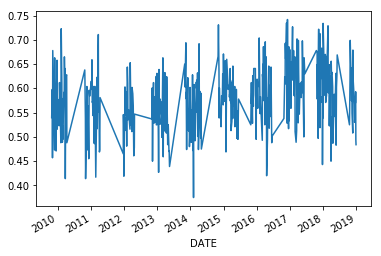

In [68]:
df_gsw['HOME_TS%'].plot()

In [69]:
df_gsw_g = df_gsw.groupby(['YEAR'])['HOME_TS%'].mean()

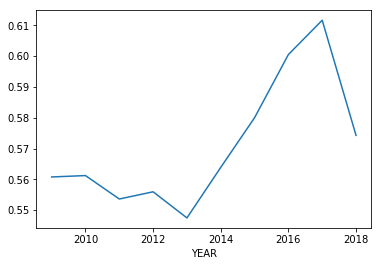

In [70]:
df_gsw_g.plot()

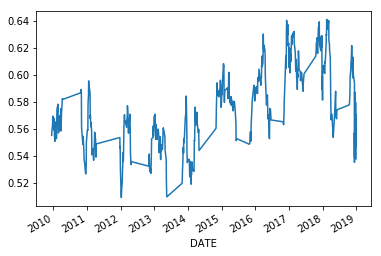

In [71]:
 df_gsw['HOME_TS%'].rolling(10).mean().dropna().plot()